In [1]:
# Import Packages and setup
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)
from astropy.table import Table as ApTable

import lsst.afw.table as afwTable
from lsst.utils import getPackageDir
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import proximal, display, sim, baseline
import lsst.meas.deblender.utils as debUtils
from lsst.daf.persistence import Butler

import comparison


logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)
plogger = logging.getLogger("proxmin")
plogger.setLevel(logging.INFO)
dlogger = logging.getLogger("deblender")
dlogger.setLevel(logging.INFO)

In [2]:
filters = ["G","R","I","Z","Y"]
newpath = "/home/fred3m/lsst/hsc/wide/new"
oldpath = "/home/fred3m/lsst/hsc/wide/old"
dataPath = "/datasets/hsc/repo/rerun/private/yusra/psfMatching/WIDE_77_29"
result = comparison.loadAllTables(filters, newpath, oldpath, dataPath, patch="1,1", tract=9813)
matchedOld, matchedNew, matchedNewConserved, calexp, newCats = result

INFO:lsst.meas.deblender:Loading new catalog
INFO:lsst.meas.deblender:Loading new flux conserved catalog
INFO:lsst.meas.deblender:Loading old catalog
INFO:lsst.meas.deblender:Building astropy tables
INFO:lsst.meas.deblender:matching results
INFO:lsst.meas.deblender:loading calexps


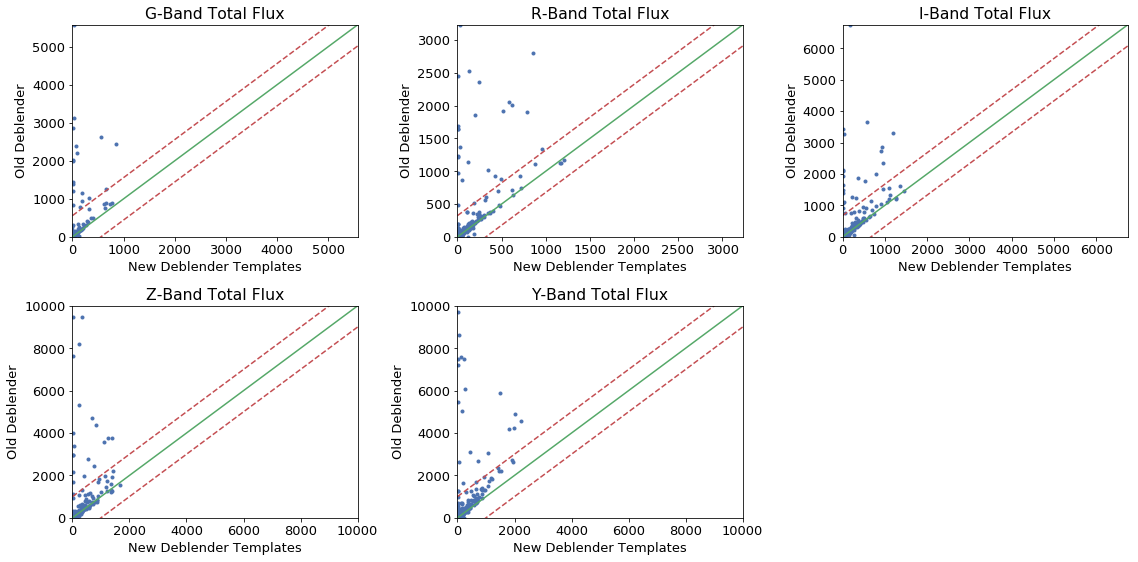

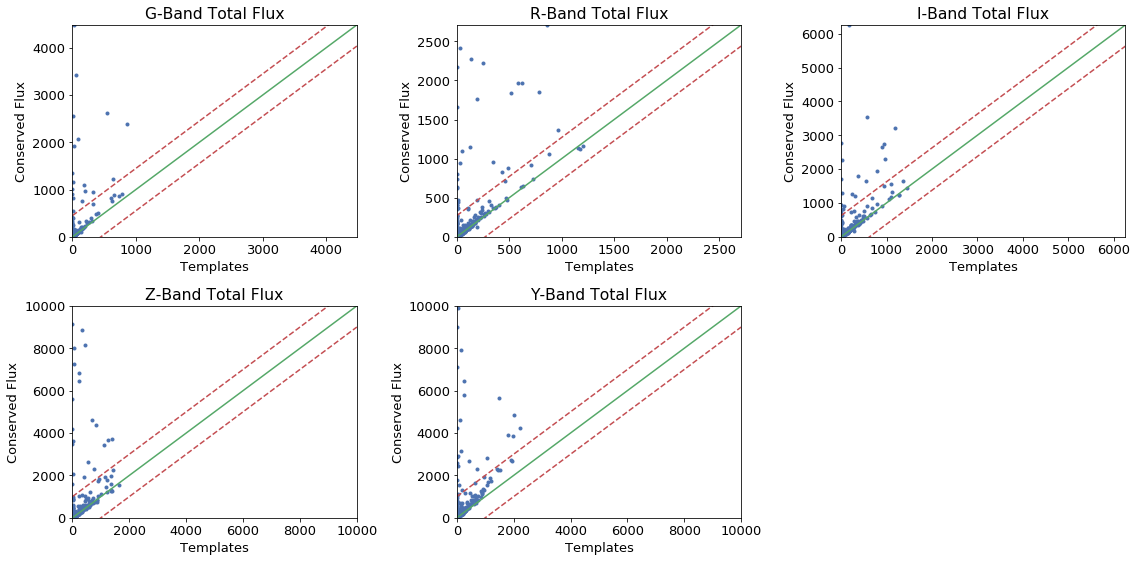

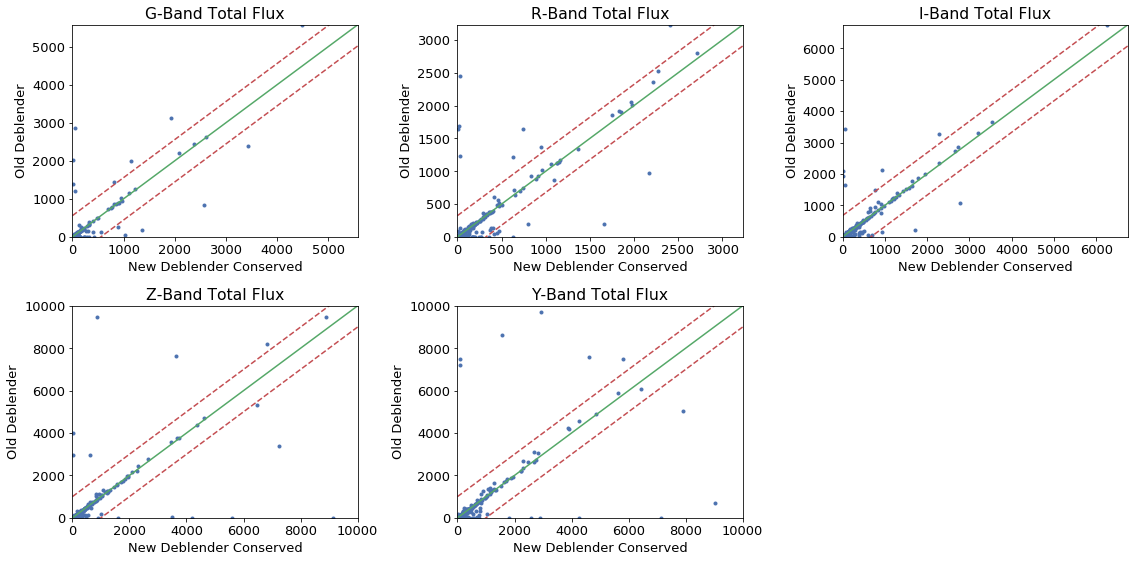

In [3]:
comparison.compareTotalFlux(matchedNew, matchedOld, "New Deblender Templates", "Old Deblender", filters)
comparison.compareTotalFlux(matchedNew, matchedNewConserved, "Templates", "Conserved Flux", filters)
comparison.compareTotalFlux(matchedNewConserved, matchedOld, "New Deblender Conserved", "Old Deblender", filters)

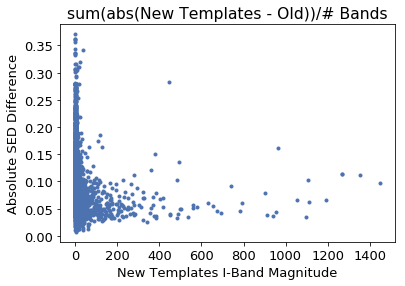

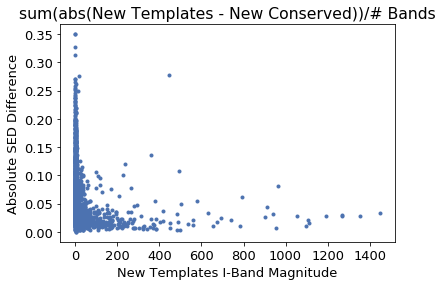

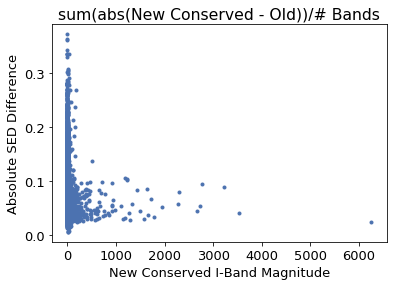

In [4]:
comparison.compareSeds(matchedNew, matchedOld, "I", "New Templates", "Old", filters)
comparison.compareSeds(matchedNew, matchedNewConserved, "I", "New Templates", "New Conserved", filters)
comparison.compareSeds(matchedNewConserved, matchedOld, "I", "New Conserved", "Old", filters)

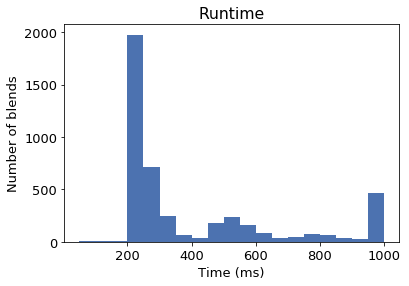

In [5]:
runtime = np.array(newCats["G"]["runtime"])
runtime[runtime>1000] = 1000
runtime = runtime[~(runtime==0)]
plt.hist(runtime, bins=np.arange(20)*50+50)
plt.title("Runtime")
plt.xlabel("Time (ms)")
plt.ylabel("Number of blends")
plt.show()

In [6]:
parents = np.unique(matchedNew["parent"])
outliers = np.zeros((len(matchedNew)), dtype=bool)
for f in filters:
    diff = np.abs(matchedNew[f+"_flux"]-matchedOld[f+"_flux"])
    maxF = np.max([matchedNew[f+"_flux"], matchedOld[f+"_flux"]])
    outliers = outliers | ((diff>.05*maxF) & (matchedNew[f+"_flux"]>100))
outlierParents = np.unique(matchedNew["parent"][outliers])
print("There are {0} blends with a flux different of >5% in at least one band".format(len(outlierParents)))

There are 24 blends with a flux different of >5% in at least one band


INFO:lsst.meas.deblender:Outliers


vmin: -0.07510744035243988, vmax: 0.36256805736088105


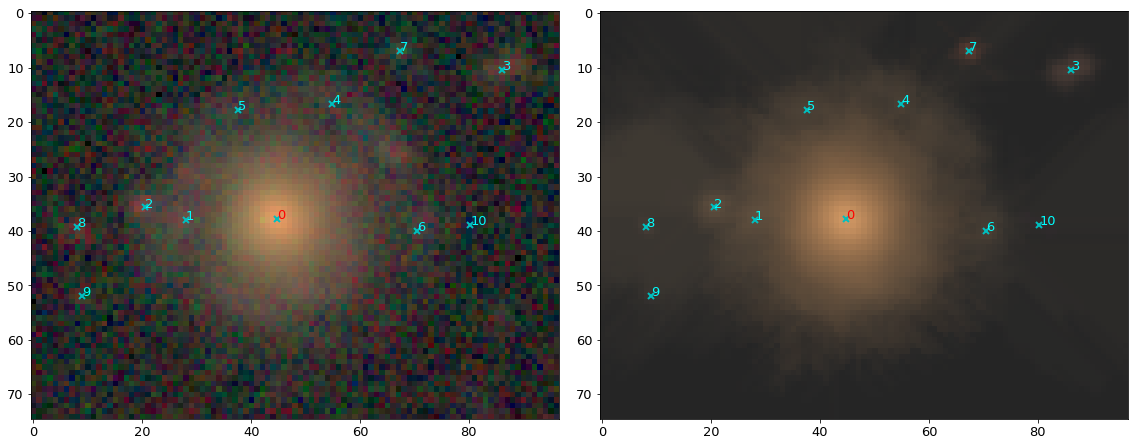

vmin: -0.07842149585485458, vmax: 0.36521800027986484


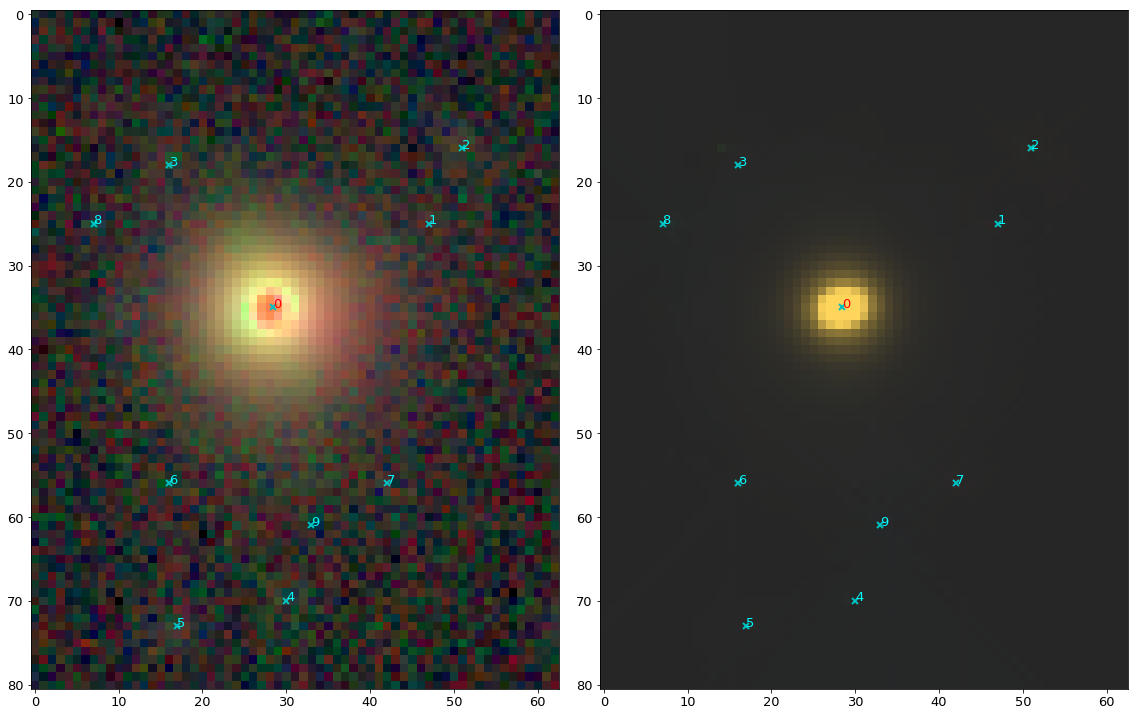

vmin: -0.2198837548494339, vmax: 0.6545100328877738


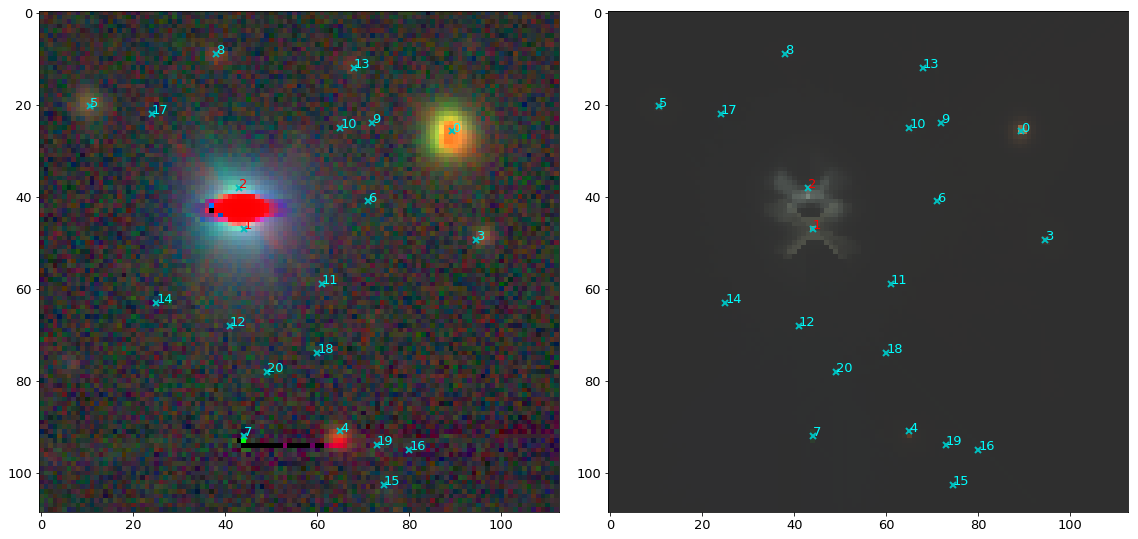

vmin: -0.2505062520503998, vmax: 0.6573431779434038


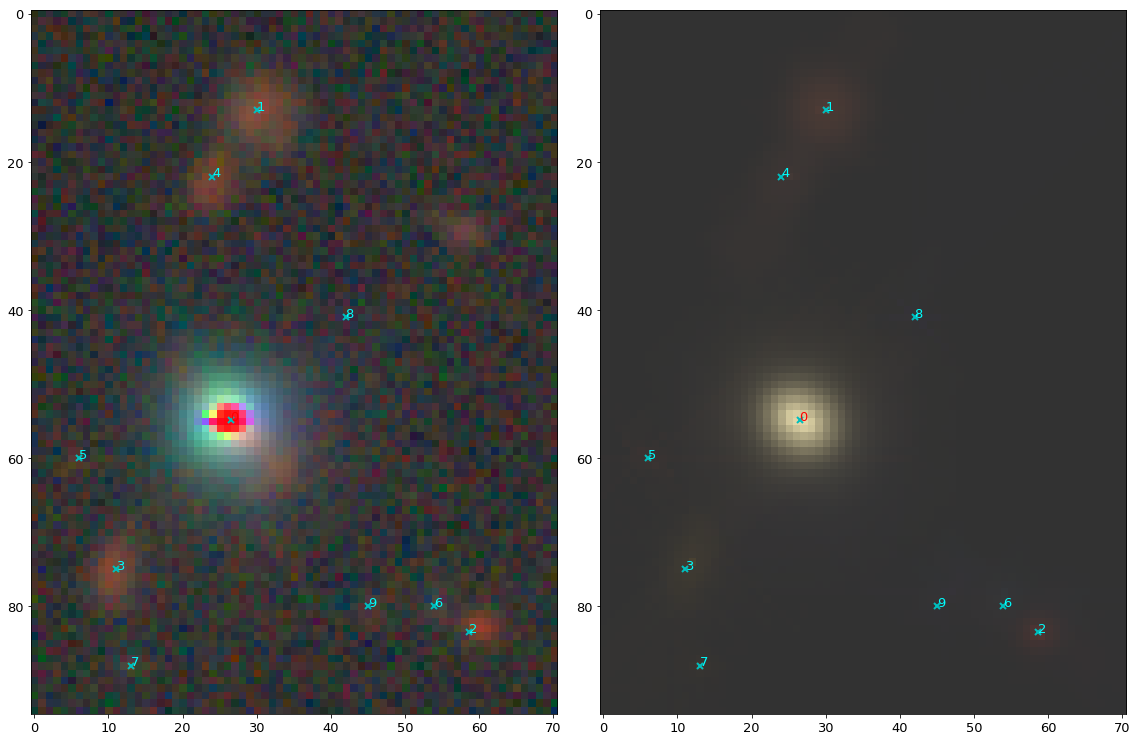

vmin: -0.11386348307132721, vmax: 0.3686599756163717


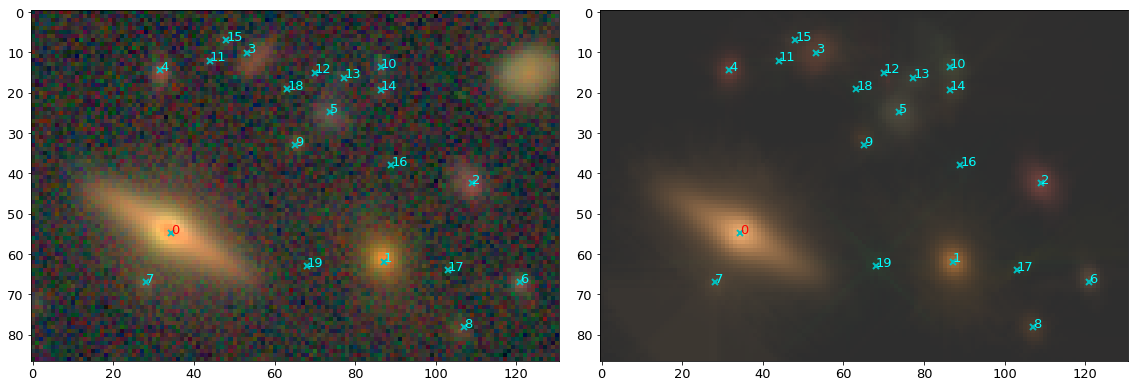

vmin: -0.11741013824939728, vmax: 0.24132593477282532


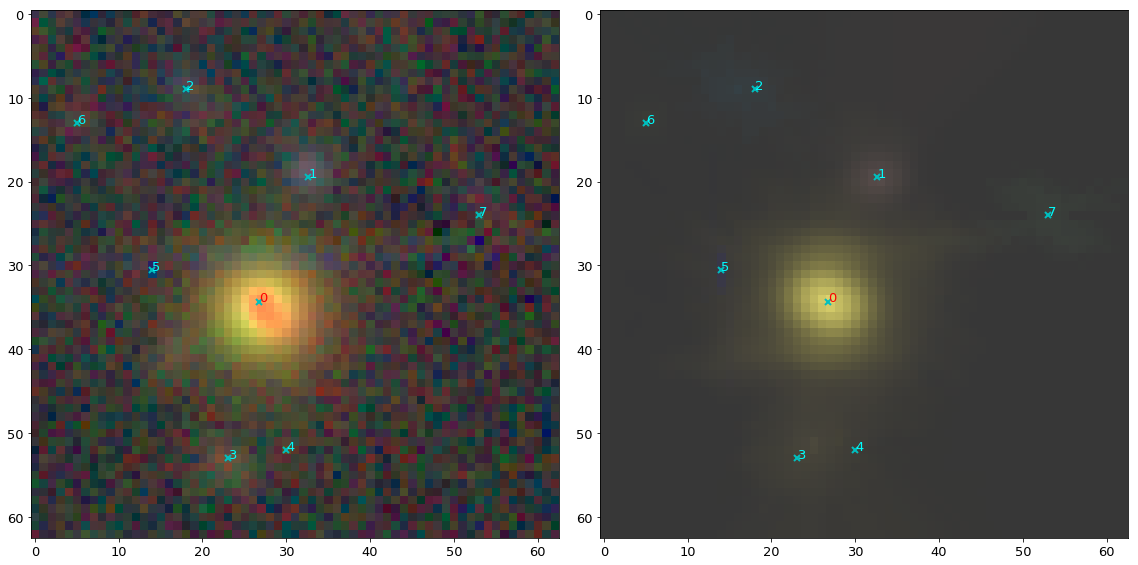

vmin: -0.15733197331428528, vmax: 0.7500256751226142


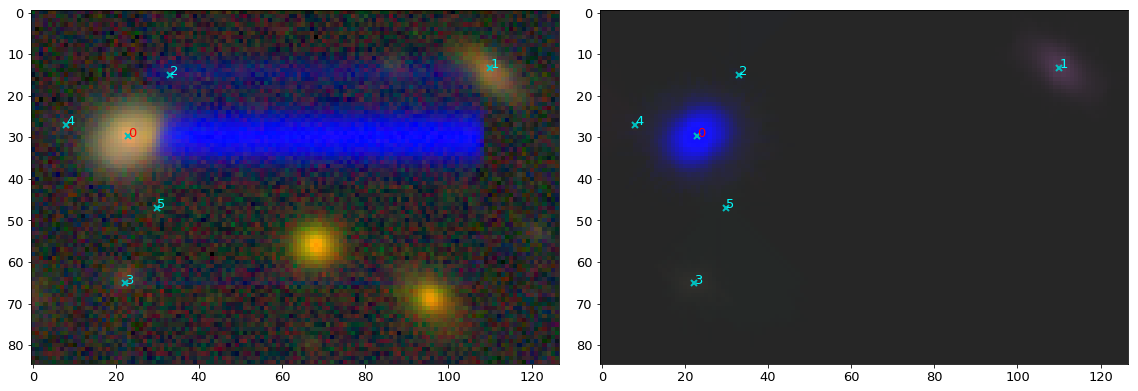

vmin: -0.24570885300636292, vmax: 0.5304853147804374


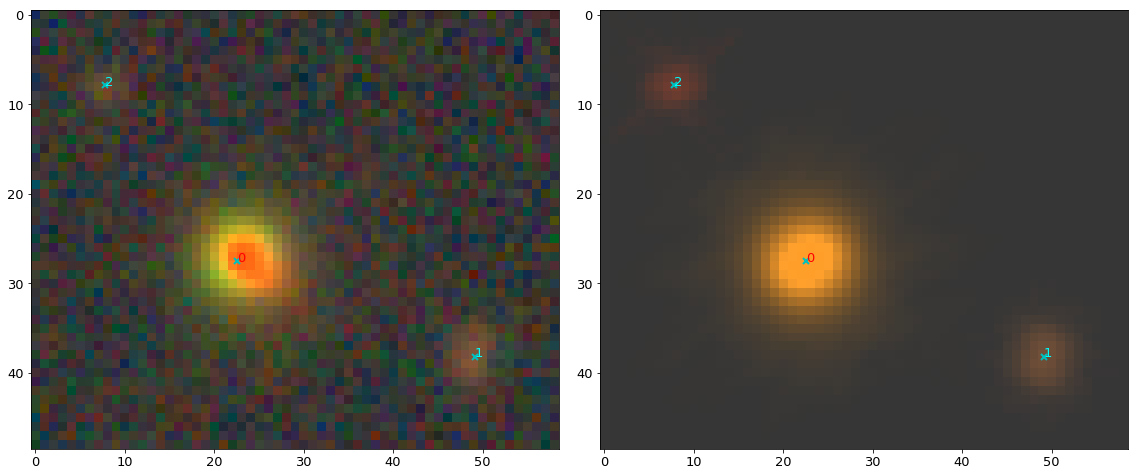

vmin: -0.07588101923465729, vmax: 0.3007363842371692


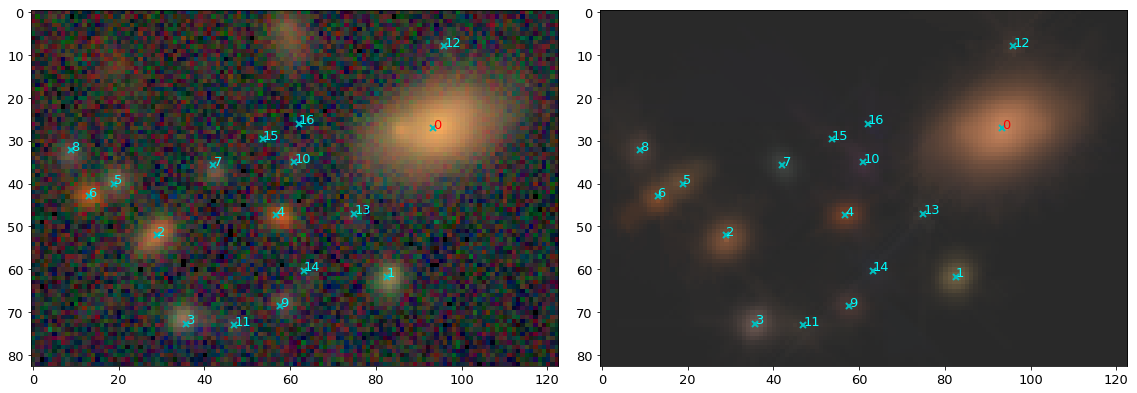

vmin: -0.11315115541219711, vmax: 0.22499169805365765


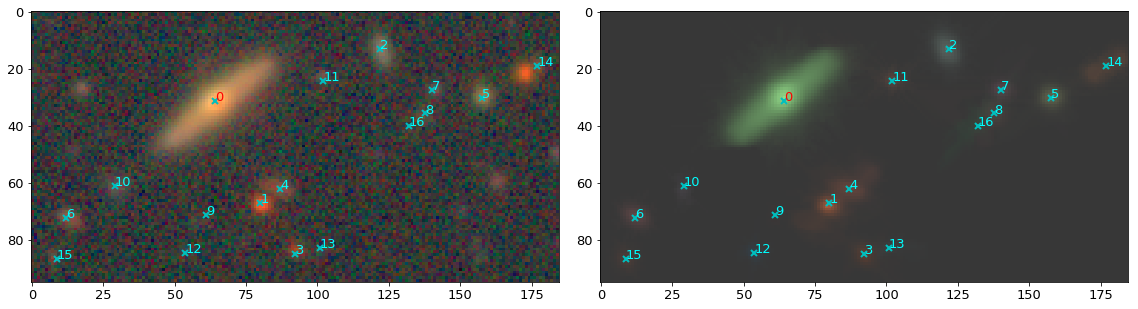

vmin: -0.23241420090198517, vmax: 0.6098954118902777


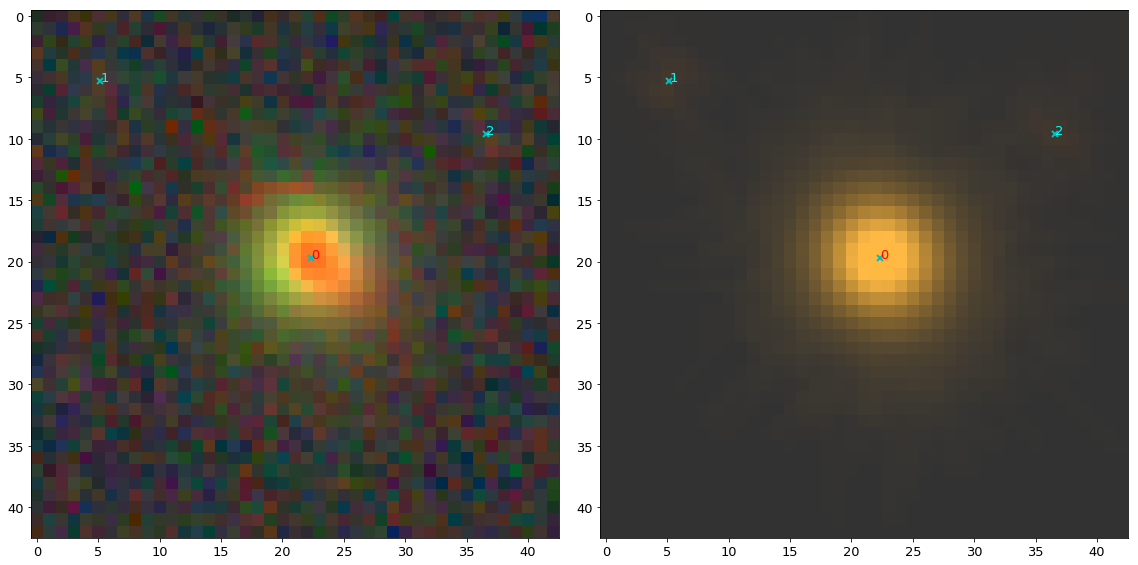

vmin: -0.06599514931440353, vmax: 0.20680851204787046


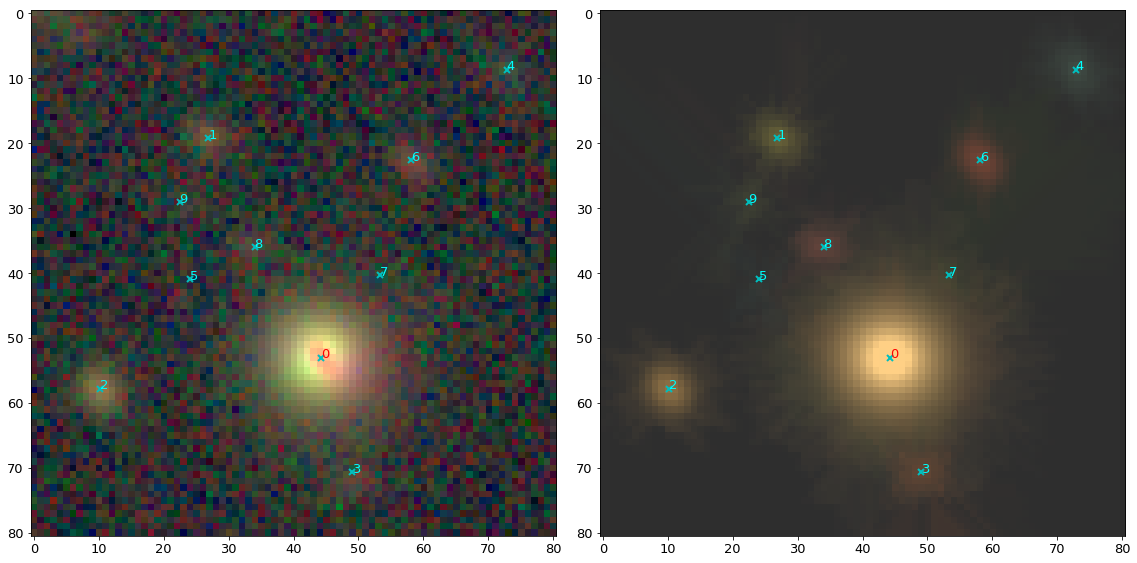

vmin: -0.25824105739593506, vmax: 0.5485131209647144


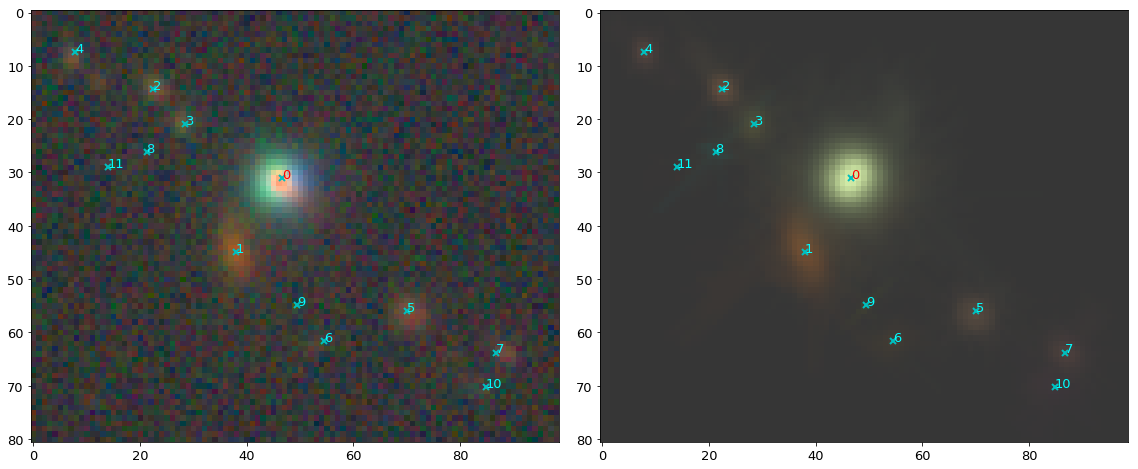

vmin: -0.2646361712027134, vmax: 0.3018270805390657


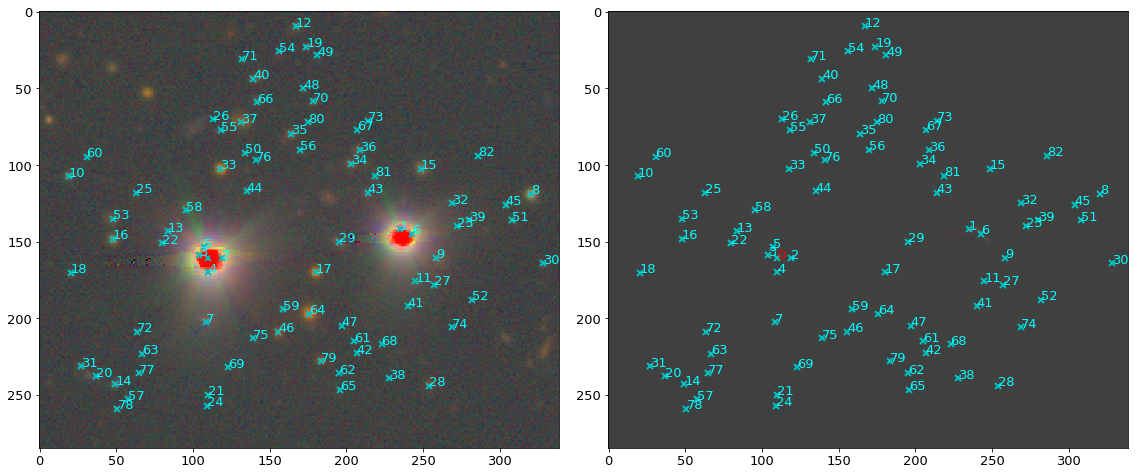

vmin: -0.2534724175930023, vmax: 0.6471793503835779


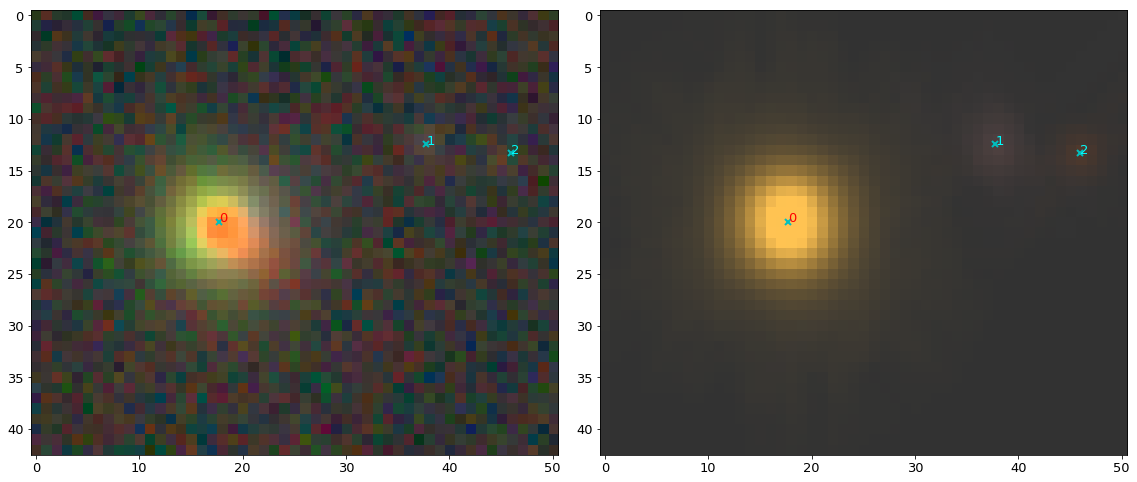

vmin: -0.08767219632863998, vmax: 0.2469960838911865


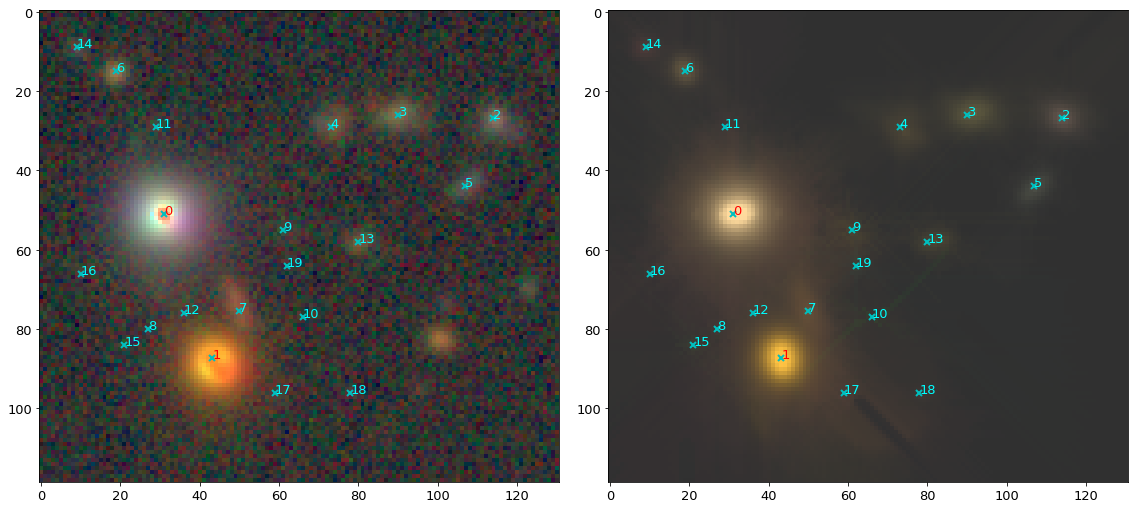

vmin: -0.2310827076435089, vmax: 0.5427290923524337


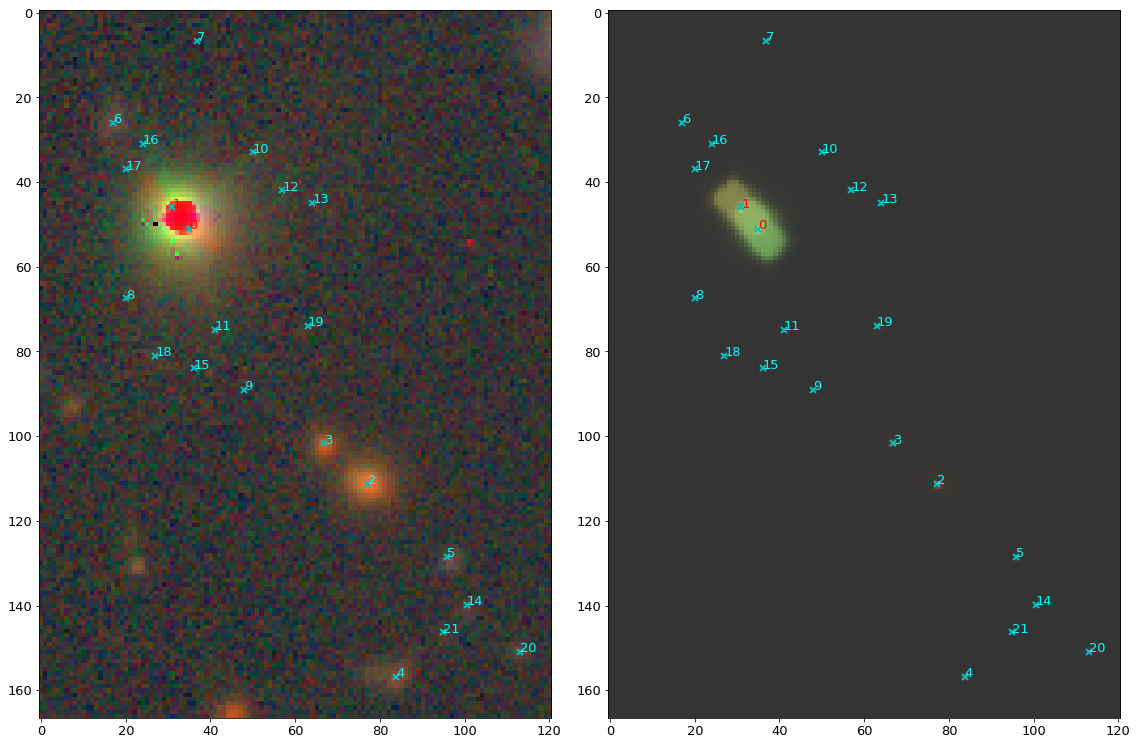

vmin: -0.07266781479120255, vmax: 0.221118104479278


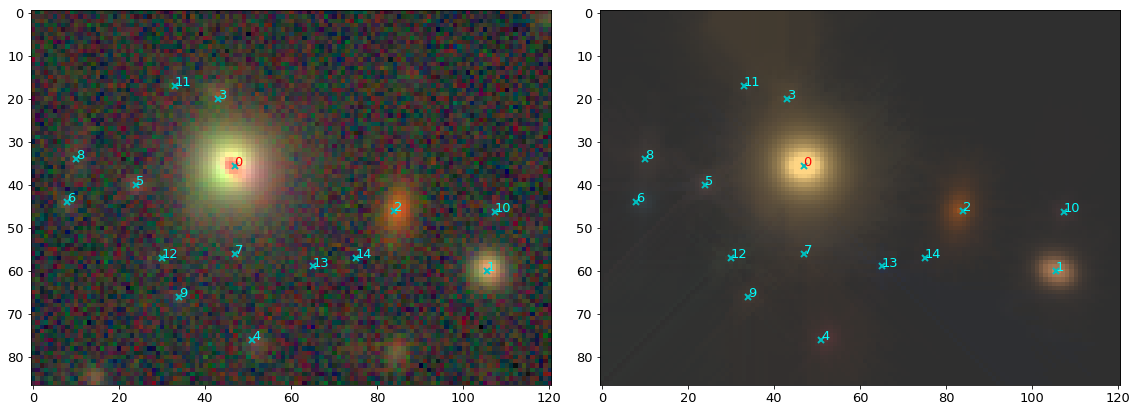

vmin: -0.05541520193219185, vmax: 0.18658341154929187


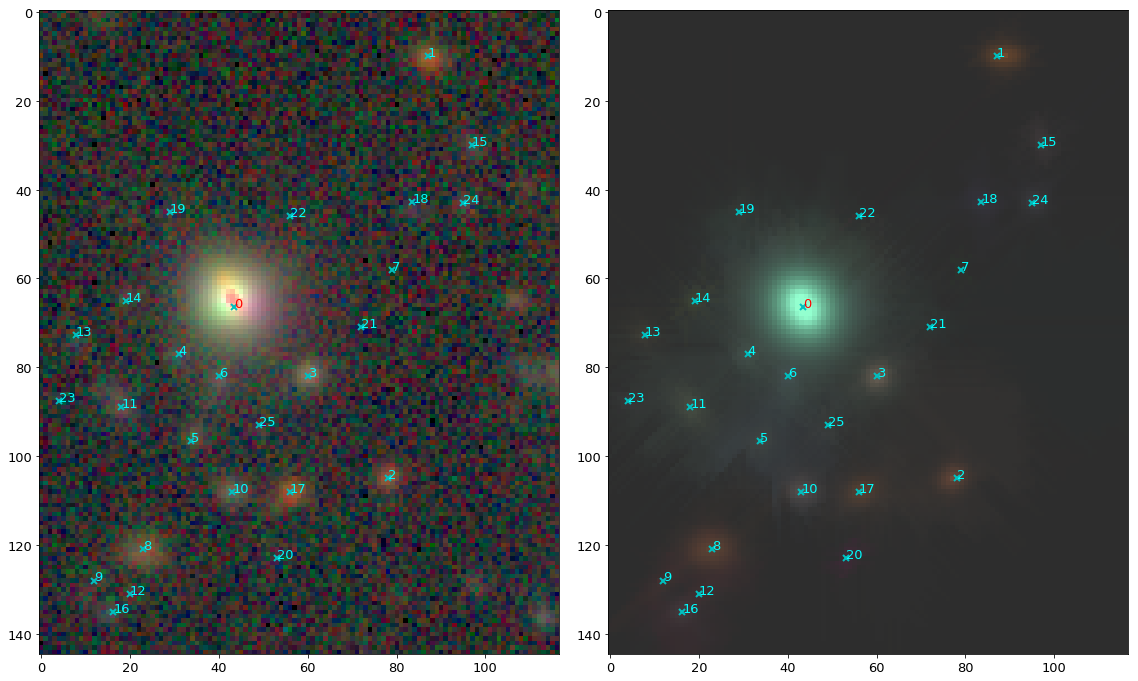

vmin: -0.05996234714984894, vmax: 0.21502116664817605


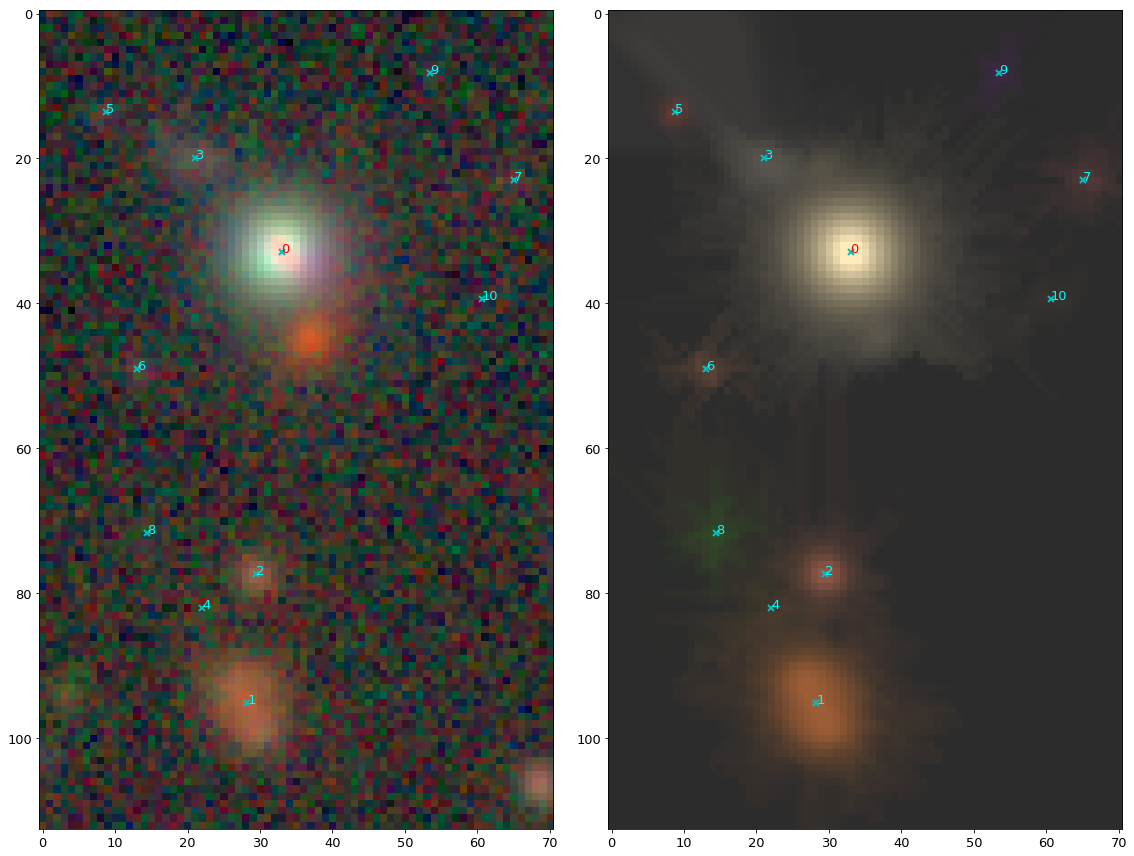

vmin: -0.14900749921798706, vmax: 0.42676136122702096


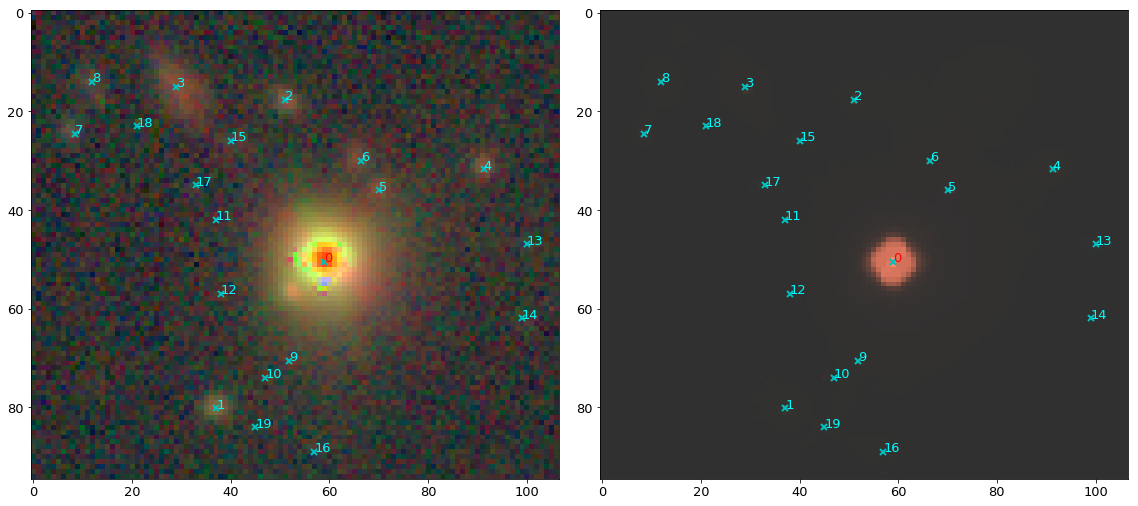

vmin: -0.07998485863208771, vmax: 0.2276437320041518


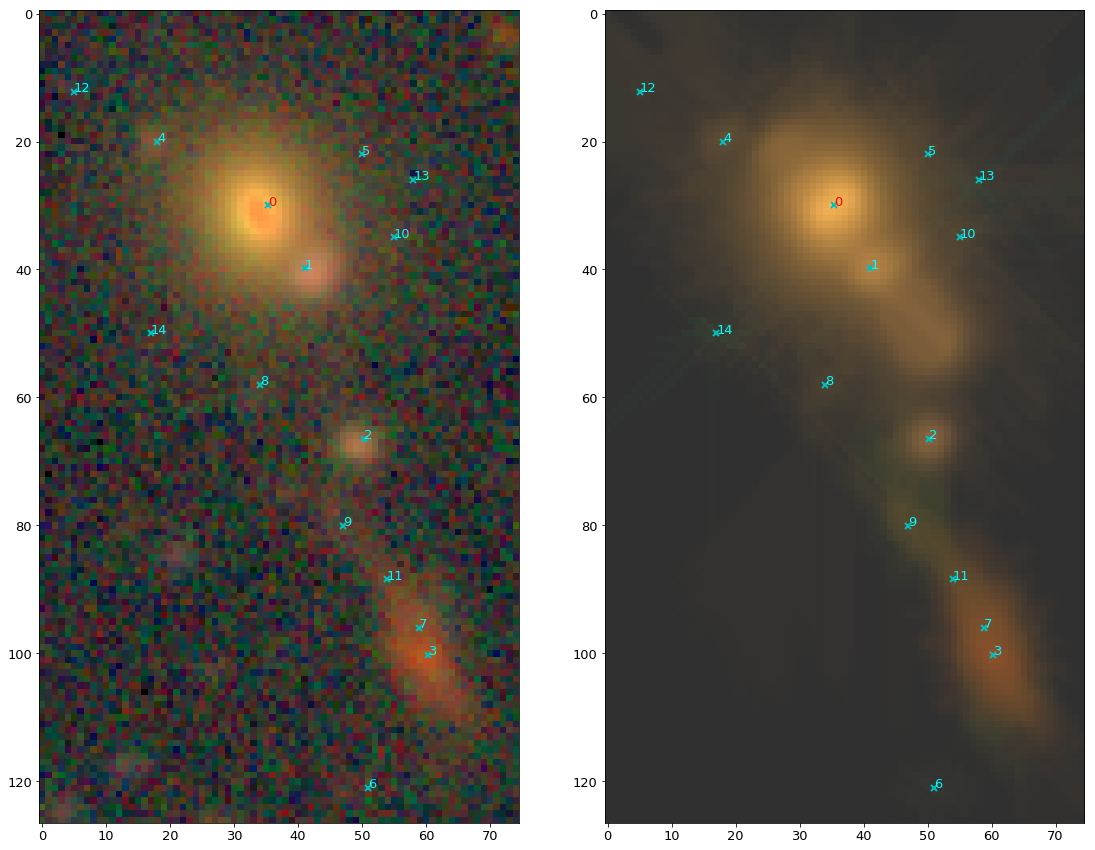

vmin: -0.10486659407615662, vmax: 0.28299717533432595


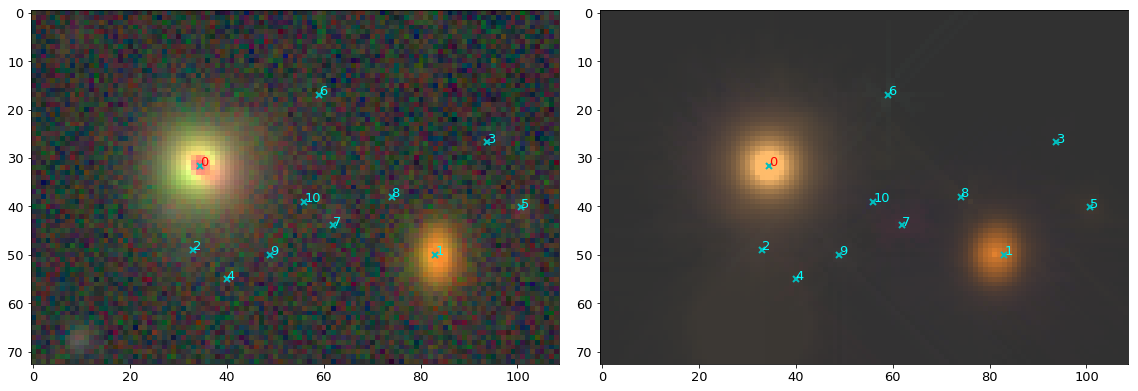

vmin: -0.06060535088181496, vmax: 0.24539853107468856


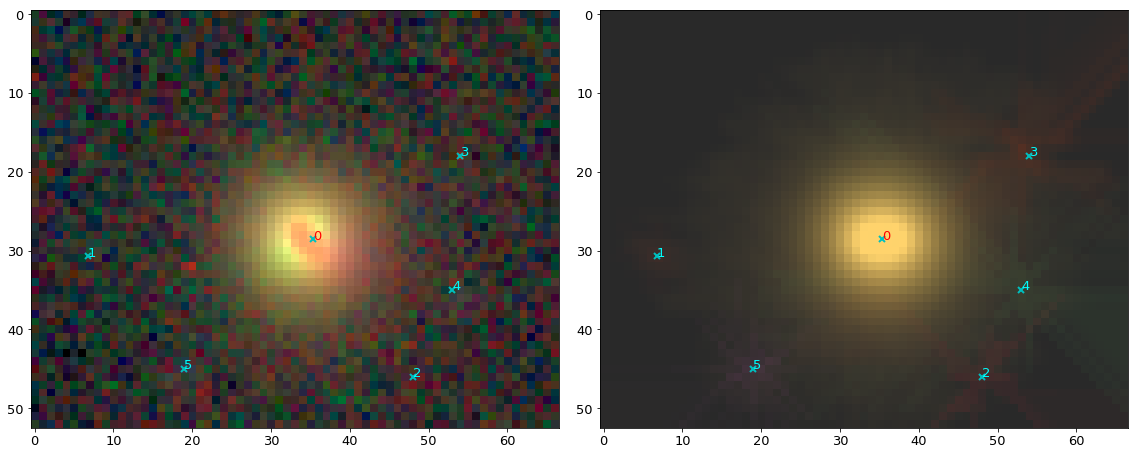

In [20]:
logger.info("Outliers")
for parent in outlierParents:
    comparison.showComparison(calexp, newCats, matchedNew, parent, filters, outliers)

In [26]:
import imp
imp.reload(comparison)

<module 'comparison' from '/home/fred3m/lsst/code/deblender_examples/comparison.py'>

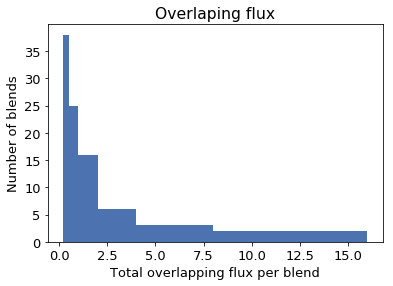

In [32]:
overlap = comparison.getOverlap(parents, newCats, matchedNew)
plt.hist(overlap, bins=[.2,.5,1,2,4,8,16])
plt.title("Overlaping flux")
plt.xlabel("Total overlapping flux per blend")
plt.ylabel("Number of blends")
plt.show()

43158172147388153
vmin: -0.07757618278265, vmax: 0.2632334559624838


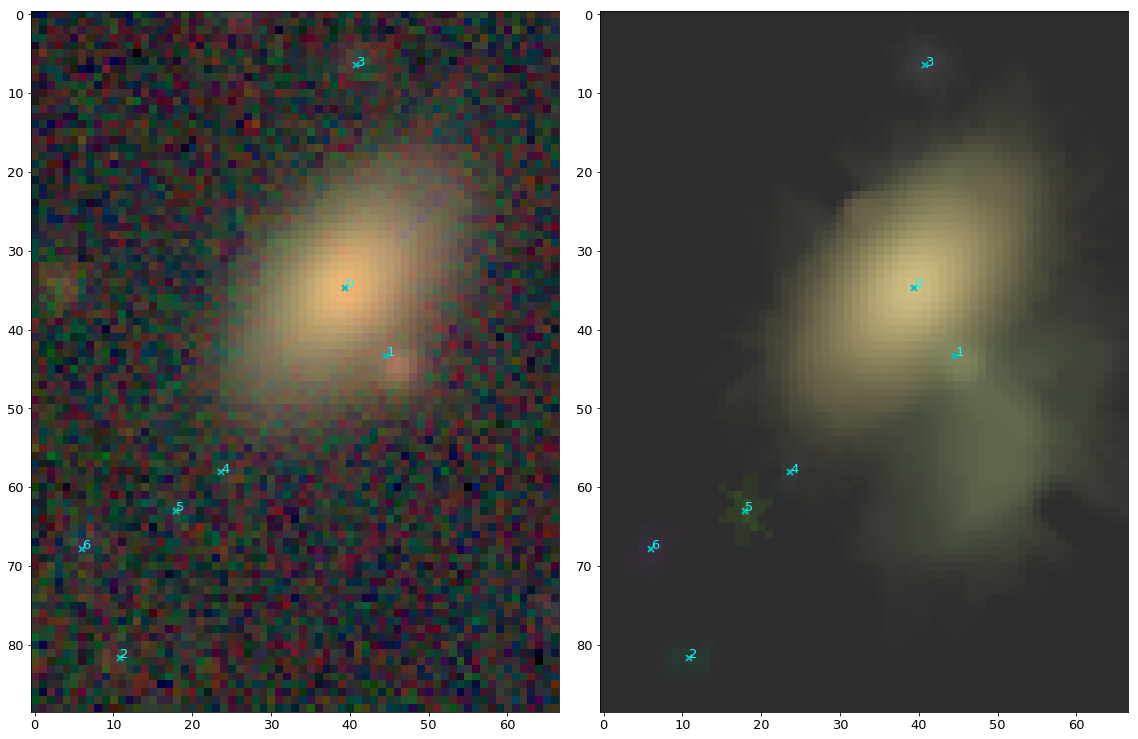

43158172147389779
vmin: -0.2310827076435089, vmax: 0.5427290923524337


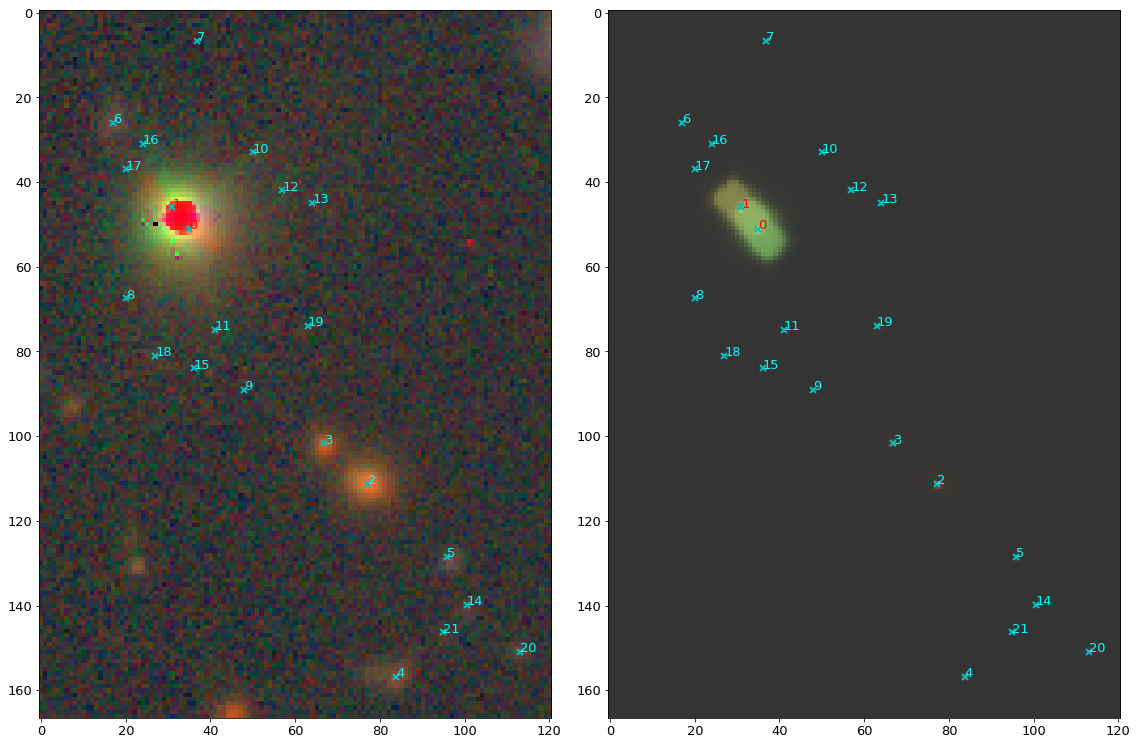

43158172147384979
vmin: -0.13189208507537842, vmax: 0.35754856273300095


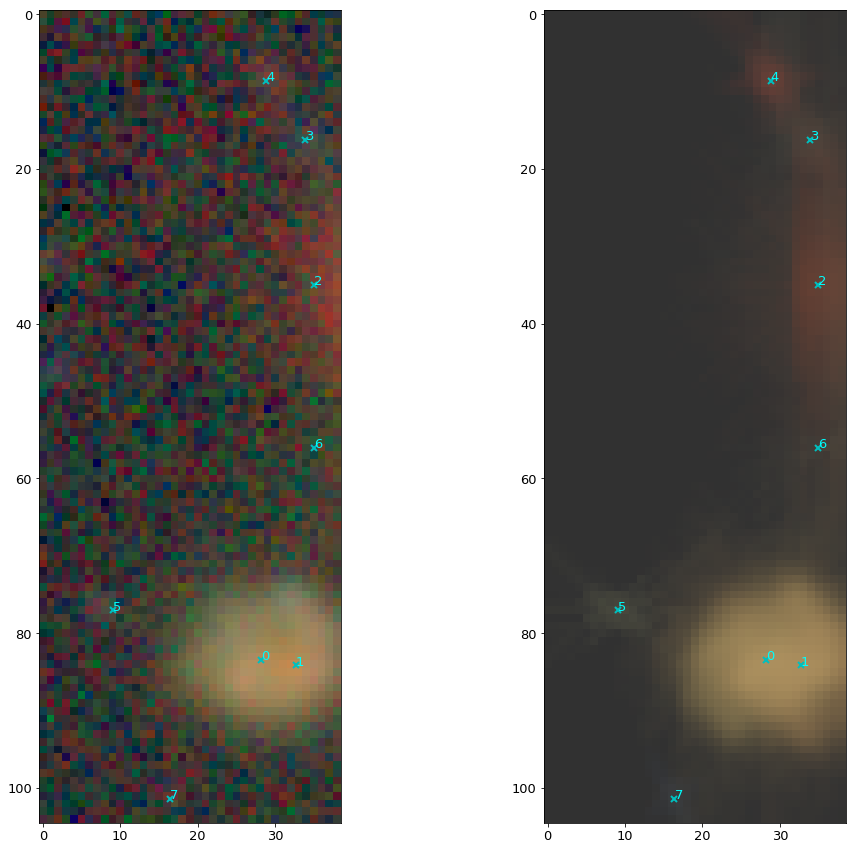

43158172147384691
vmin: -0.26359429955482483, vmax: 0.614867358305838


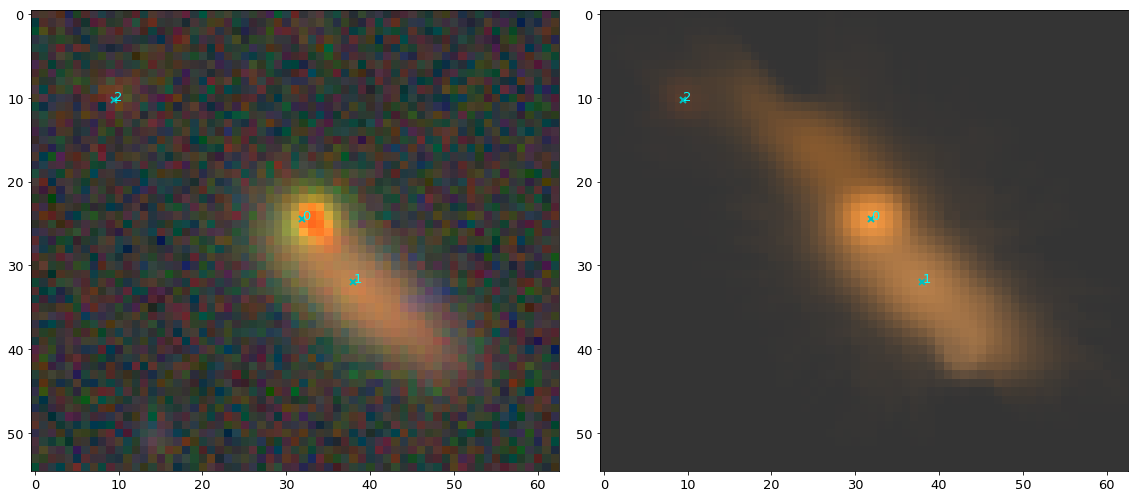

43158172147385636
vmin: -0.13377748429775238, vmax: 0.4774752697027878


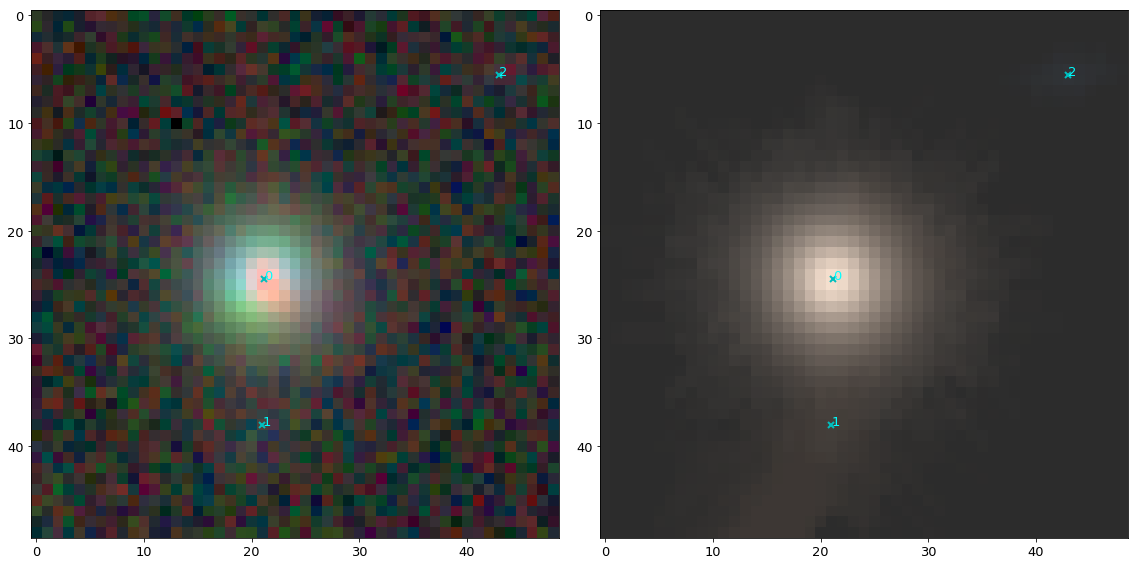

43158172147390622
vmin: -0.07998485863208771, vmax: 0.2276437320041518


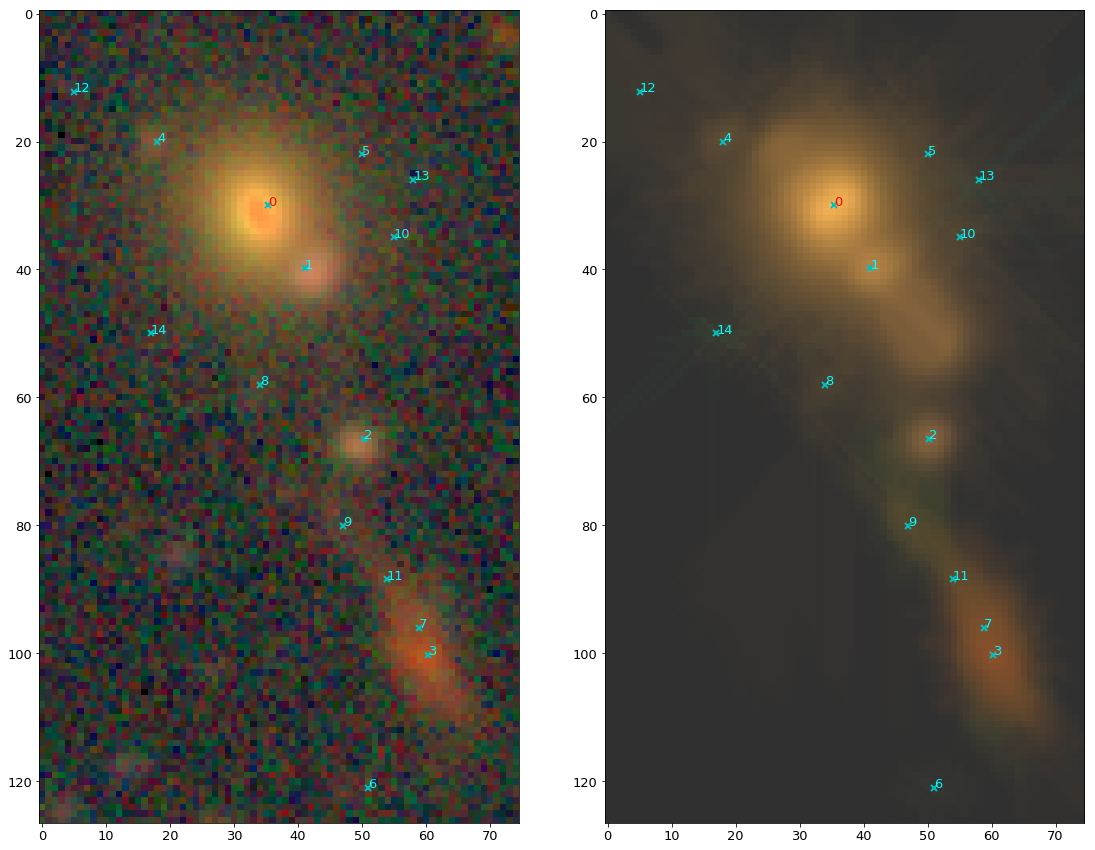

43158172147386426
vmin: -0.07510744035243988, vmax: 0.36256805736088105


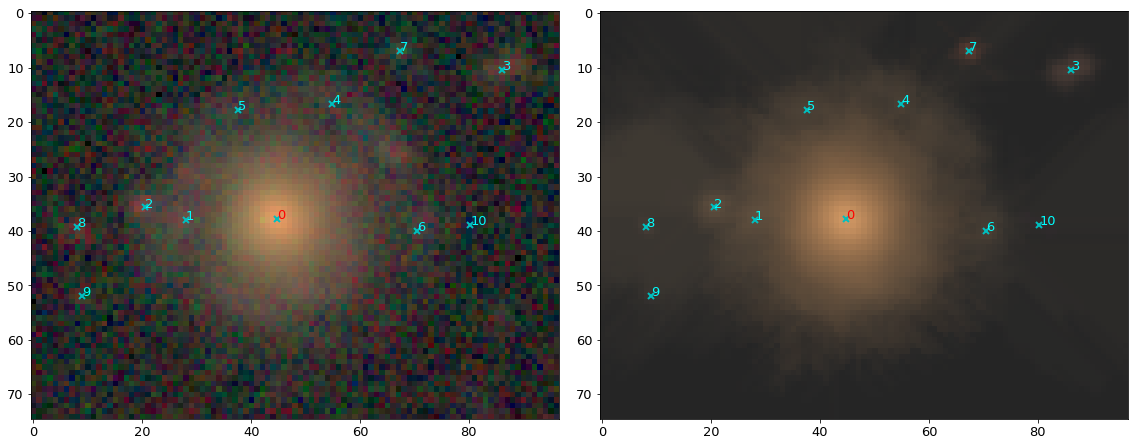

43158172147391068
vmin: -0.2062457799911499, vmax: 0.5326960891566764


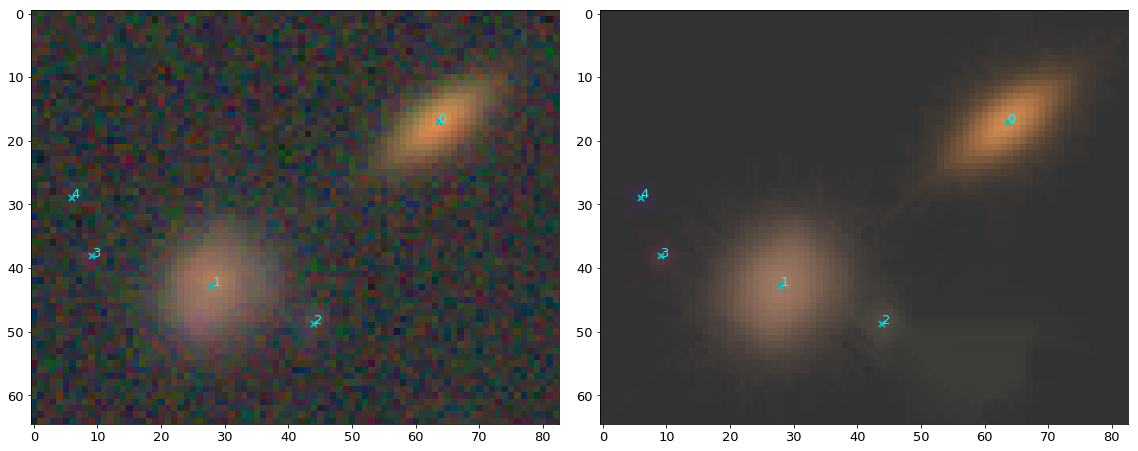

43158172147388744
vmin: -0.0991499274969101, vmax: 0.3899245242130509


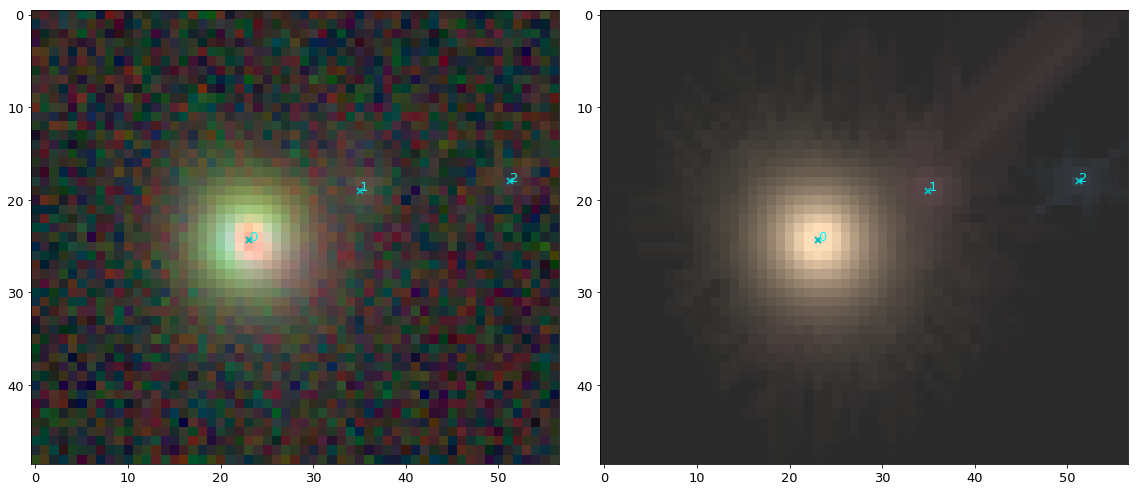

43158172147389432
vmin: -0.07106389105319977, vmax: 0.22563639649271003


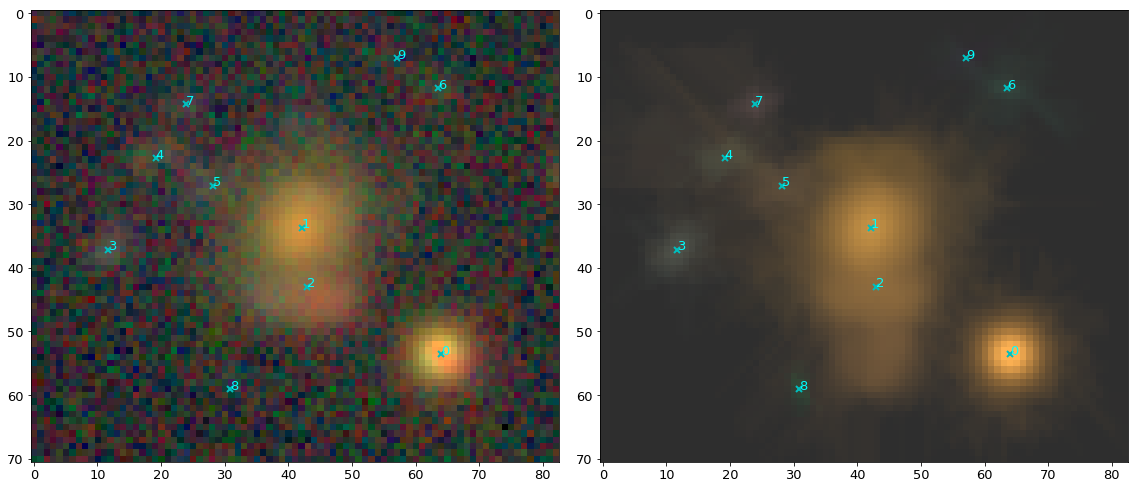

43158172147388899
vmin: -0.09679102152585983, vmax: 0.26083819043900947


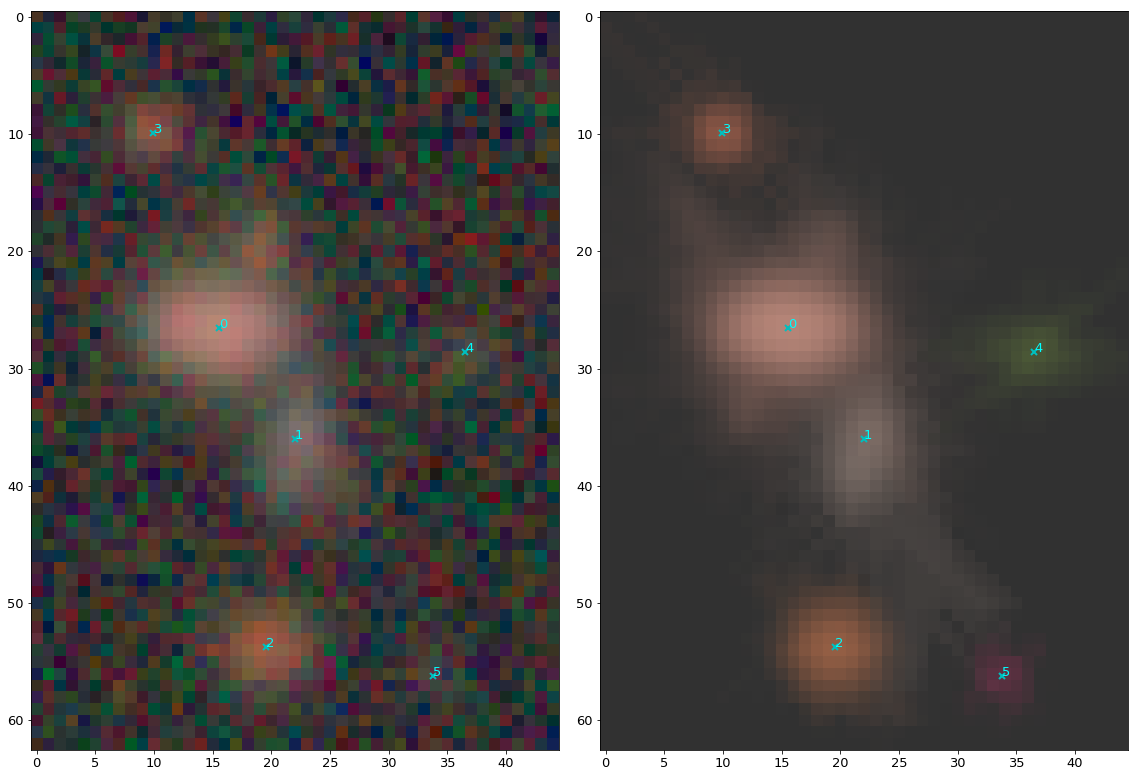

43158172147390427
vmin: -0.09335166215896606, vmax: 0.41062775782046534


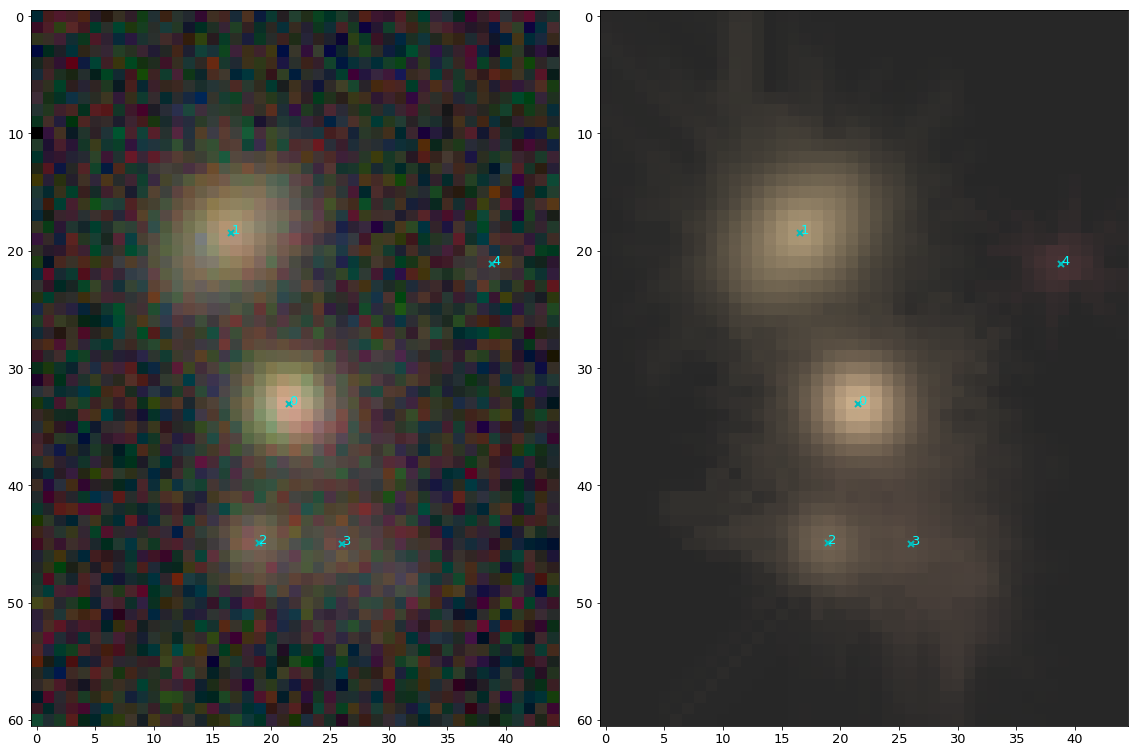

43158172147389506
vmin: -0.08767219632863998, vmax: 0.2469960838911865


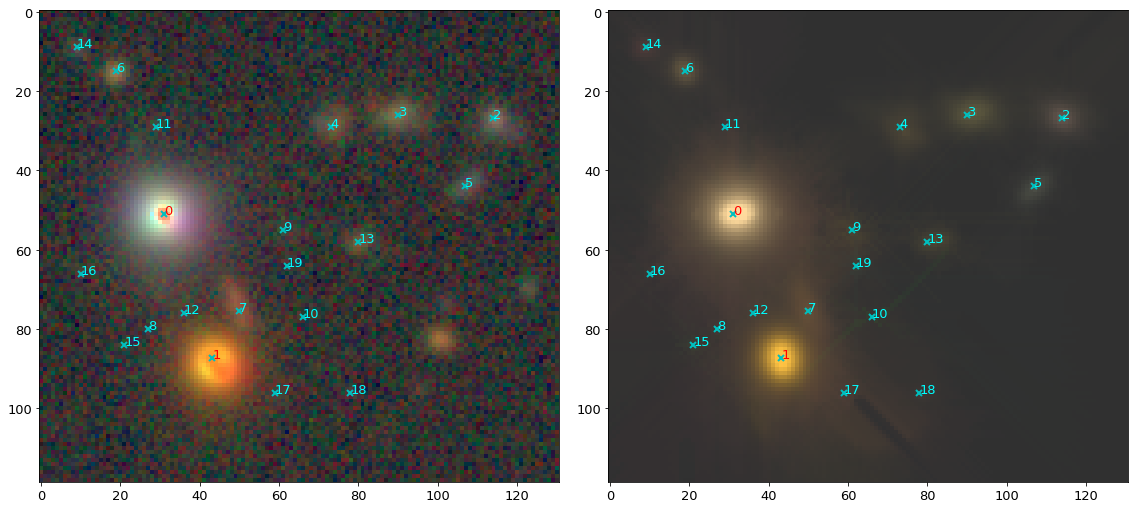

43158172147385547
vmin: -0.08077917248010635, vmax: 0.2794311799110151


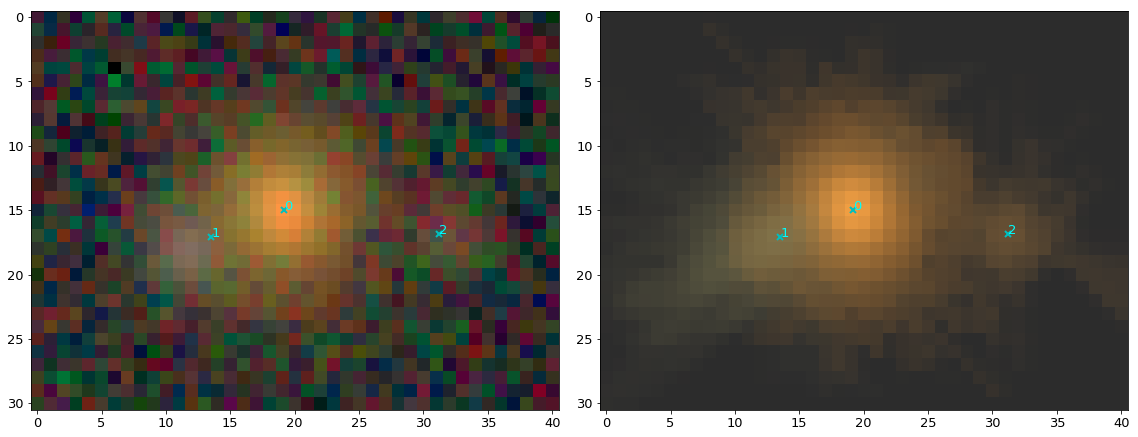

43158172147388978
vmin: -0.293691486120224, vmax: 0.5218716793237259


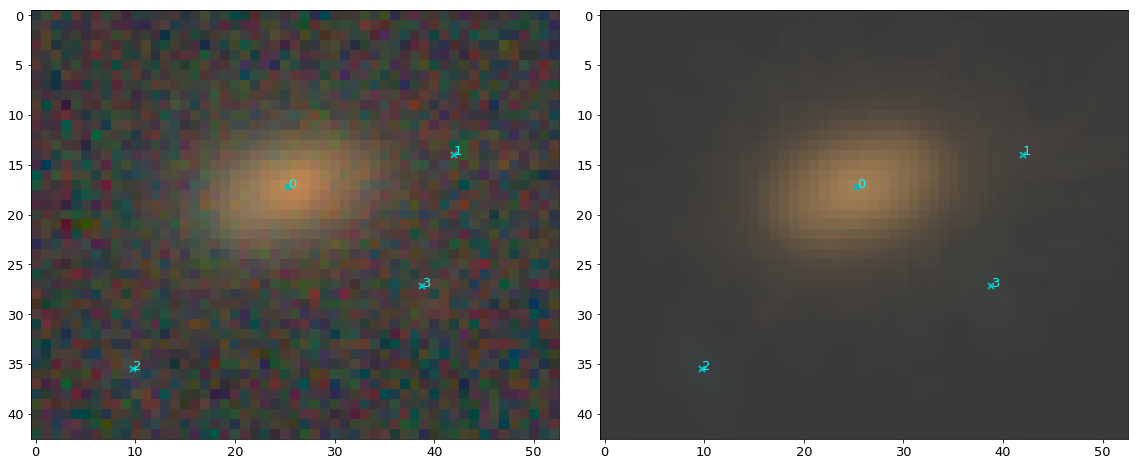

43158172147386476
vmin: -0.10117844492197037, vmax: 0.2498496410877672


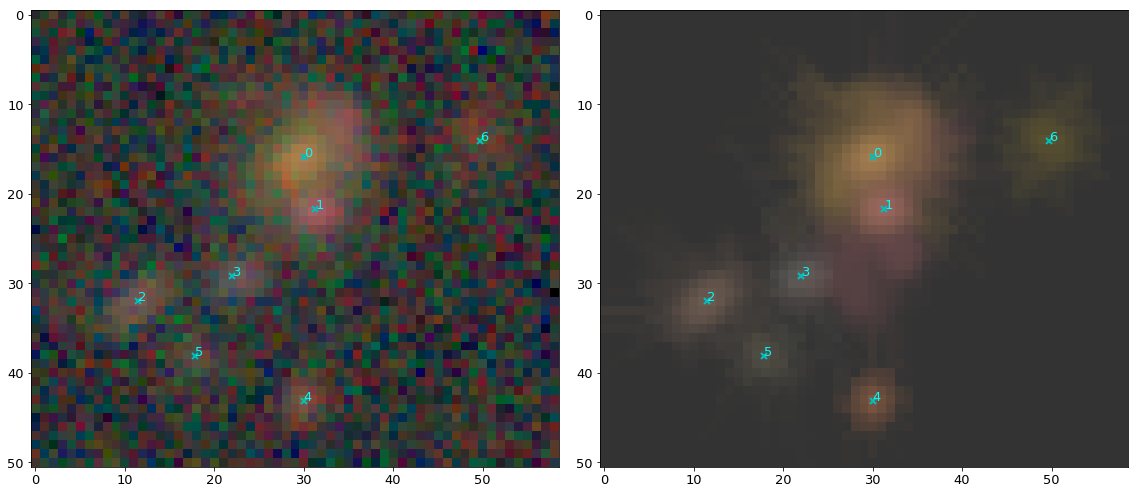

43158172147385004
vmin: -0.1343185305595398, vmax: 0.4028825496610378


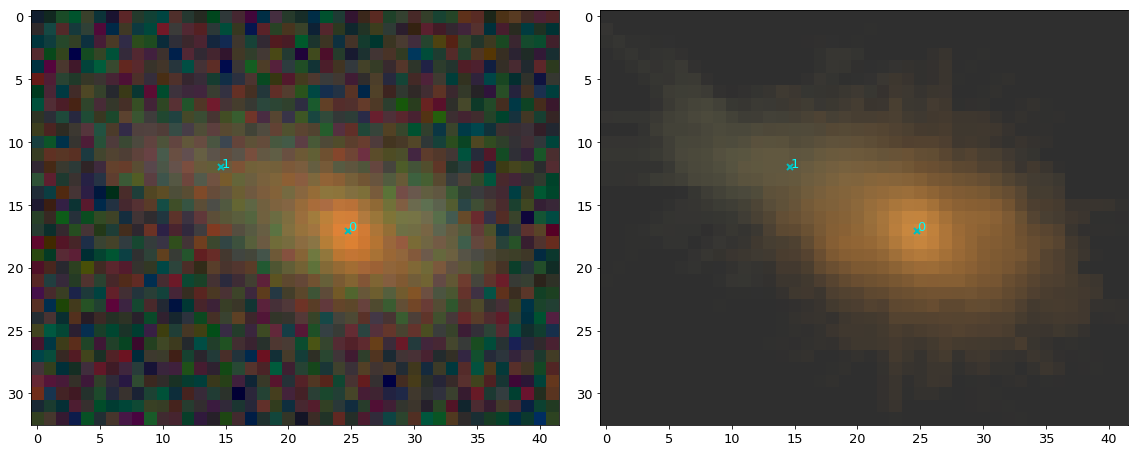

43158172147386608
vmin: -0.07638845592737198, vmax: 0.20733709563908856


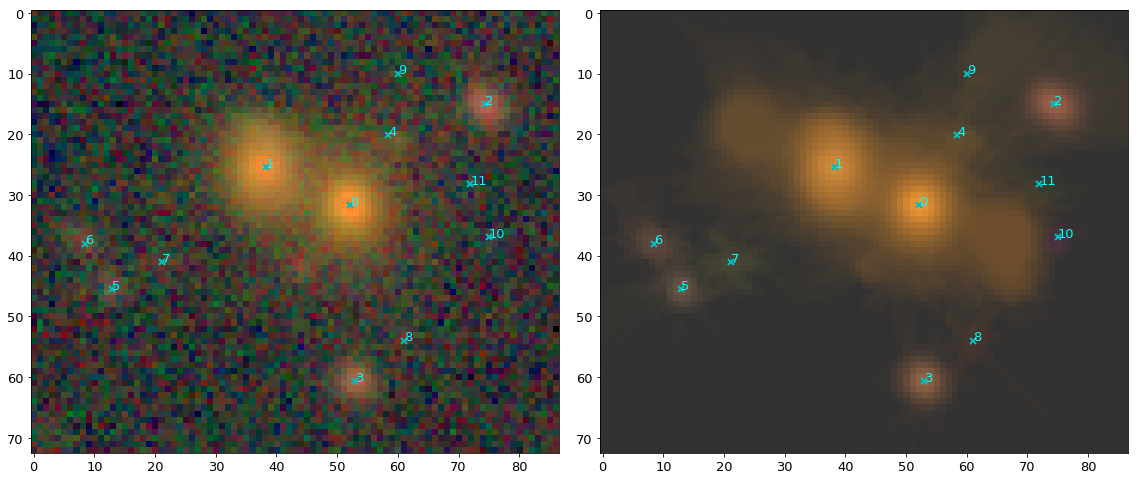

43158172147385959
vmin: -0.2555818259716034, vmax: 0.5857960283666714


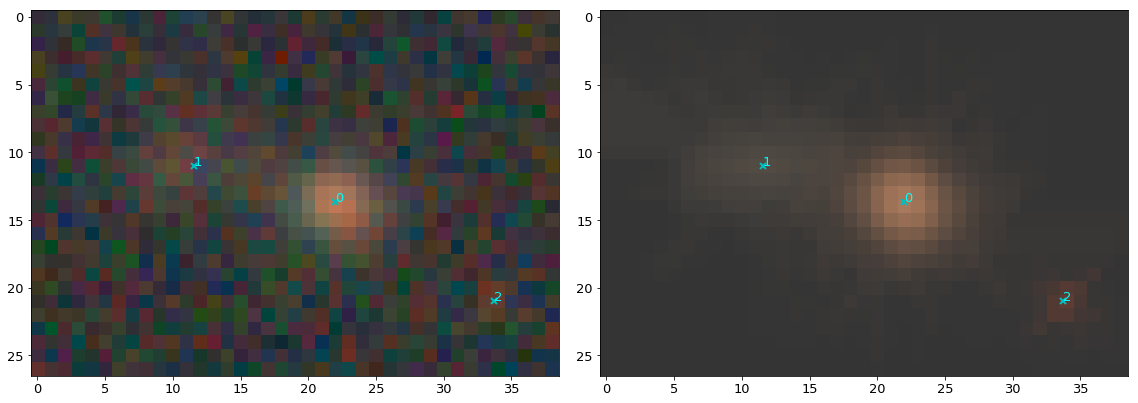

43158172147387672
vmin: -0.08661101758480072, vmax: 0.38652822788663577


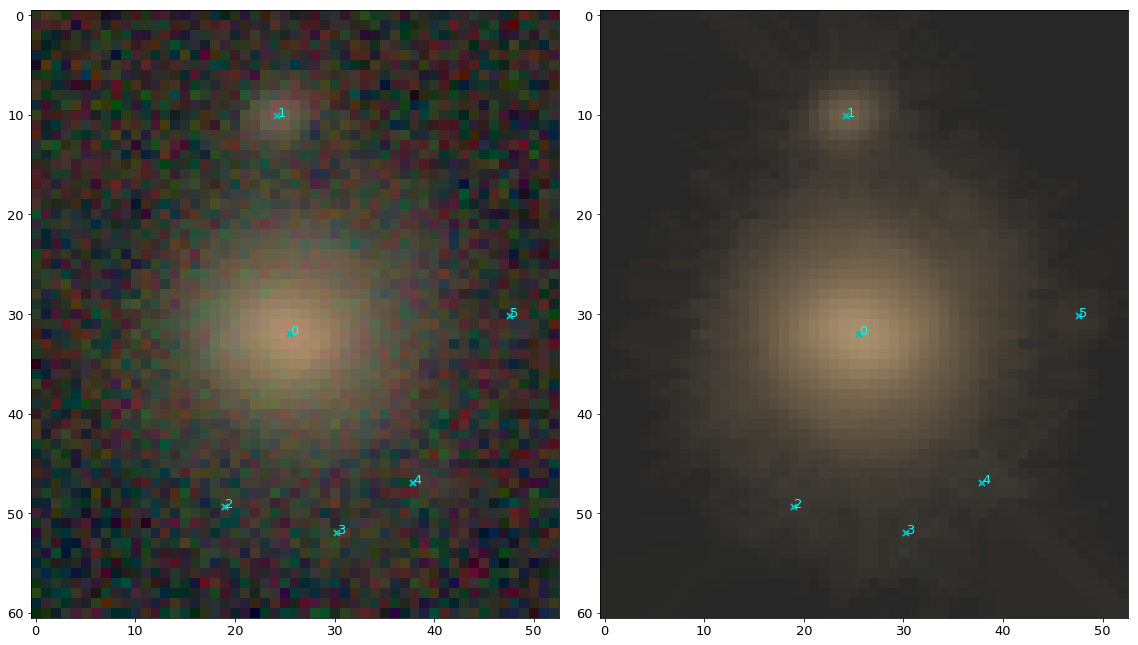

43158172147389011
vmin: -0.13381214439868927, vmax: 0.24703772980768549


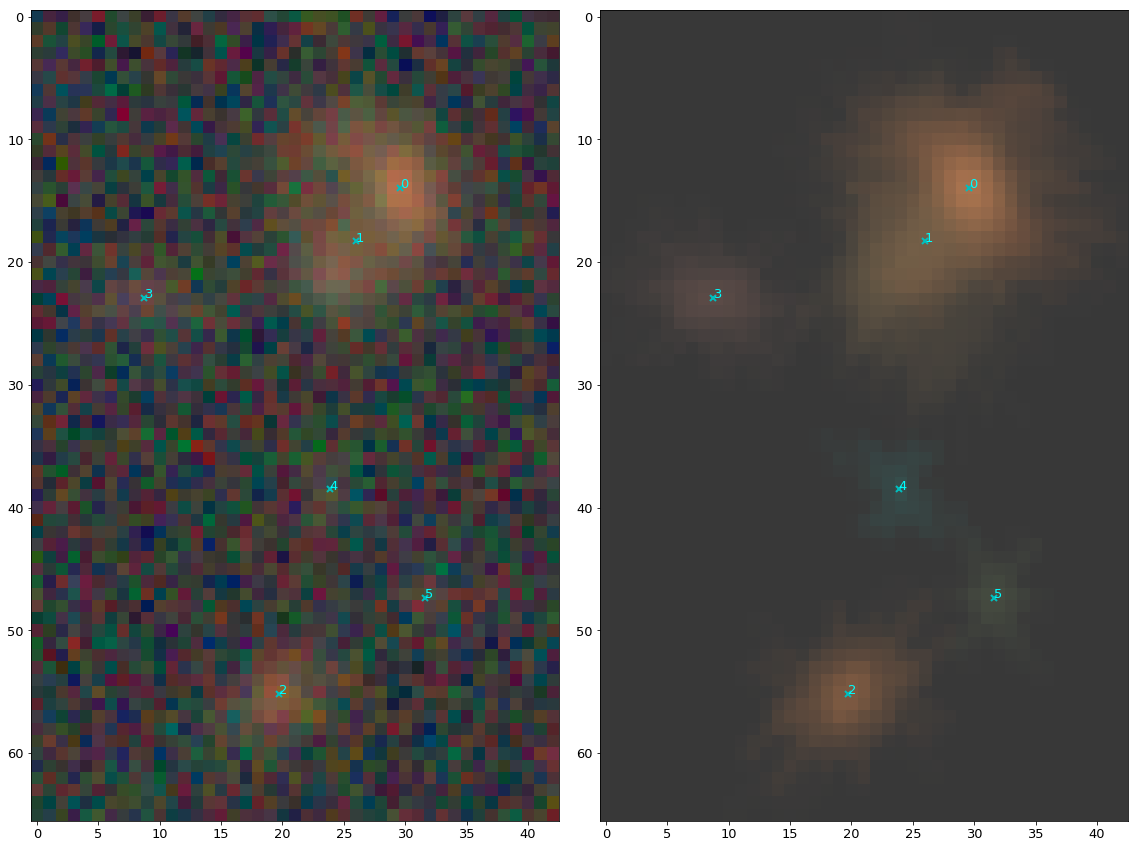

43158172147386926
vmin: -0.2198837548494339, vmax: 0.6545100328877738


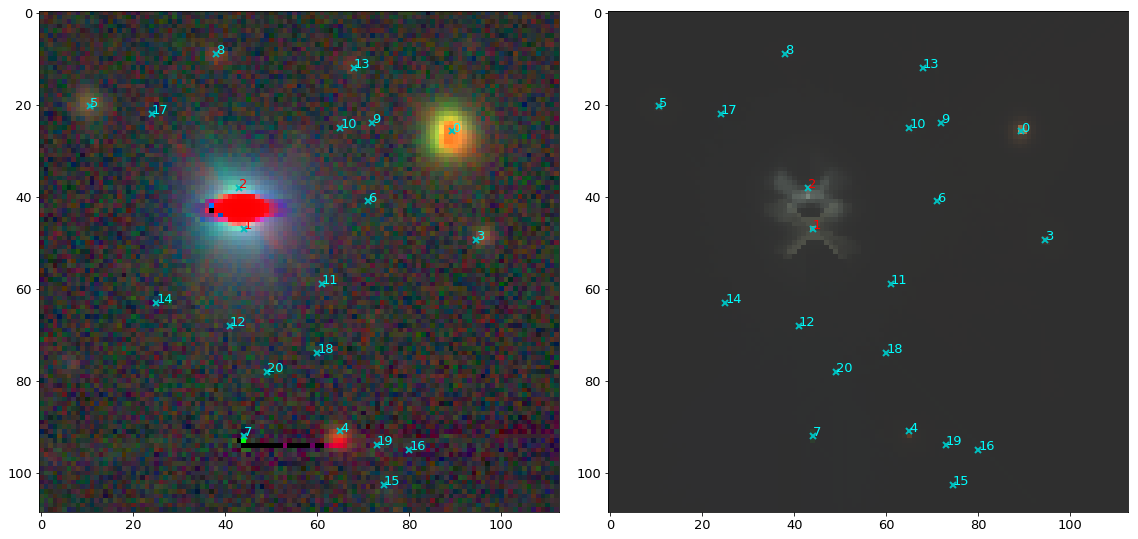

43158172147384603
vmin: -0.23577895760536194, vmax: 0.567831324010966


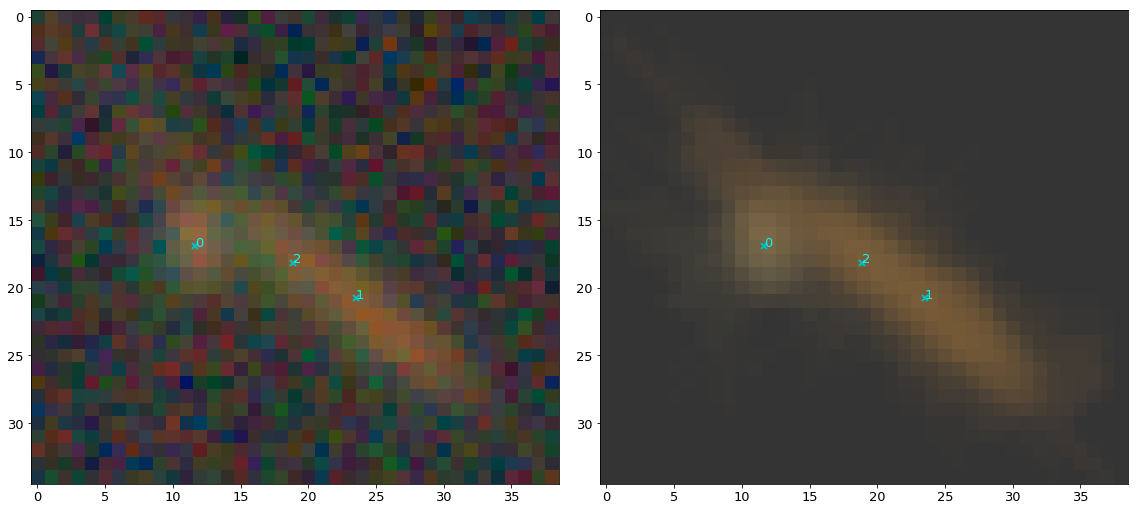

43158172147390532
vmin: -0.09582408517599106, vmax: 0.2609299804991623


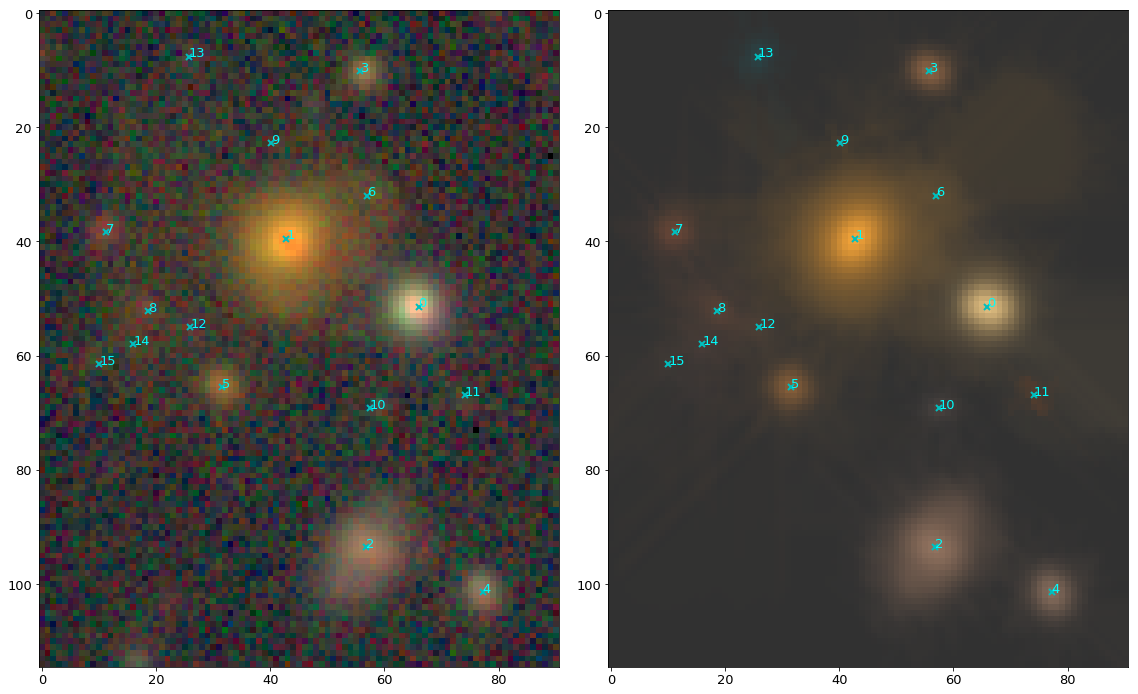

43158172147385877
vmin: -0.10005238652229309, vmax: 0.28488238679037675


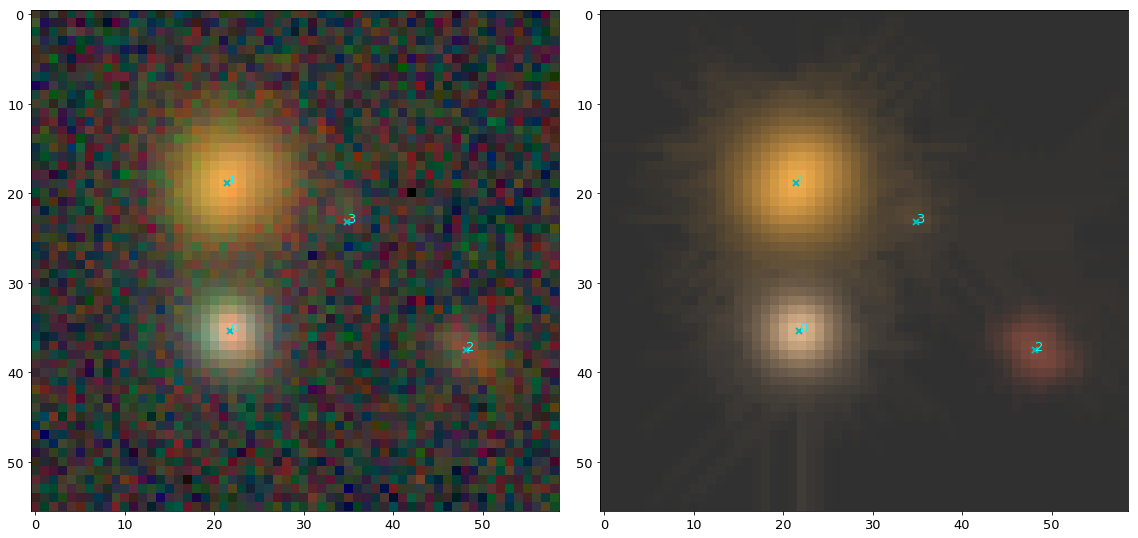

43158172147391144
vmin: -0.07477216422557831, vmax: 0.19119966423656054


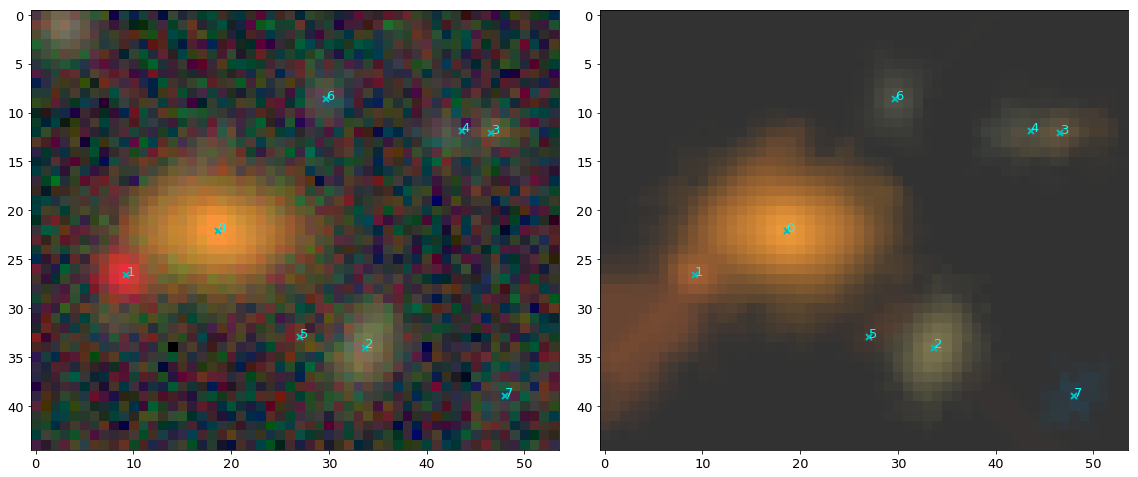

43158172147388983
vmin: -0.08219681680202484, vmax: 0.19467451390458035


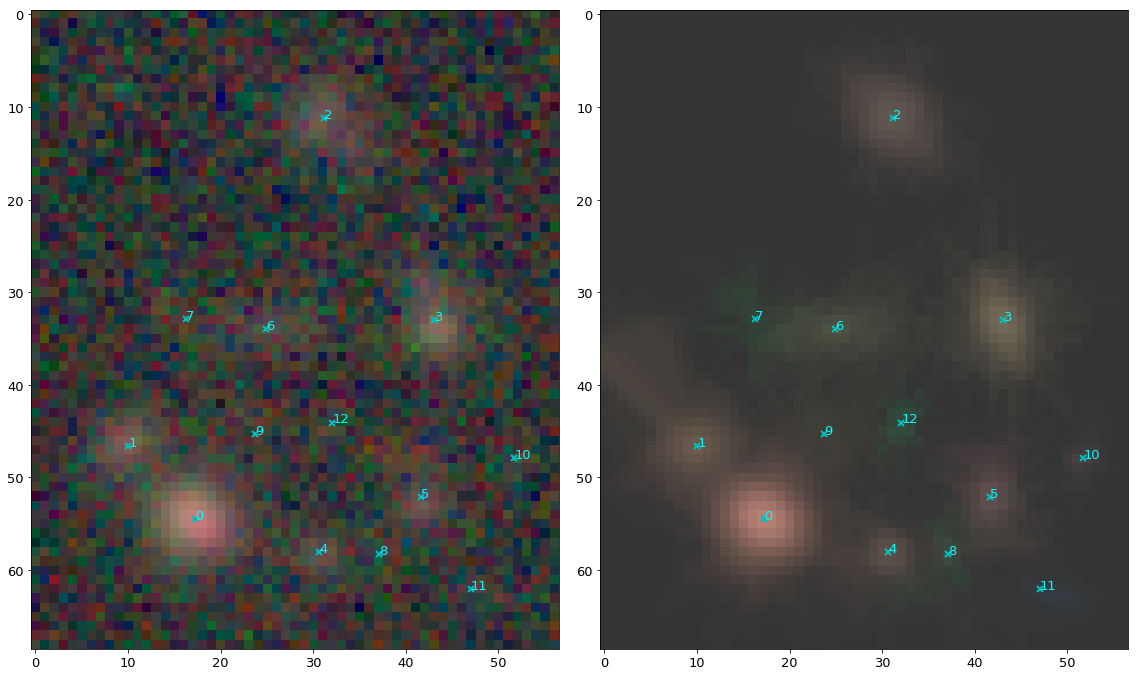

43158172147386449
vmin: -0.07765930891036987, vmax: 0.21279710351868483


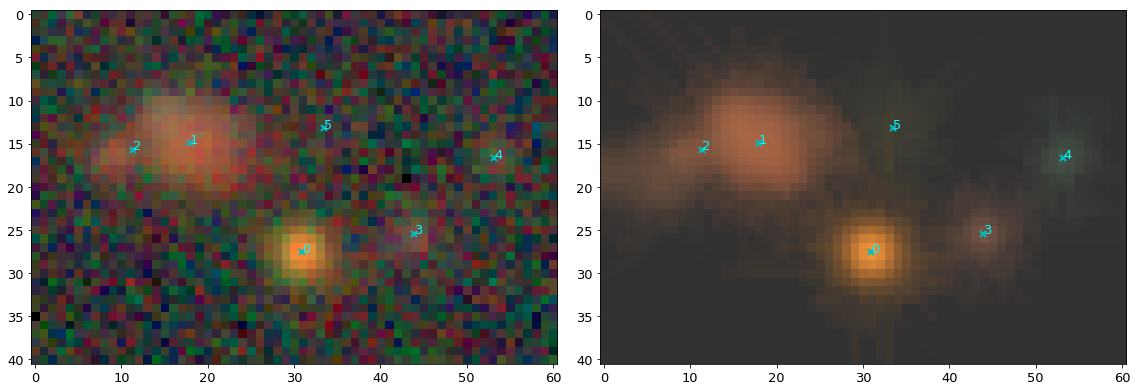

43158172147388414
vmin: -0.09894296526908875, vmax: 0.2128511401139054


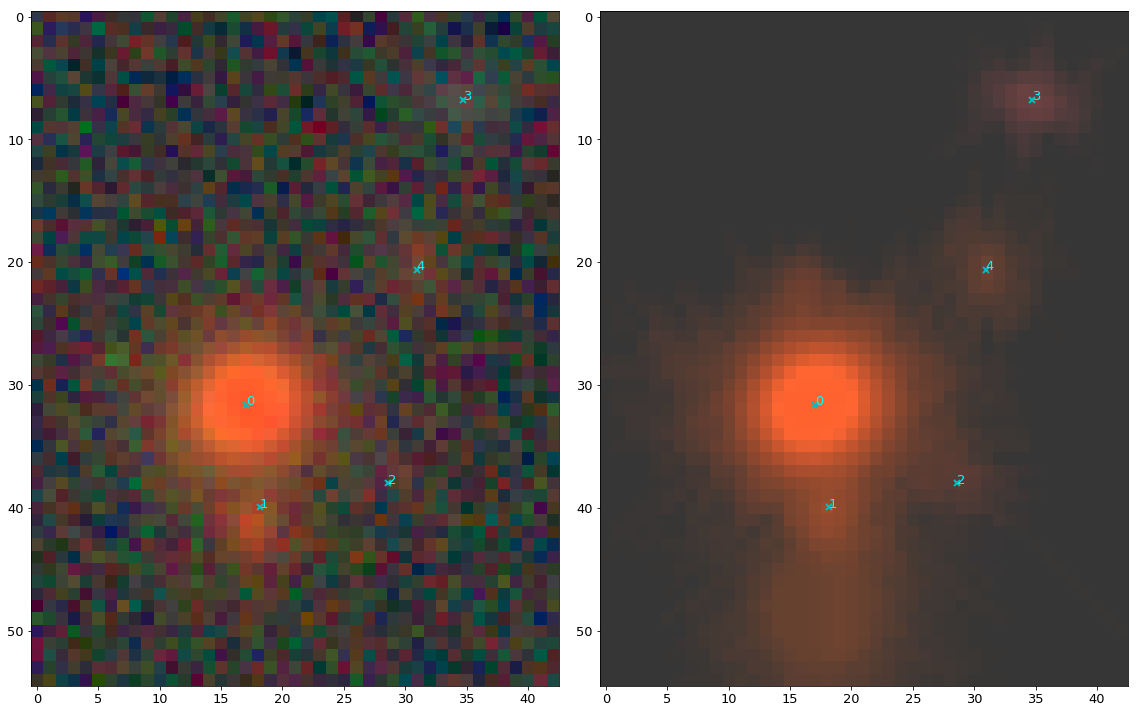

43158172147387591
vmin: -0.10899293422698975, vmax: 0.29901750062062066


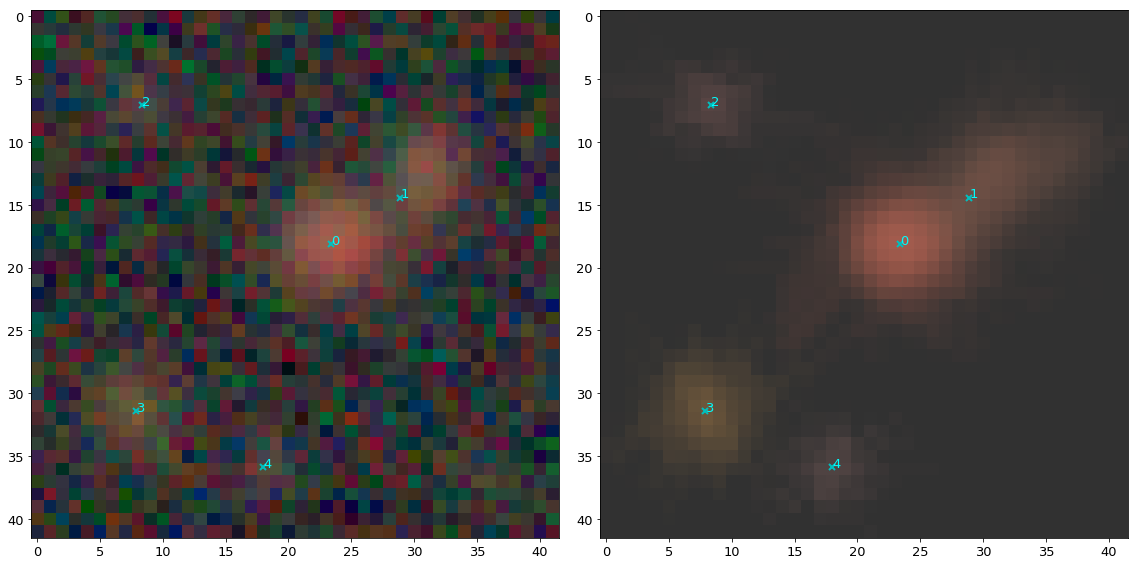

43158172147391760
vmin: -0.22690799832344055, vmax: 0.38275483397015225


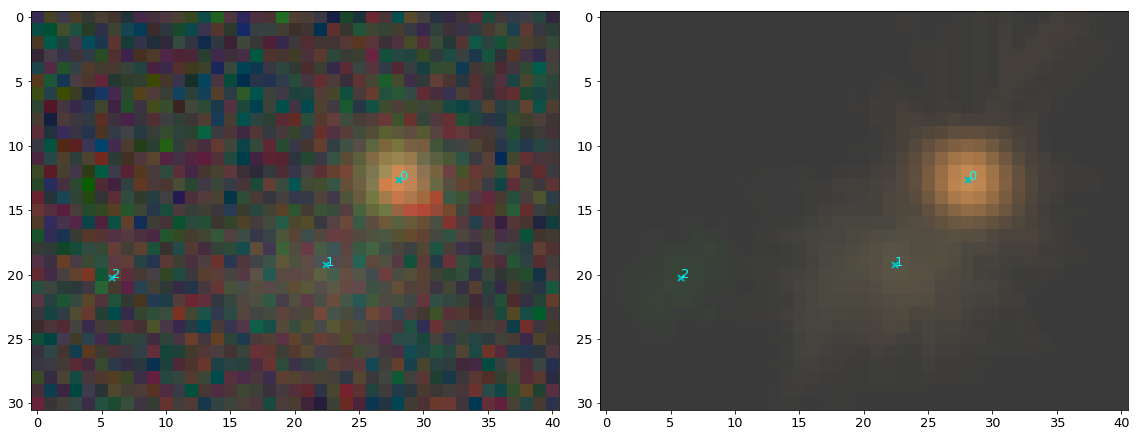

43158172147385863
vmin: -0.2553641200065613, vmax: 0.5879851336071127


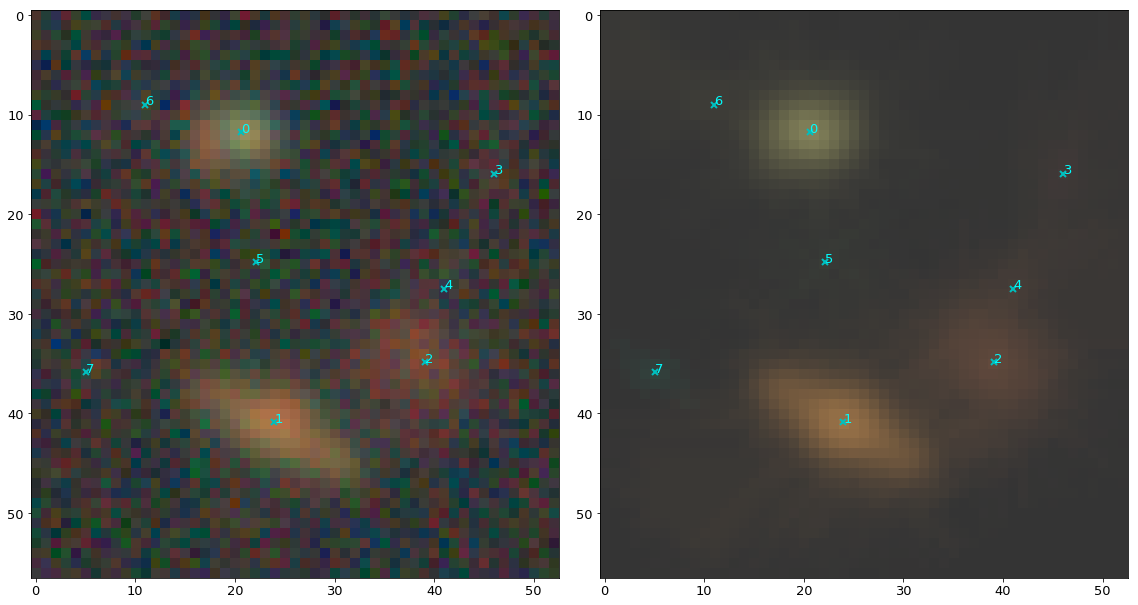

43158172147389589
vmin: -0.10315873473882675, vmax: 0.22131888530157712


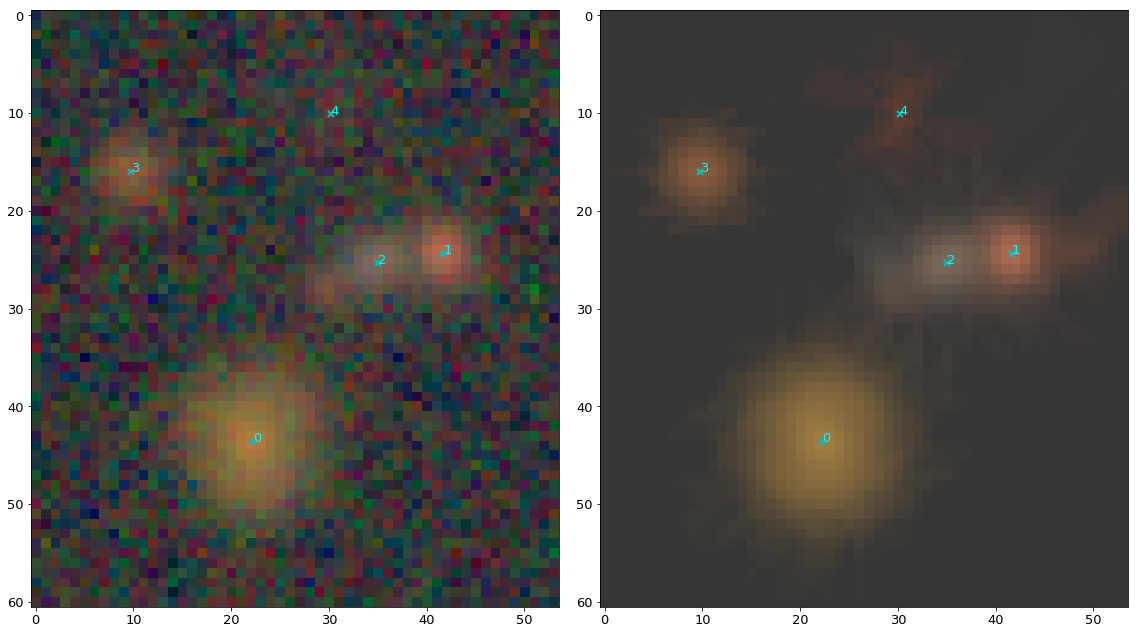

43158172147390568
vmin: -0.26168498396873474, vmax: 0.5543804828424409


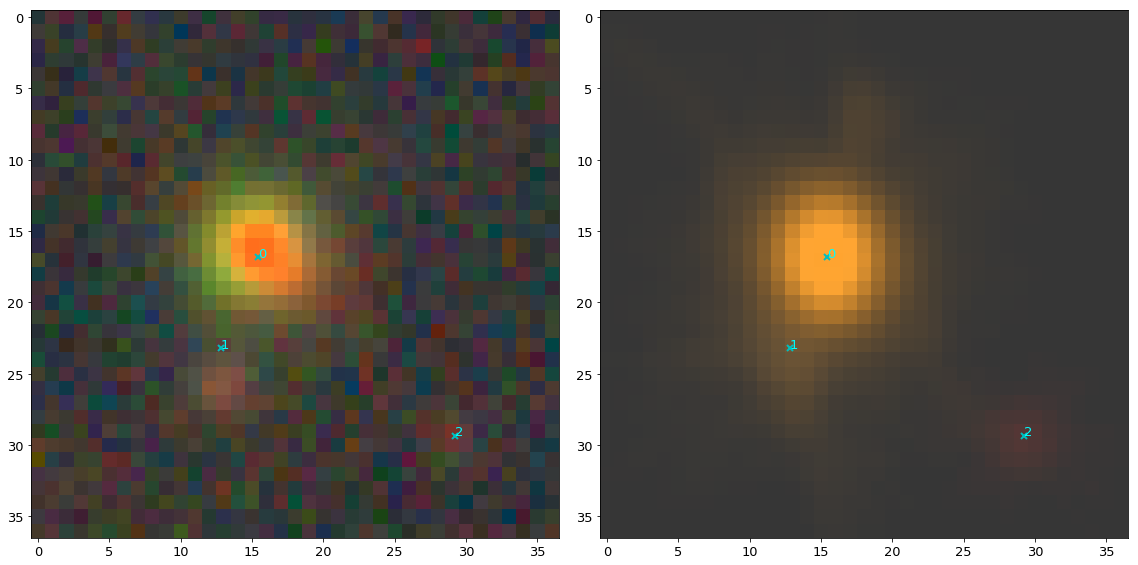

43158172147387767
vmin: -0.11741013824939728, vmax: 0.24132593477282532


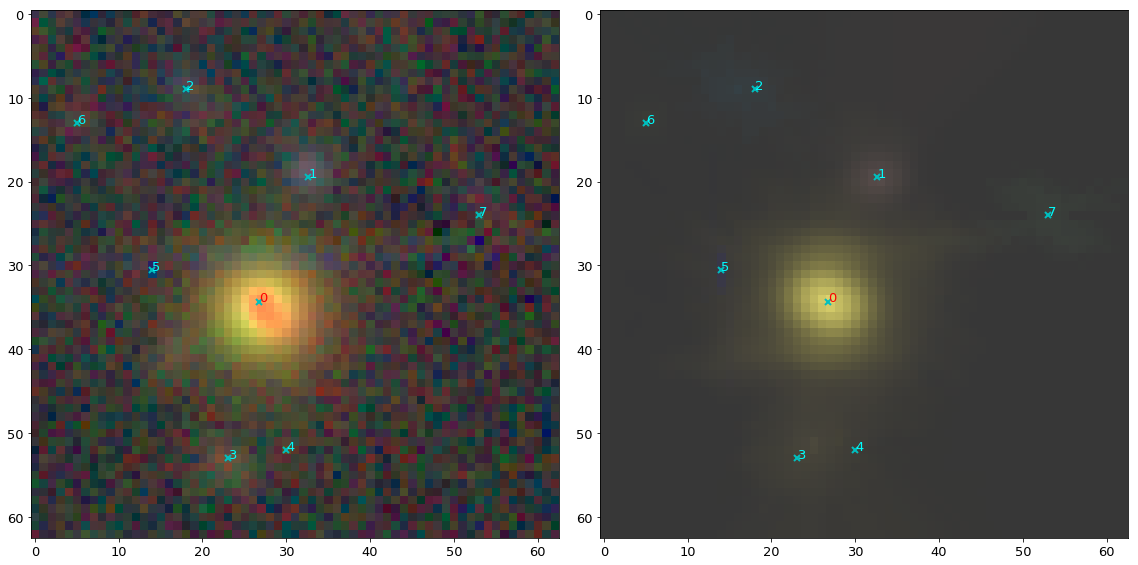

43158172147386355
vmin: -0.19536873698234558, vmax: 0.430143326502688


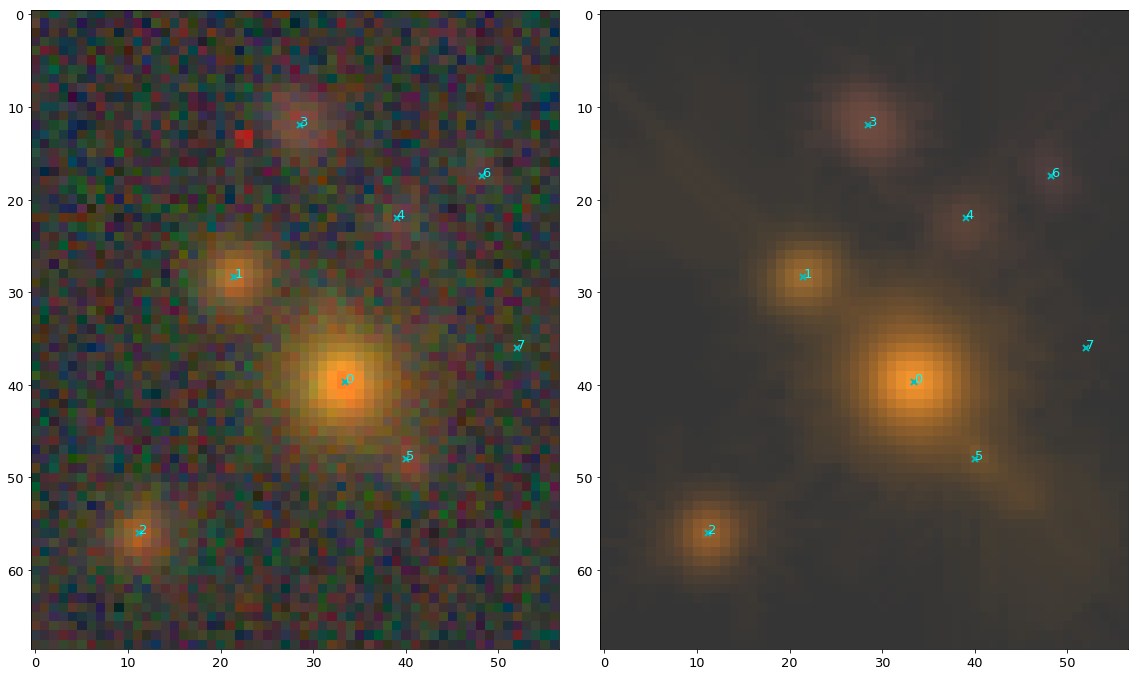

43158172147387938
vmin: -0.20820190012454987, vmax: 0.5782782727202215


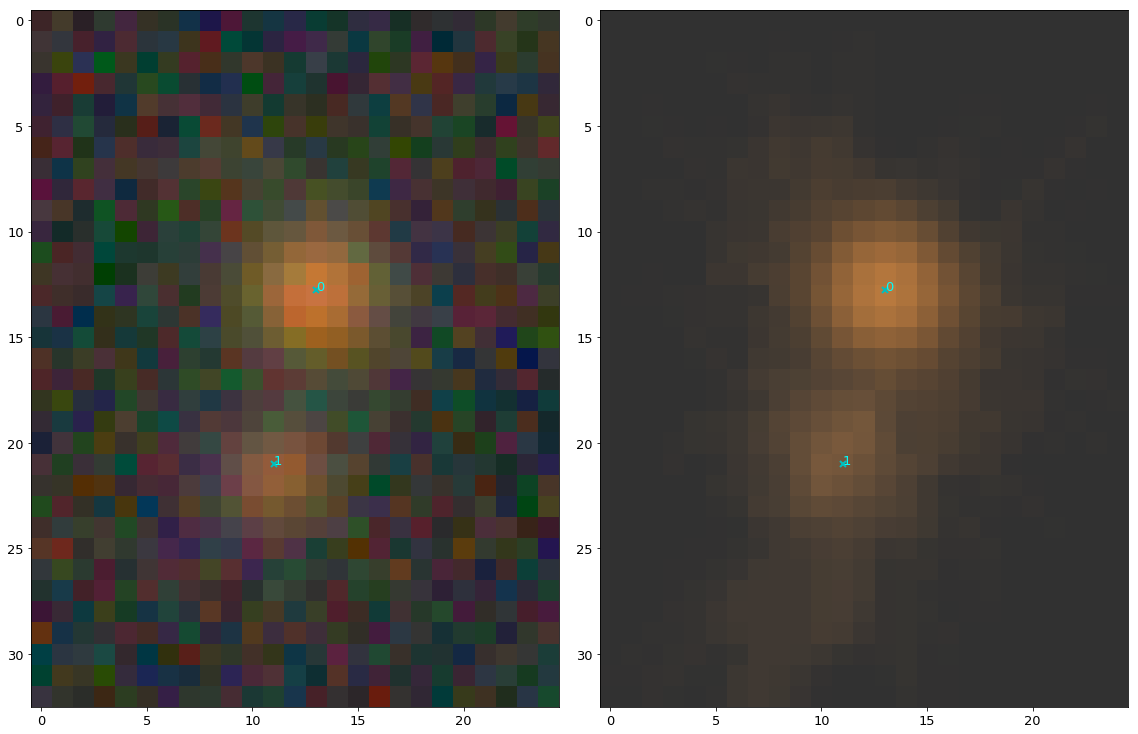

43158172147387256
vmin: -0.2210787981748581, vmax: 0.5277064819168664


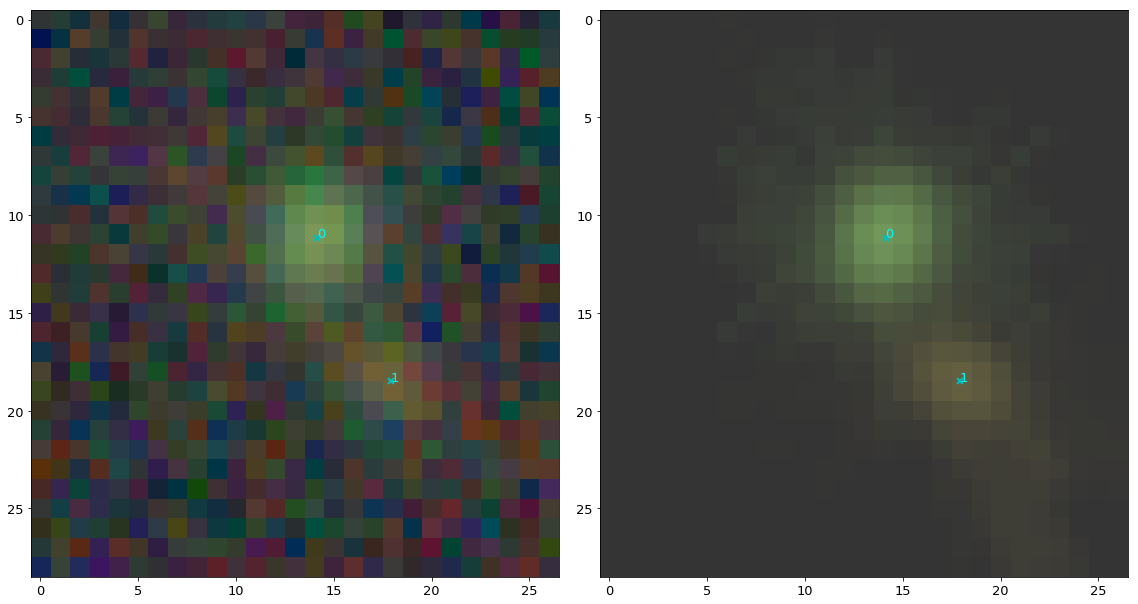

43158172147384991
vmin: -0.21901439130306244, vmax: 0.43595058012818133


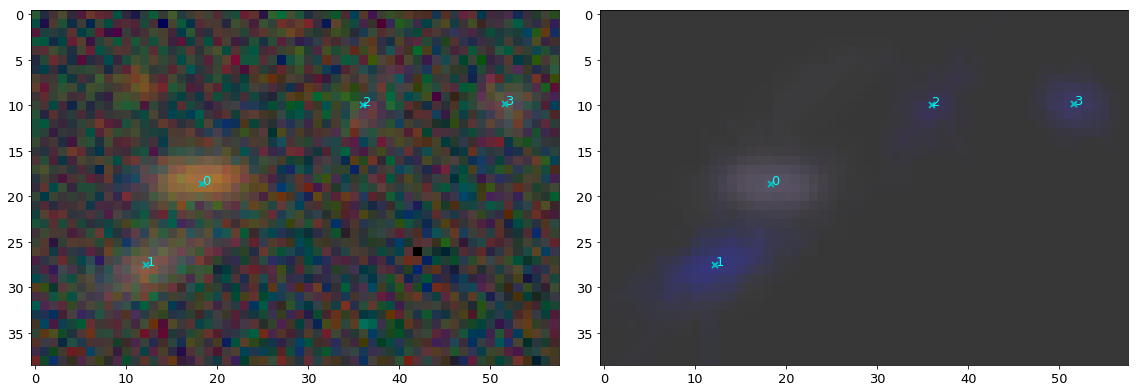

43158172147391216
vmin: -0.07663364708423615, vmax: 0.23795084973404568


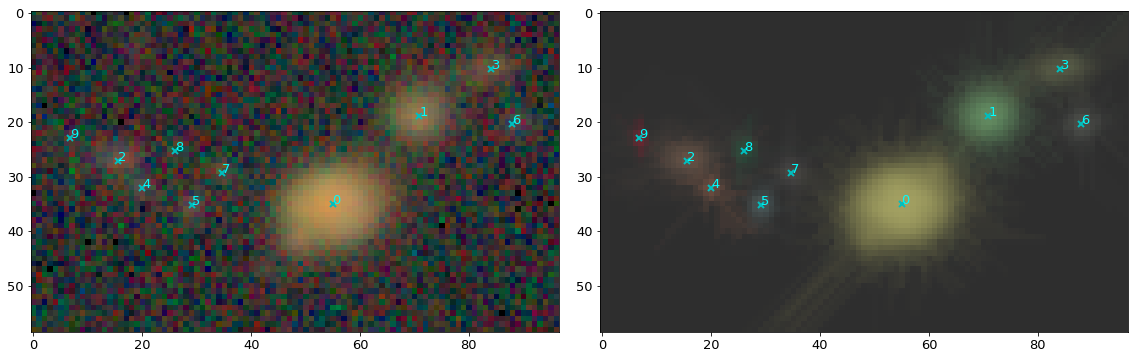

43158172147386498
vmin: -0.08526217937469482, vmax: 0.2068875157551632


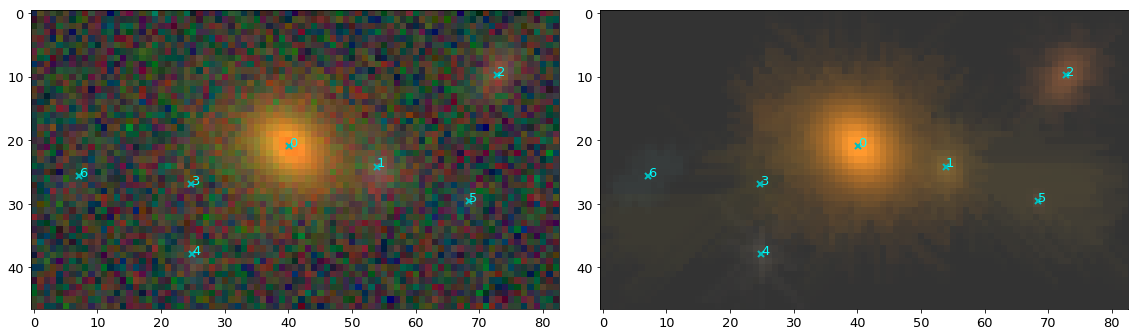

43158172147385722
vmin: -0.10498867183923721, vmax: 0.34037249529317787


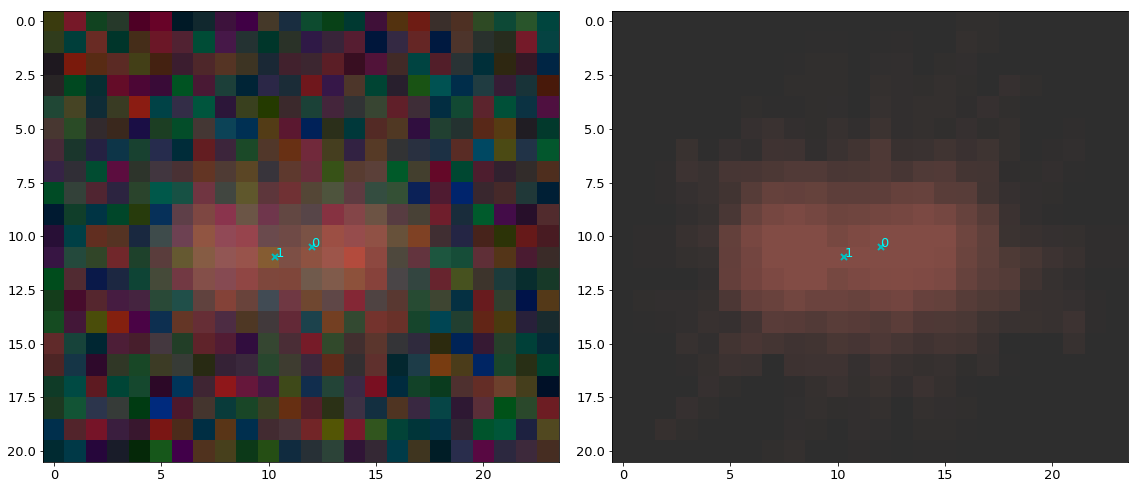

43158172147391146
vmin: -0.08323004096746445, vmax: 0.19767246877084724


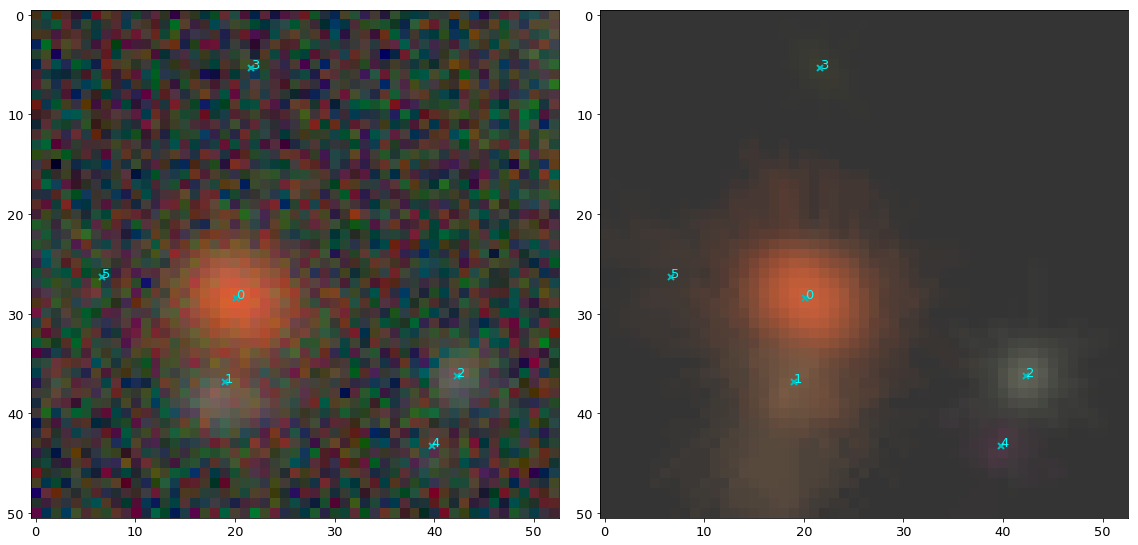

43158172147391858
vmin: -0.08223520964384079, vmax: 0.34607589306355285


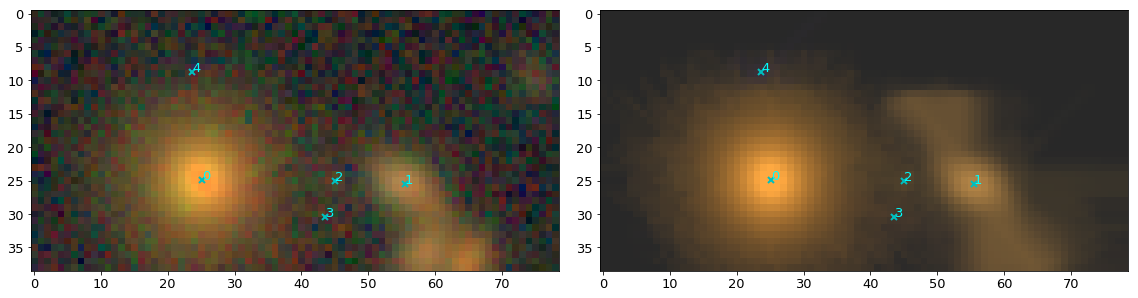

43158172147387434
vmin: -0.28345322608947754, vmax: 0.49366336512077263


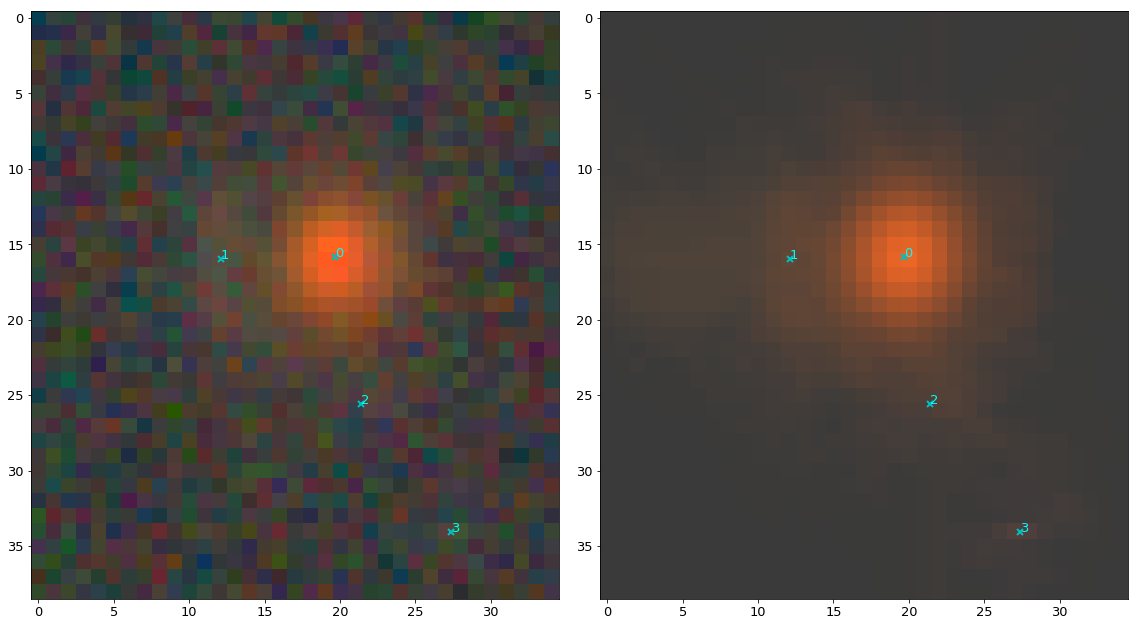

43158172147385015
vmin: -0.21669328212738037, vmax: 0.644077411111067


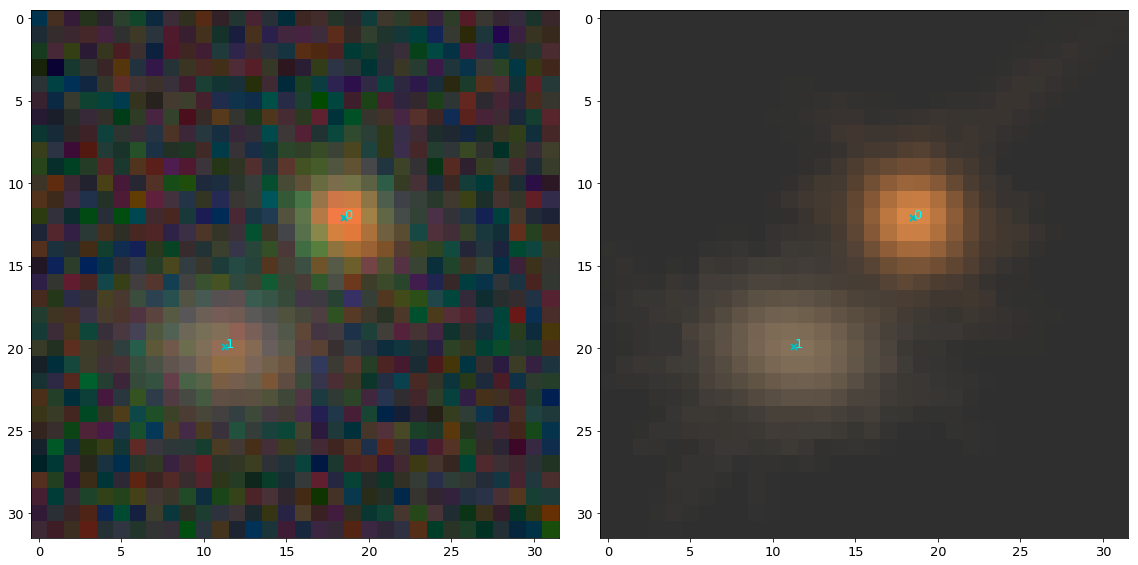

43158172147389532
vmin: -0.23400166630744934, vmax: 0.2883434705453662


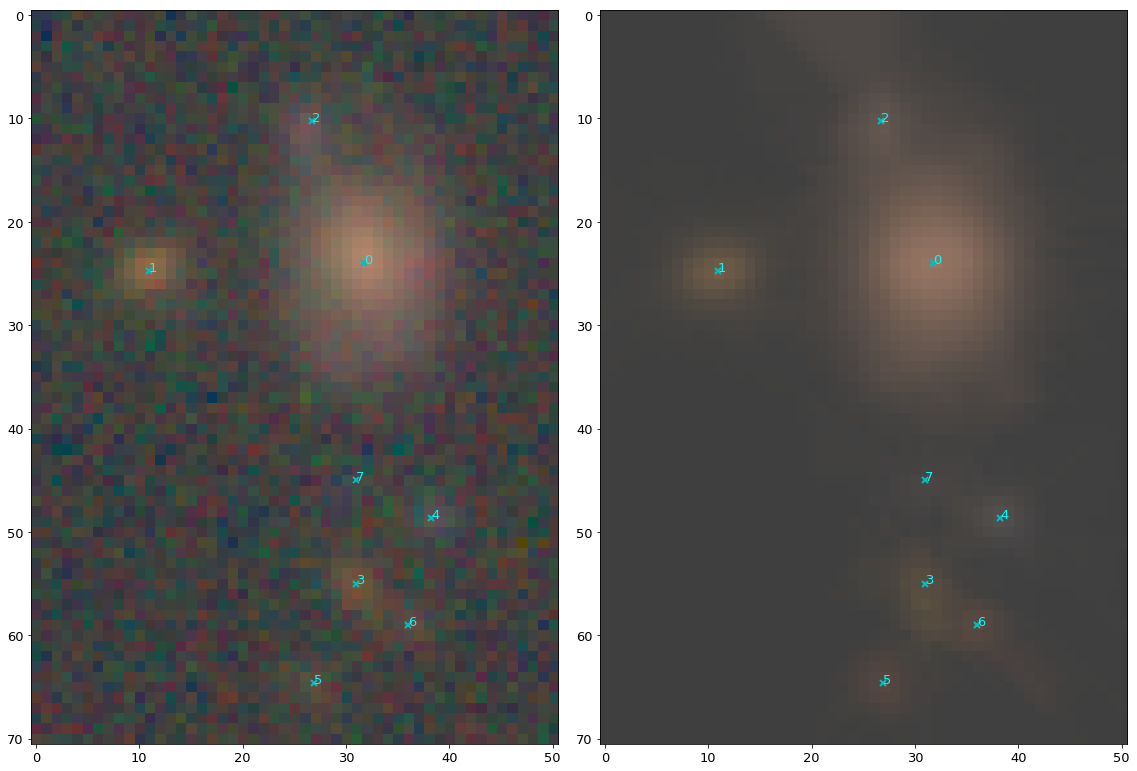

43158172147384804
vmin: -0.22015734016895294, vmax: 0.5142981748489057


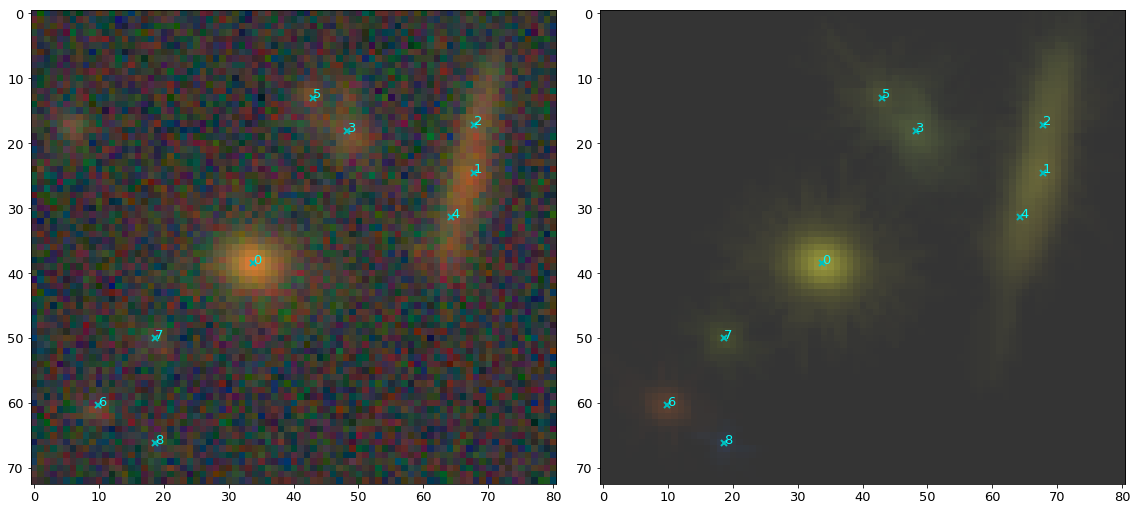

43158172147388083
vmin: -0.2249712496995926, vmax: 0.5186934783137428


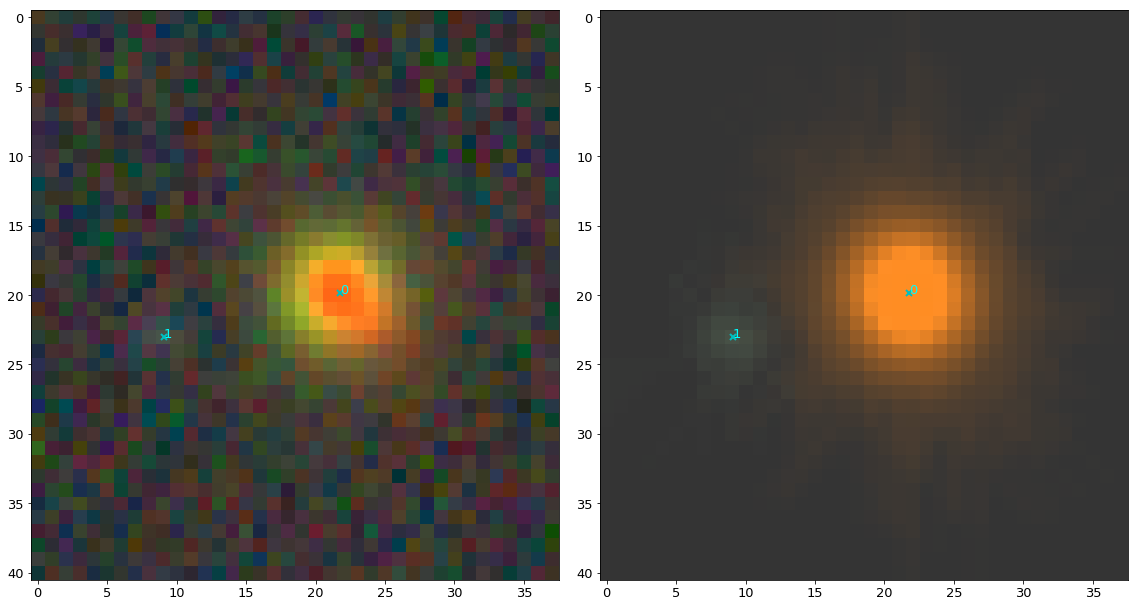

43158172147389352
vmin: -0.10698406398296356, vmax: 0.25967283974456945


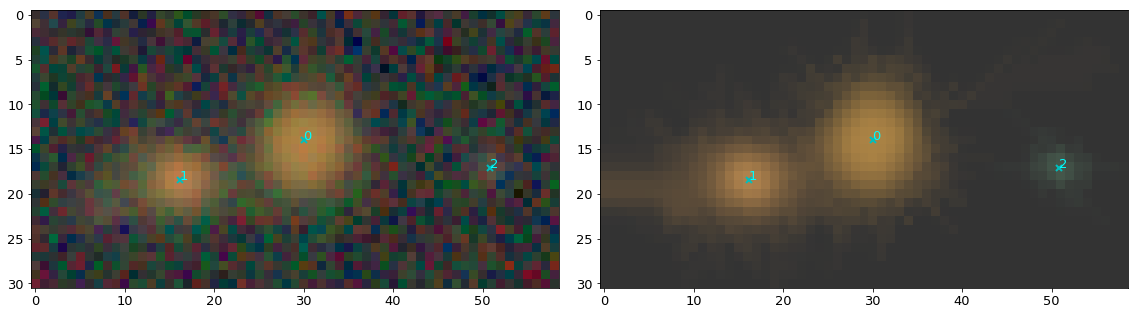

43158172147386592
vmin: -0.07862985879182816, vmax: 0.2913955105272831


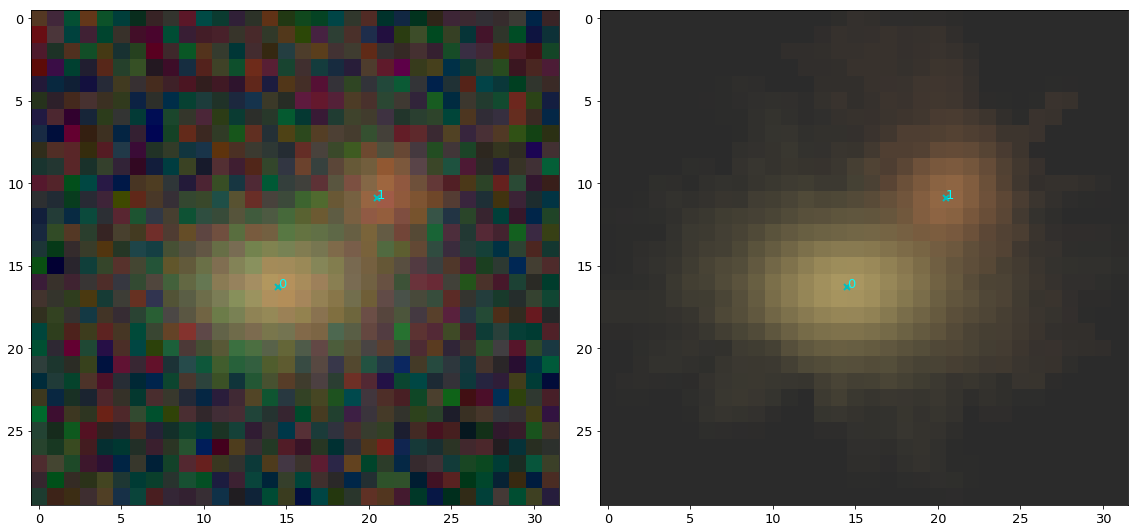

43158172147389309
vmin: -0.060223087668418884, vmax: 0.22922622113093374


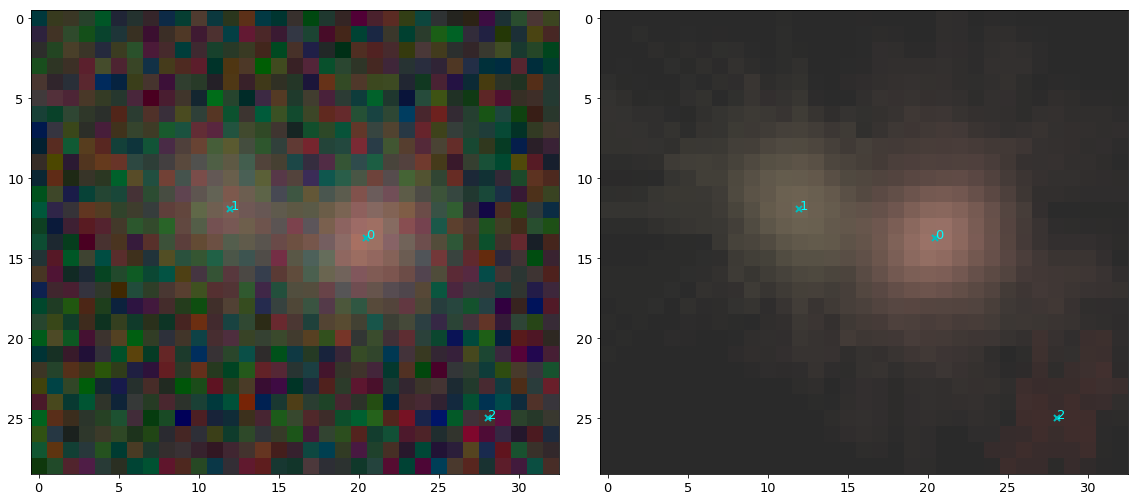

43158172147387326
vmin: -0.25710493326187134, vmax: 0.4857926304012637


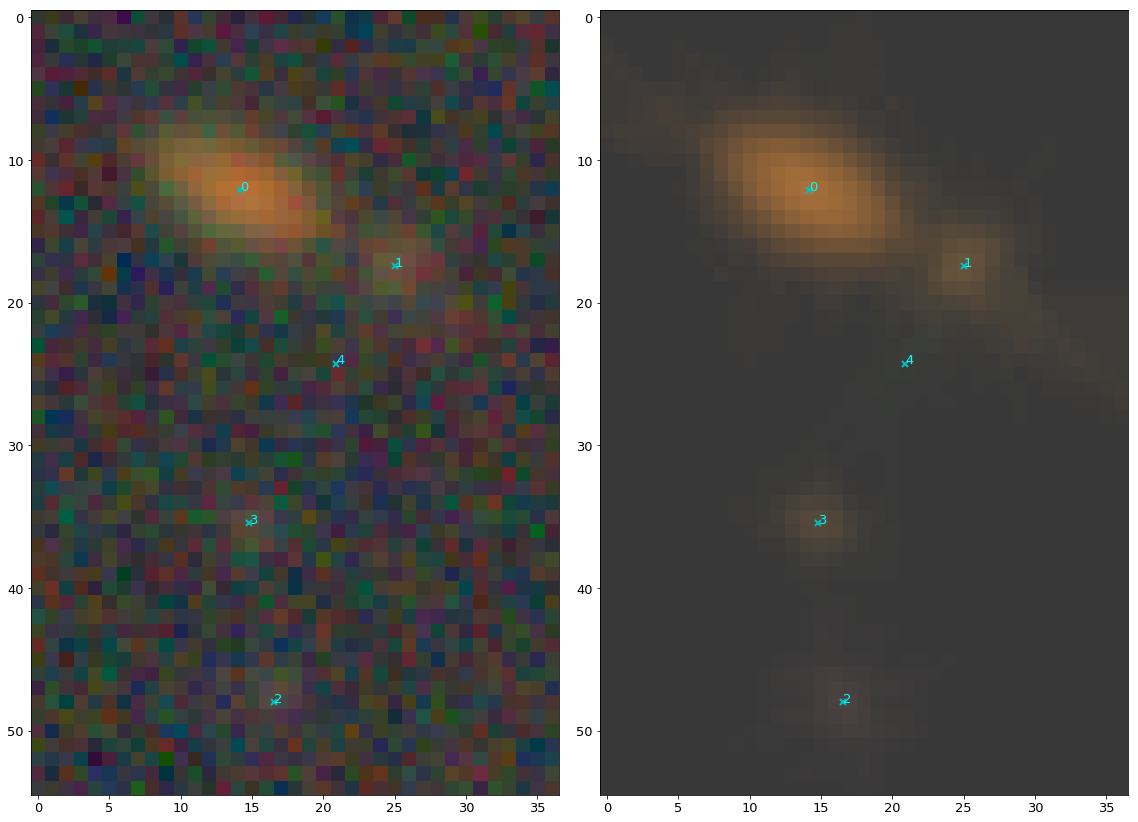

43158172147389540
vmin: -0.08834309130907059, vmax: 0.363219487916793


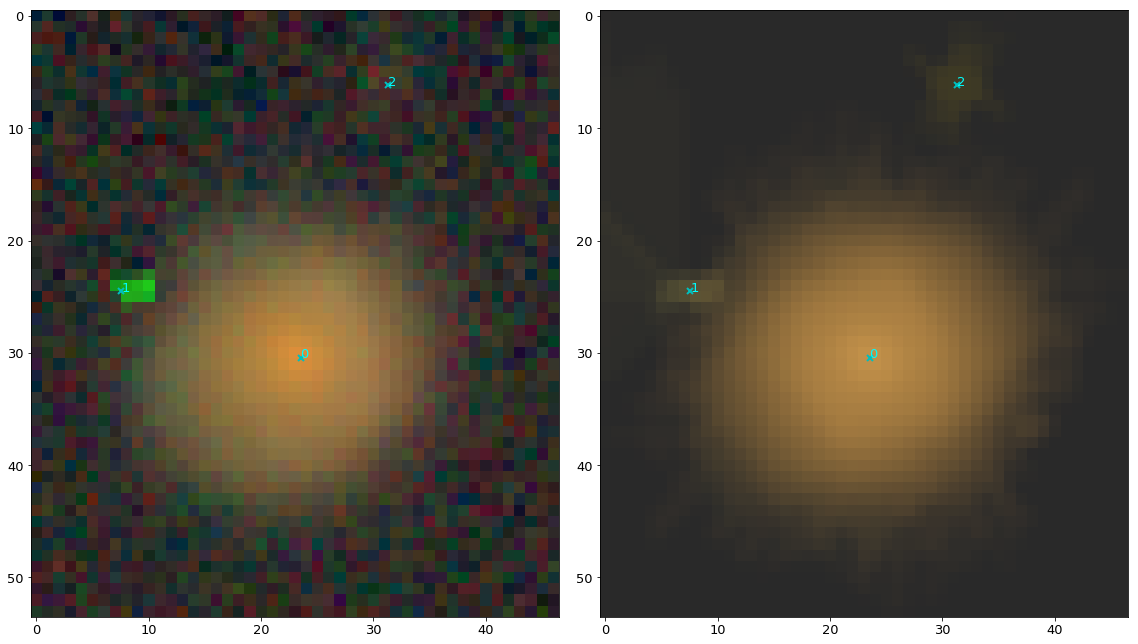

43158172147390896
vmin: -0.09094740450382233, vmax: 0.237958167882149


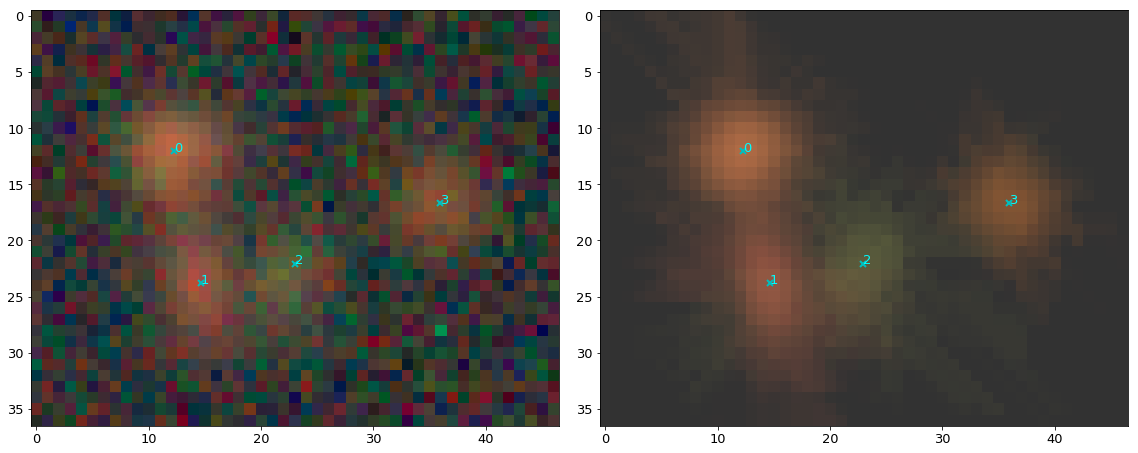

43158172147391360
vmin: -0.24892140924930573, vmax: 0.49439096450805664


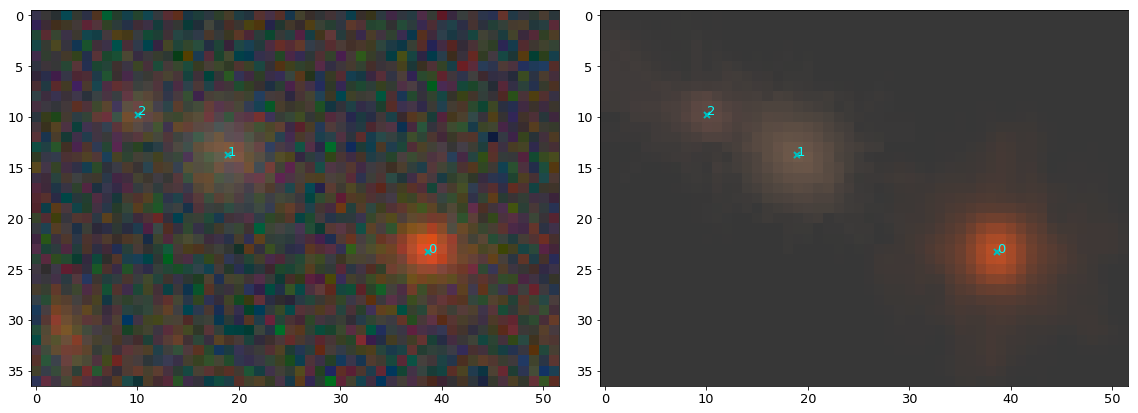

43158172147389461
vmin: -0.22042031586170197, vmax: 0.457052081823349


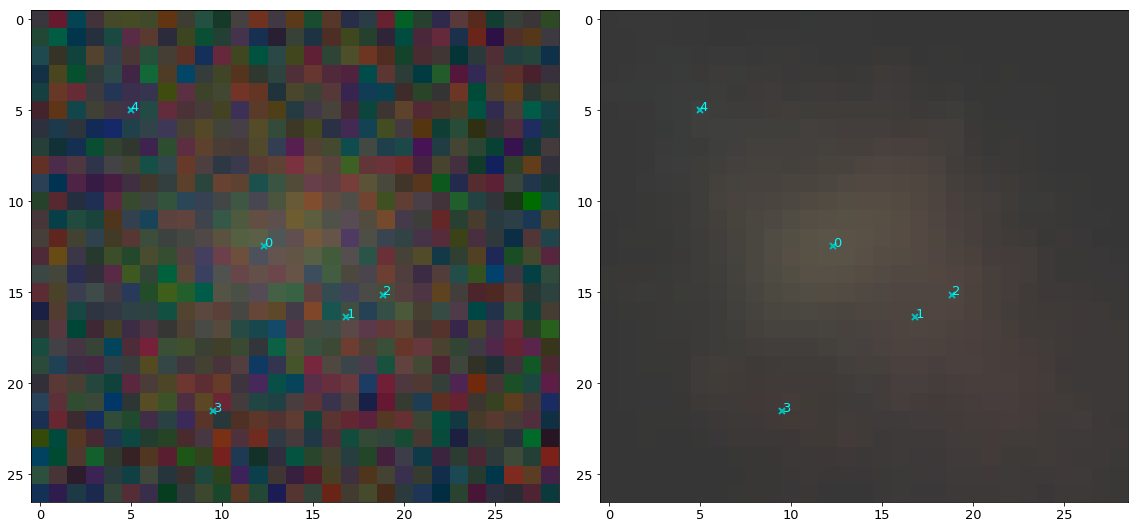

43158172147386221
vmin: -0.07909200340509415, vmax: 0.23064123360502353


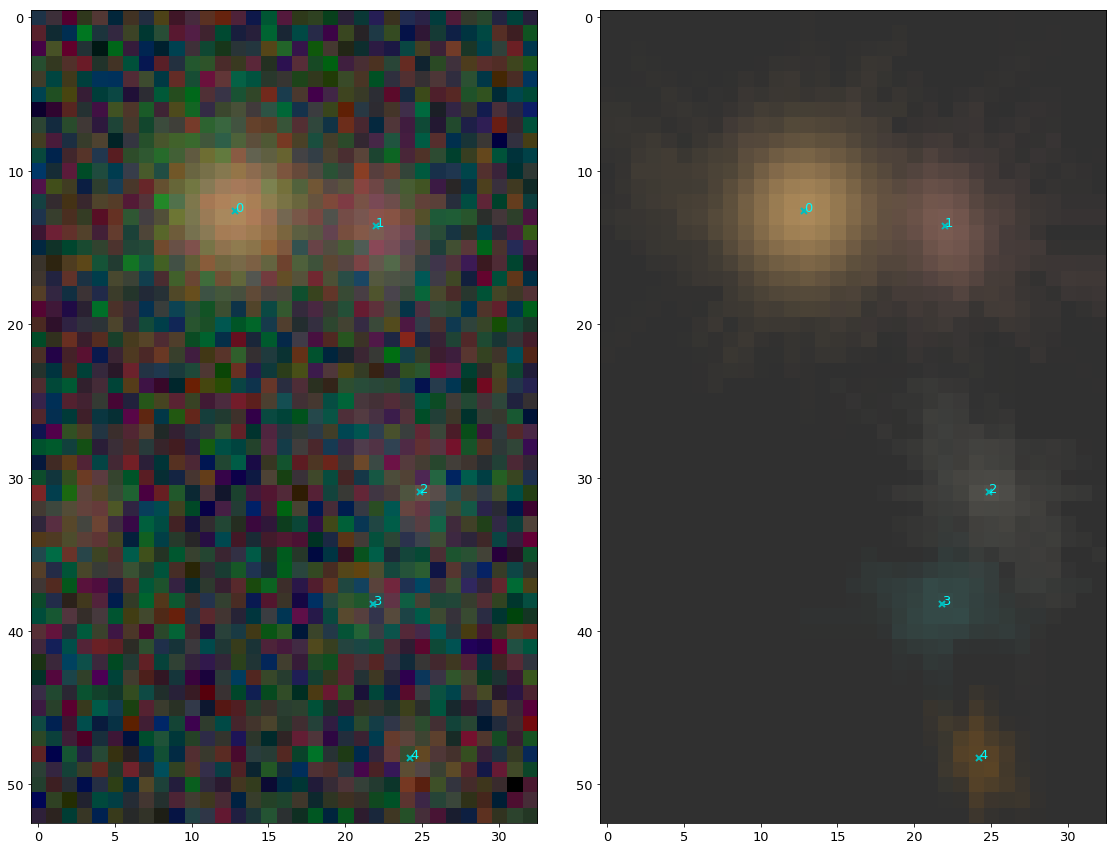

43158172147390115
vmin: -0.07946175336837769, vmax: 0.2271301925881805


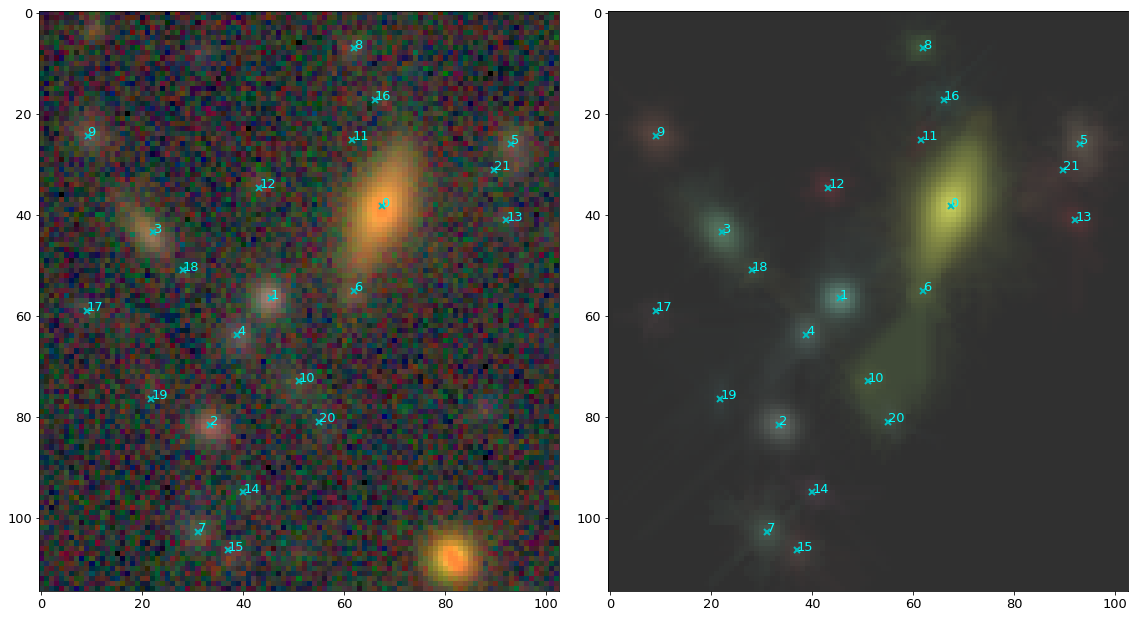

43158172147390606
vmin: -0.09113164991140366, vmax: 0.29076605933777094


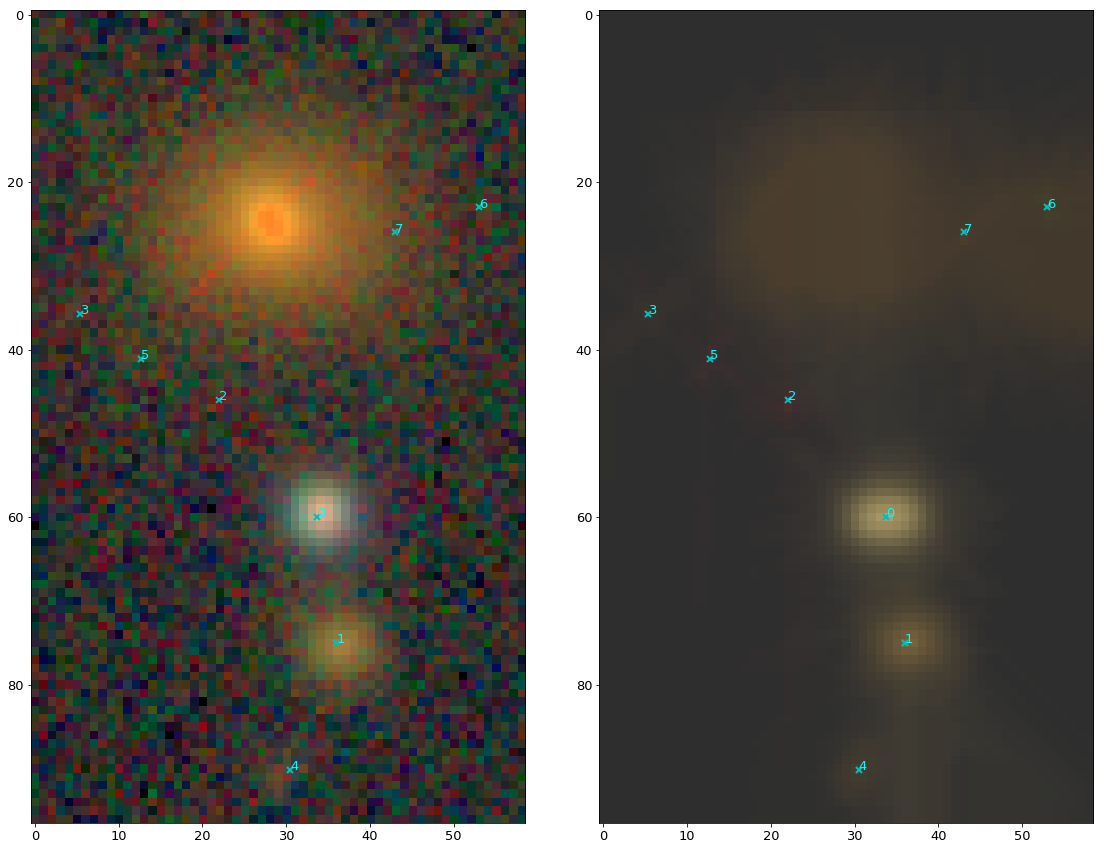

43158172147386917
vmin: -0.22137781977653503, vmax: 0.41852911307490215


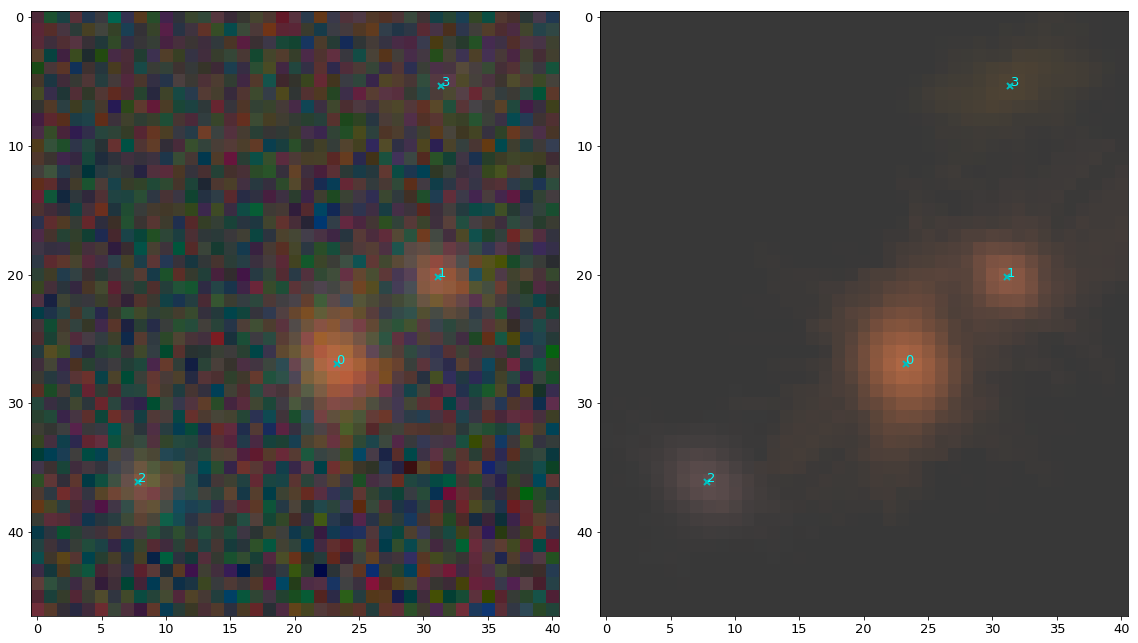

43158172147390562
vmin: -0.10114534199237823, vmax: 0.3077356845116855


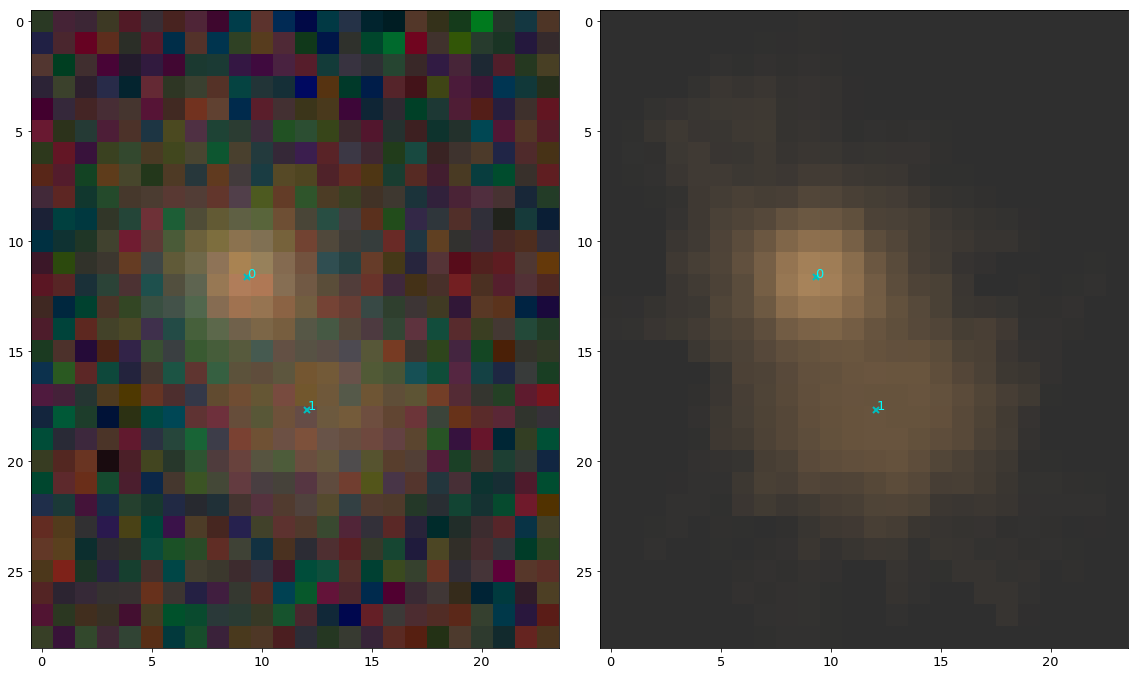

43158172147389107
vmin: -0.08251279592514038, vmax: 0.22992579932125018


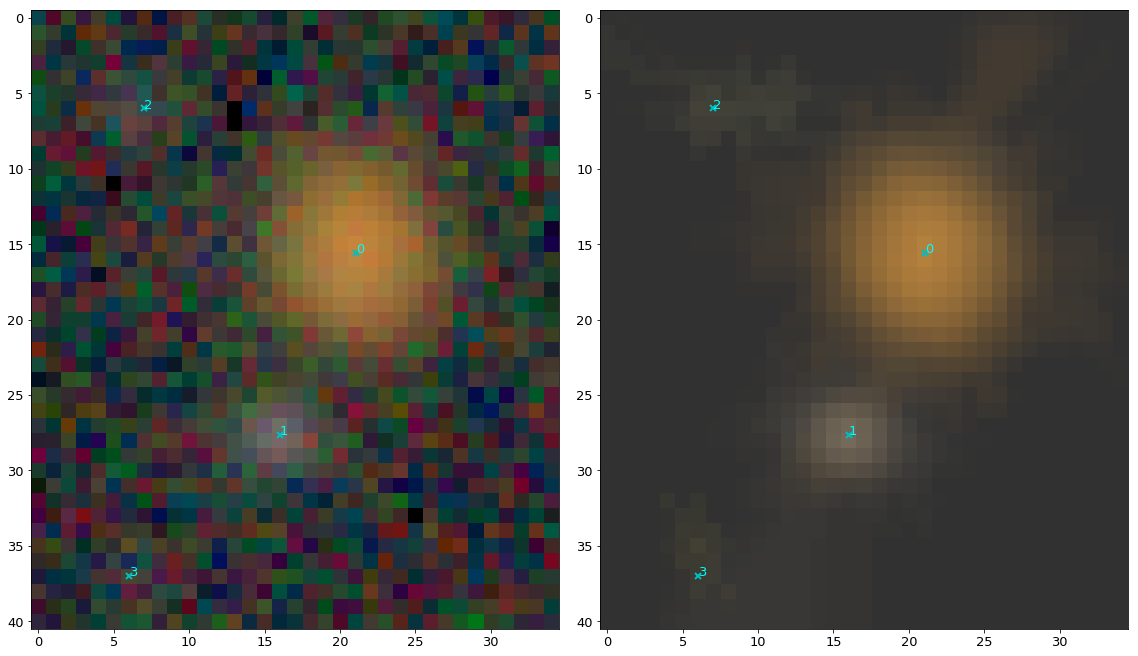

43158172147386493
vmin: -0.08897169679403305, vmax: 0.24805892281703526


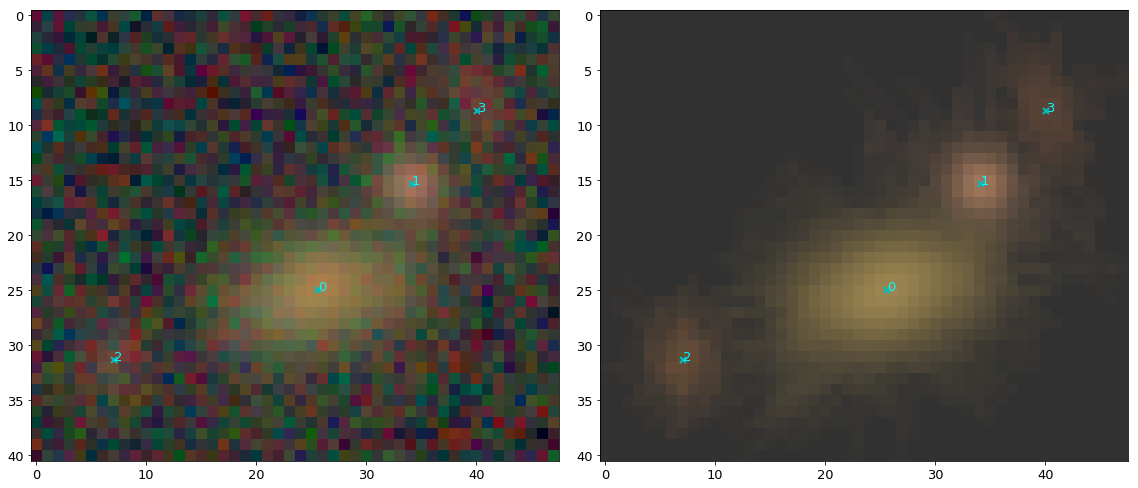

43158172147389050
vmin: -0.09712085127830505, vmax: 0.27129020764357537


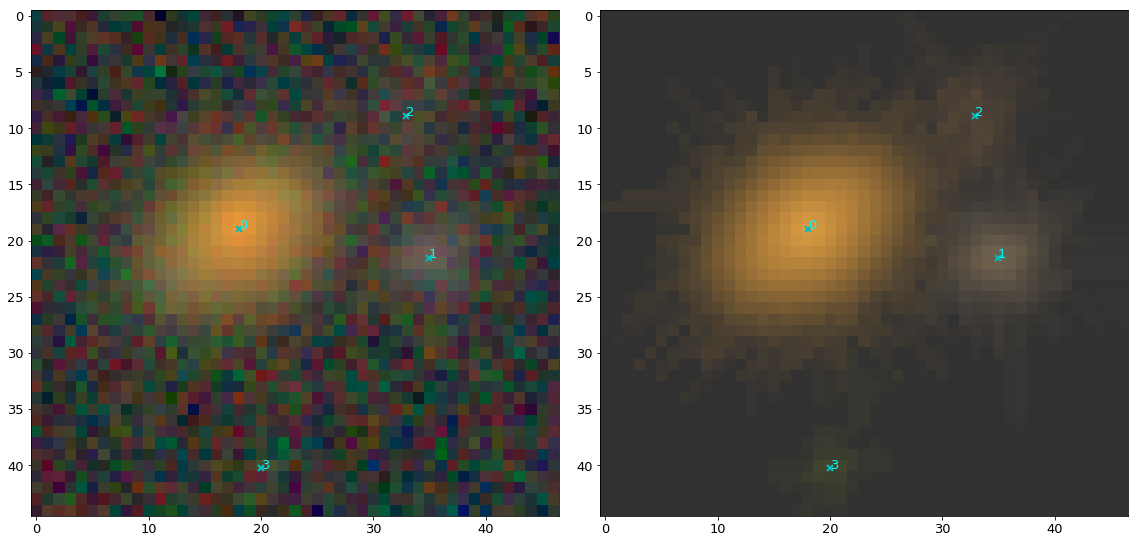

43158172147389165
vmin: -0.2139034867286682, vmax: 0.5068095214759305


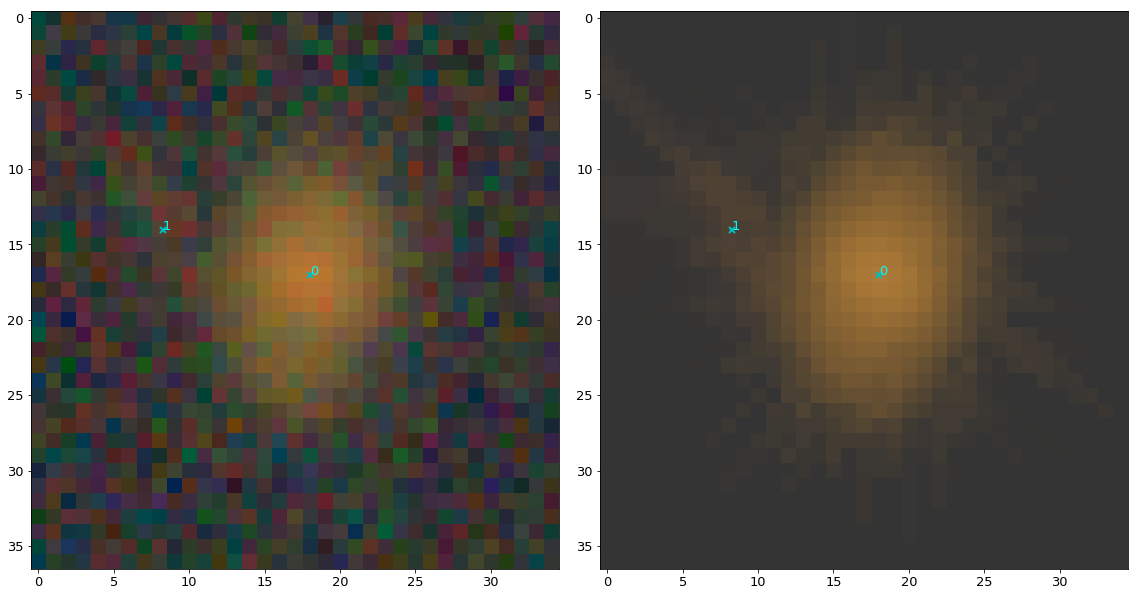

43158172147386531
vmin: -0.24273113906383514, vmax: 0.4950505495071411


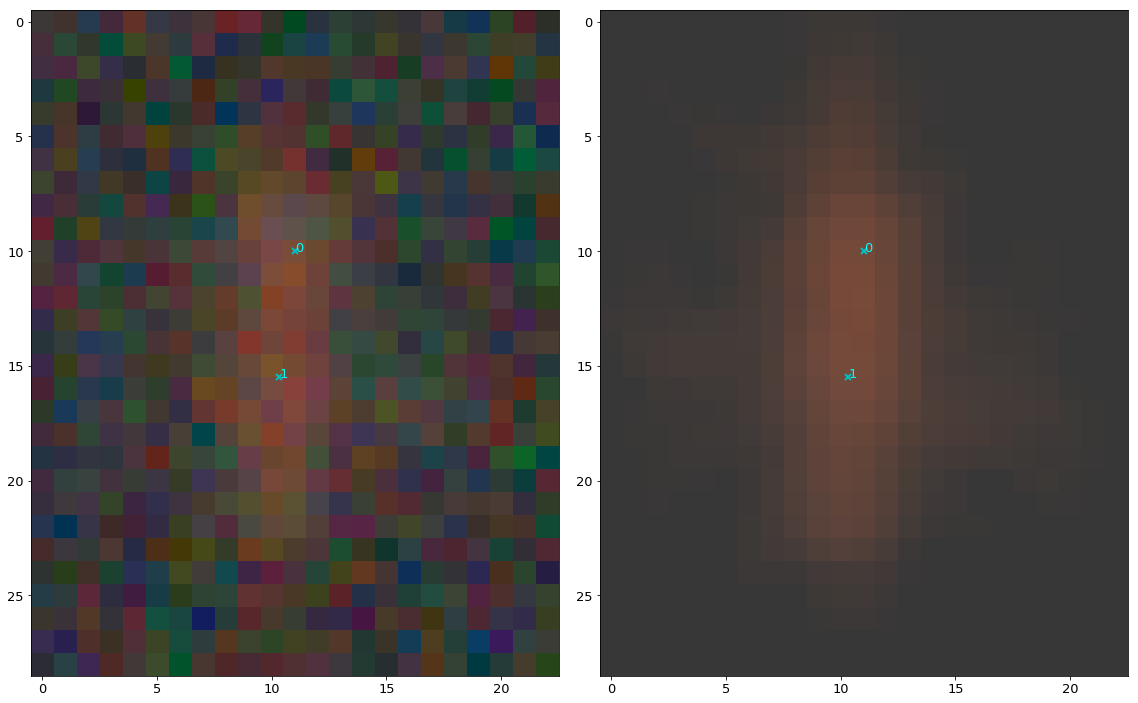

43158172147389251
vmin: -0.25824105739593506, vmax: 0.5485131209647144


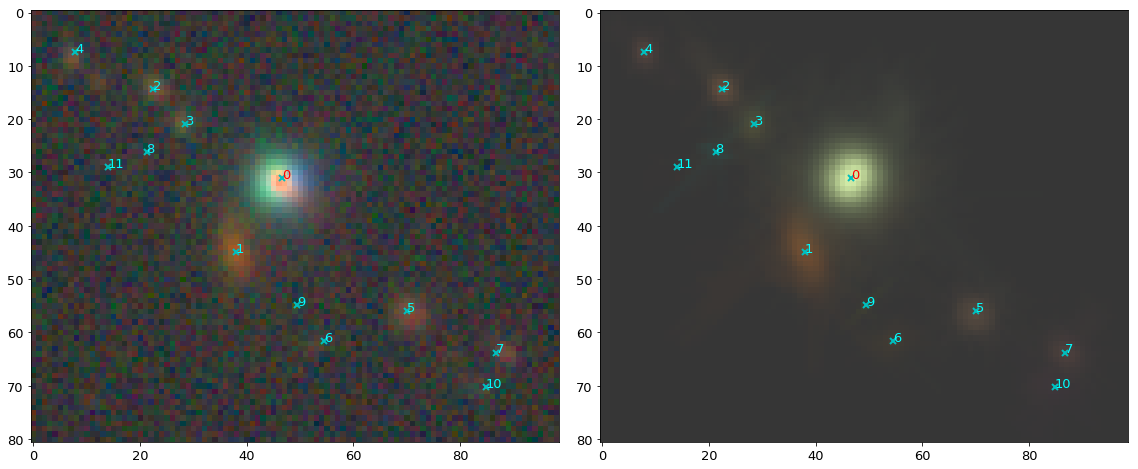

43158172147388990
vmin: -0.14713220298290253, vmax: 0.3306659202368649


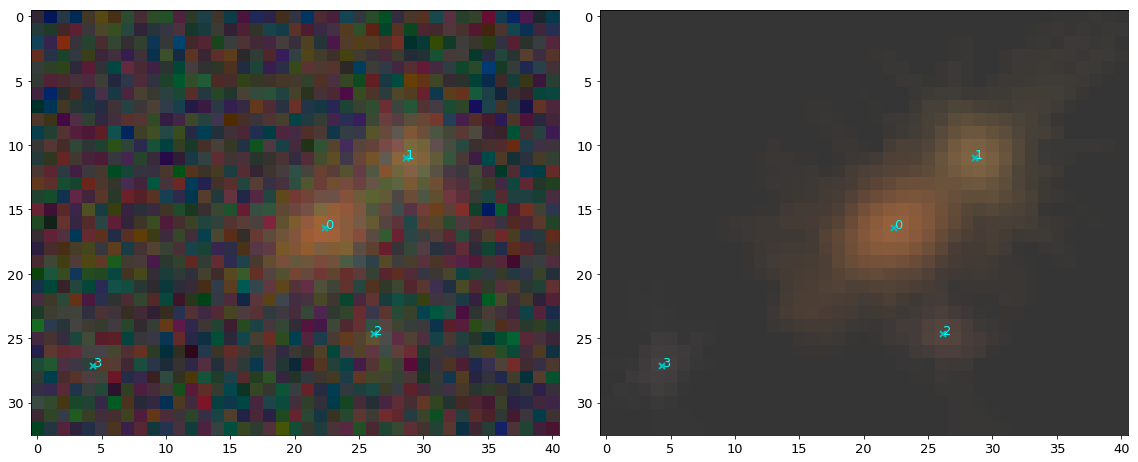

43158172147387690
vmin: -0.2506062388420105, vmax: 0.39910482232001826


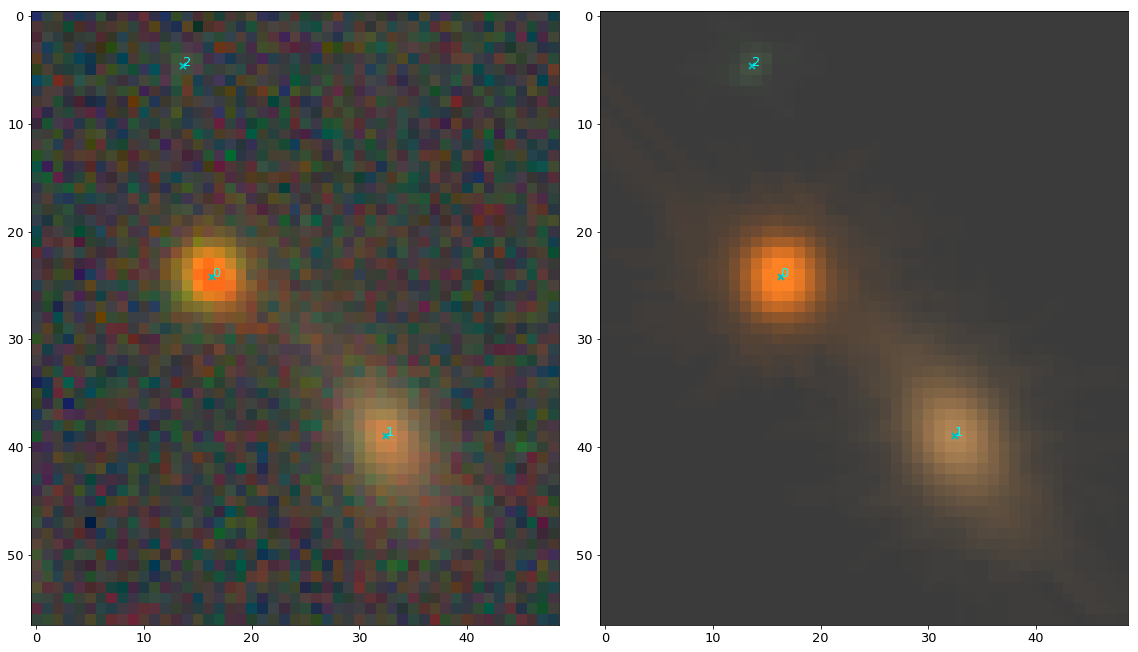

43158172147389887
vmin: -0.1206667348742485, vmax: 0.23055333589977986


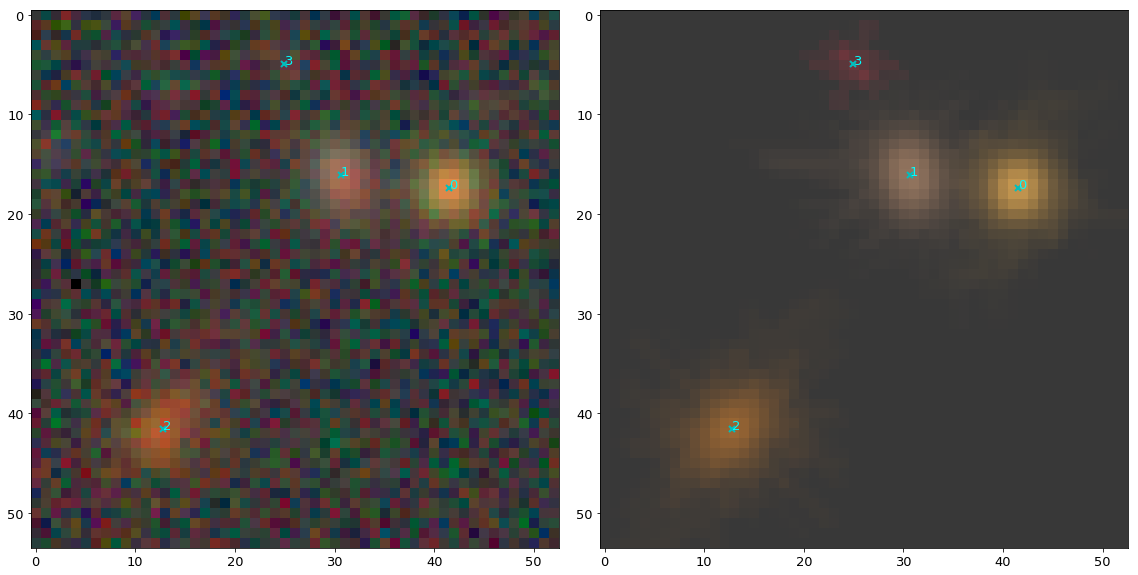

43158172147391651
vmin: -0.07540048658847809, vmax: 0.2435366269525817


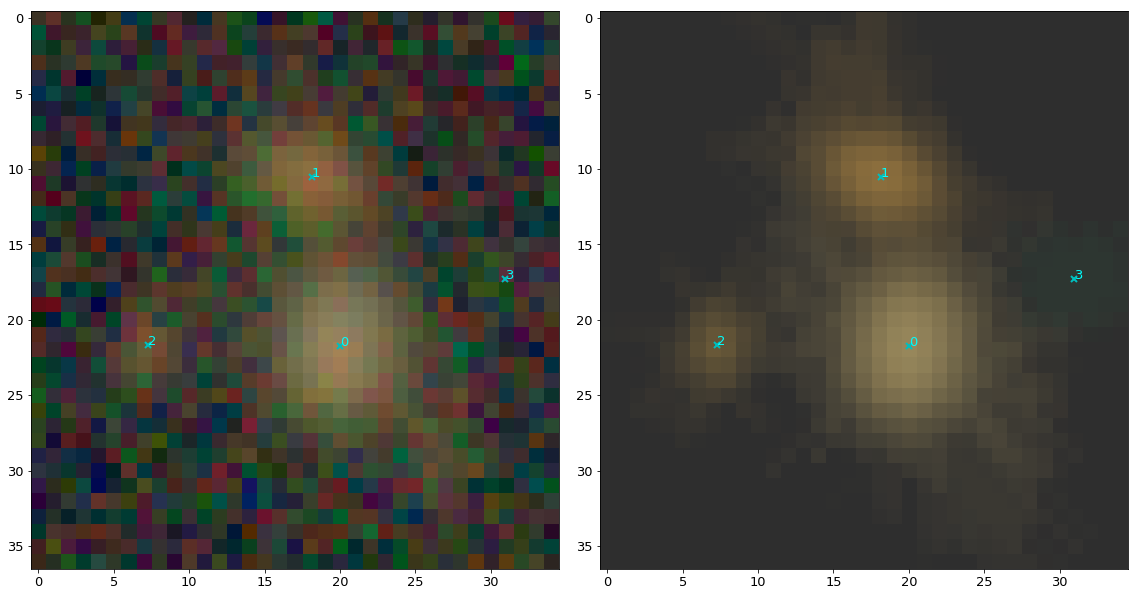

43158172147391187
vmin: -0.07363391667604446, vmax: 0.18062749691891852


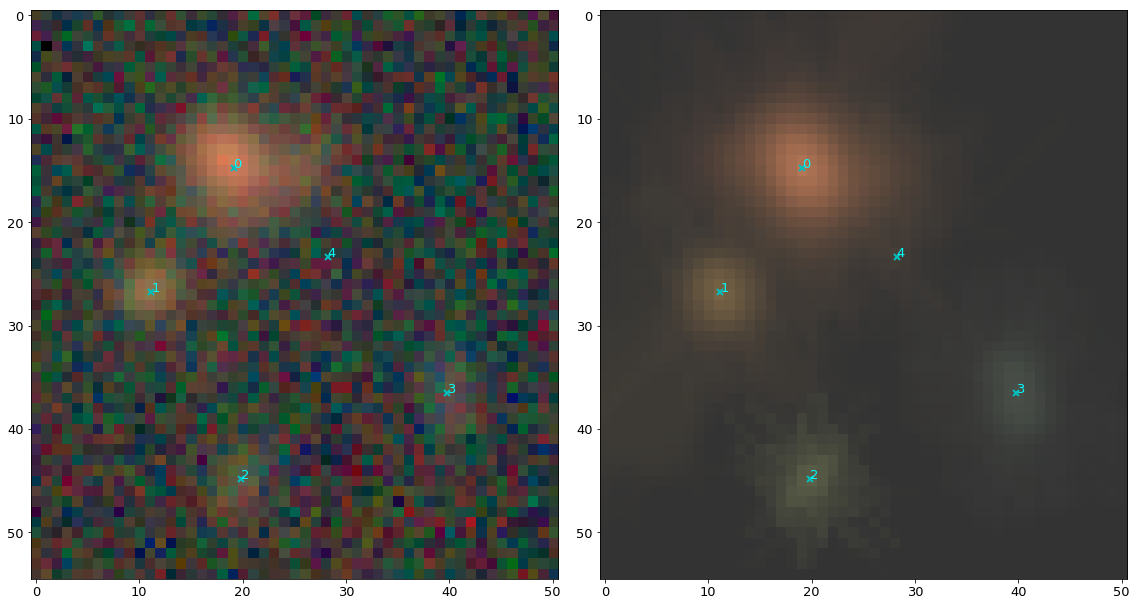

43158172147391152
vmin: -0.25534364581108093, vmax: 0.5677161967555844


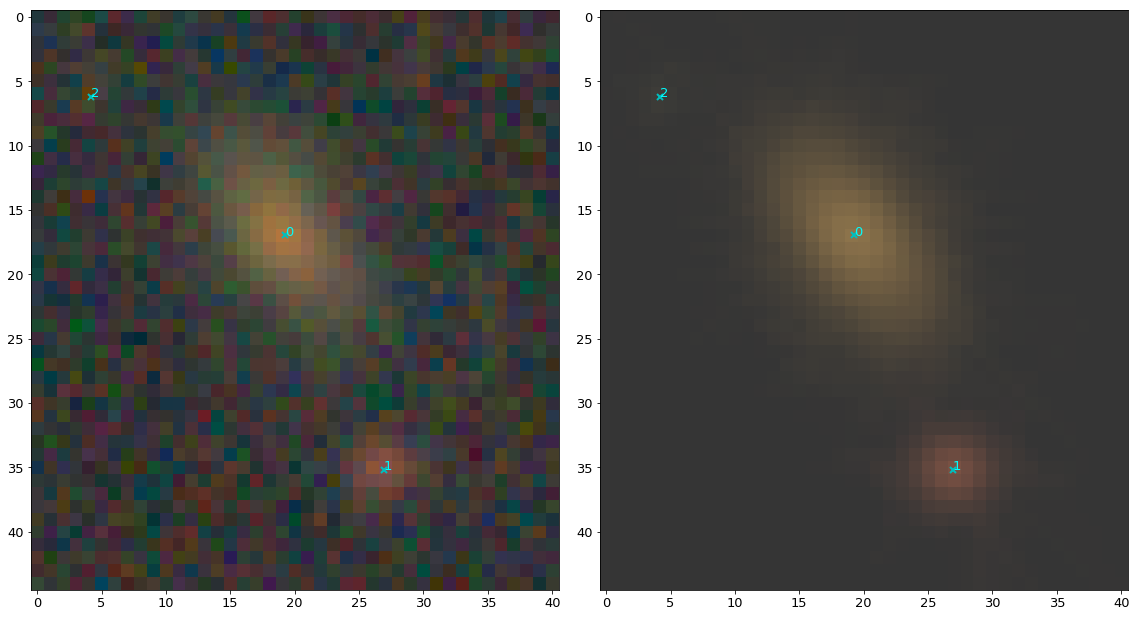

43158172147391268
vmin: -0.22519759833812714, vmax: 0.5041855033802315


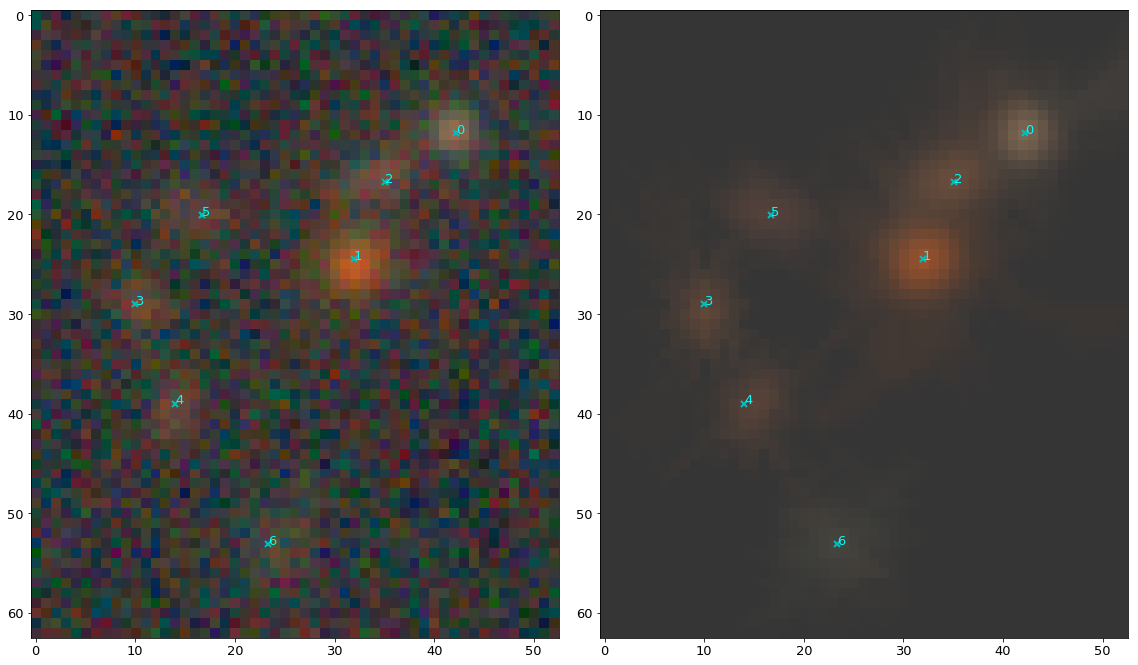

43158172147389440
vmin: -0.14586614072322845, vmax: 0.367257531200572


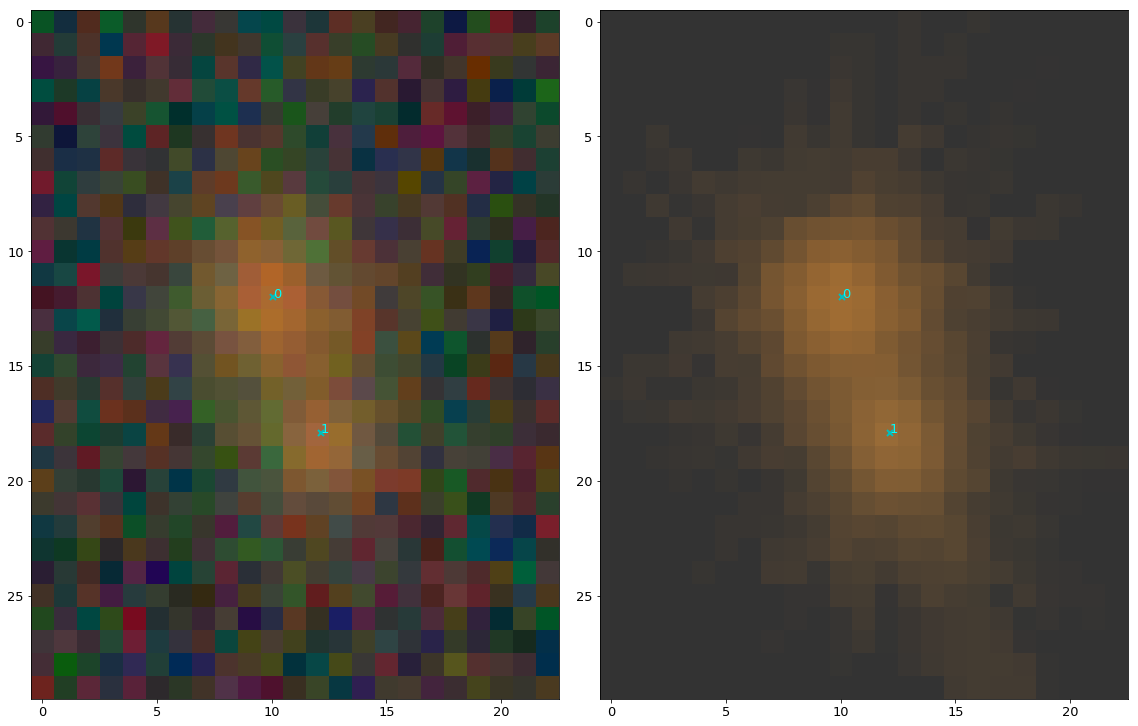

43158172147390278
vmin: -0.24323083460330963, vmax: 0.4907579720020294


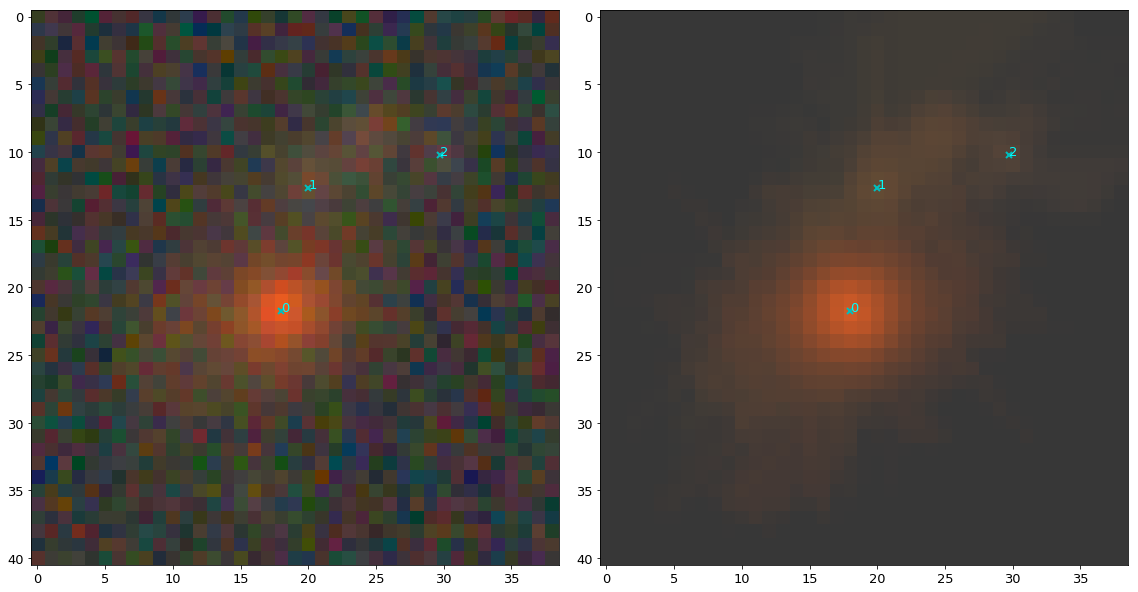

43158172147389690
vmin: -0.06136738508939743, vmax: 0.19807631894712216


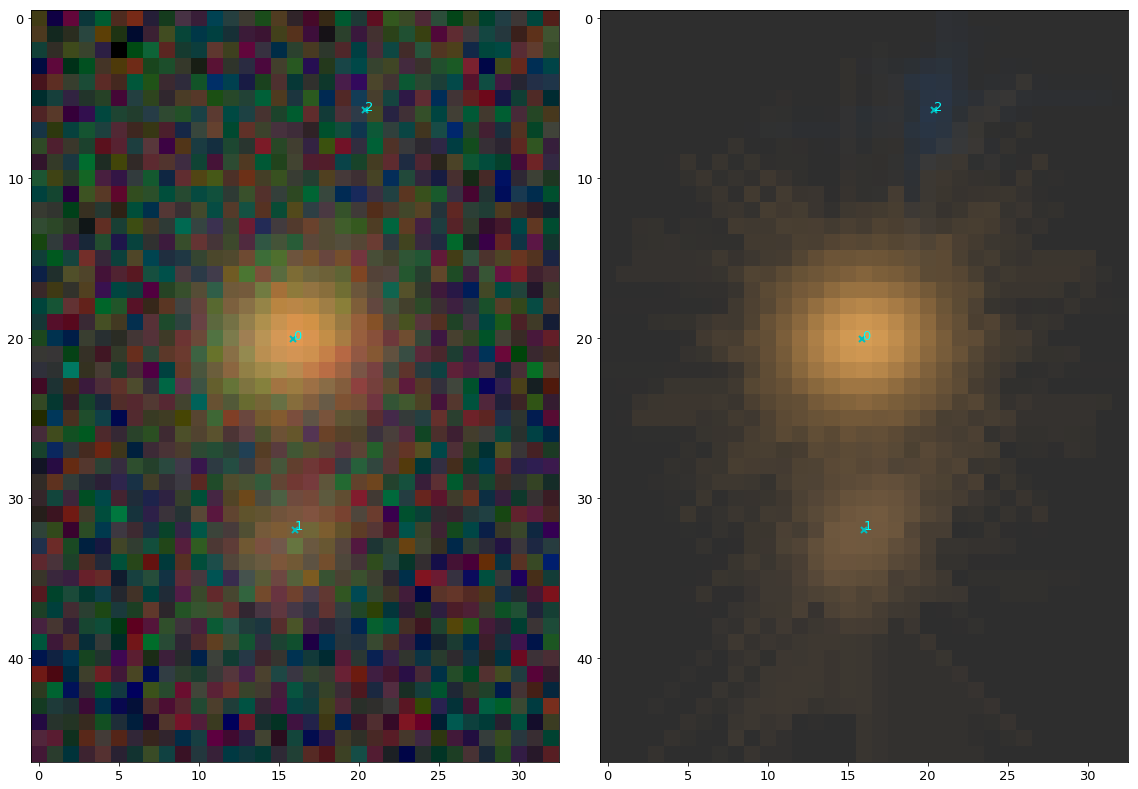

43158172147388676
vmin: -0.0781063362956047, vmax: 0.25523899438840636


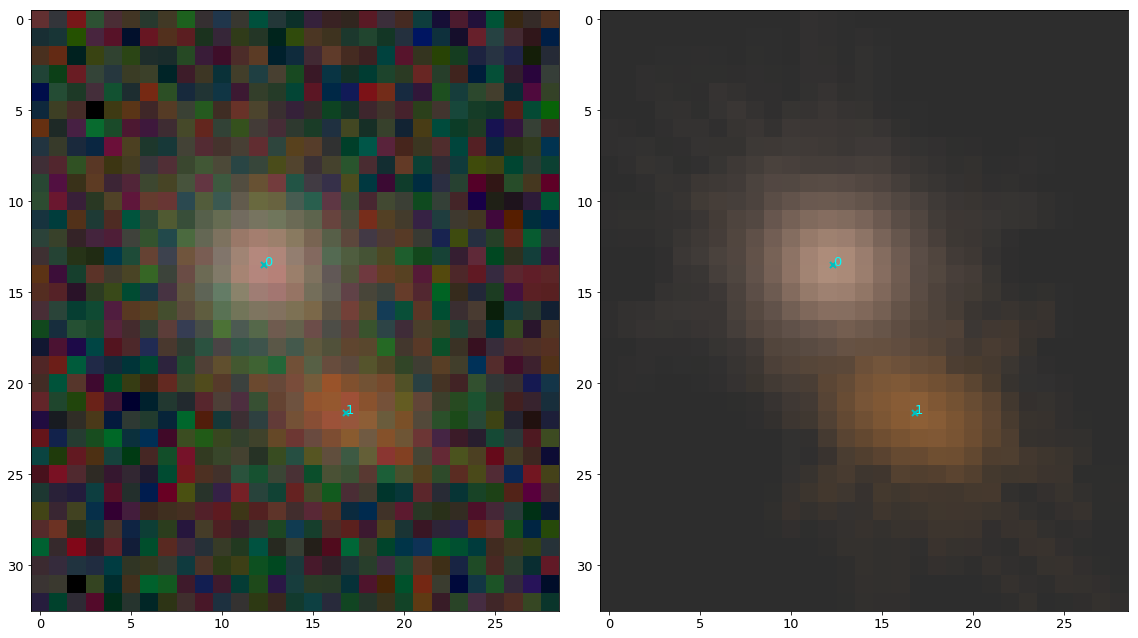

43158172147386668
vmin: -0.08515392243862152, vmax: 0.18768758301804248


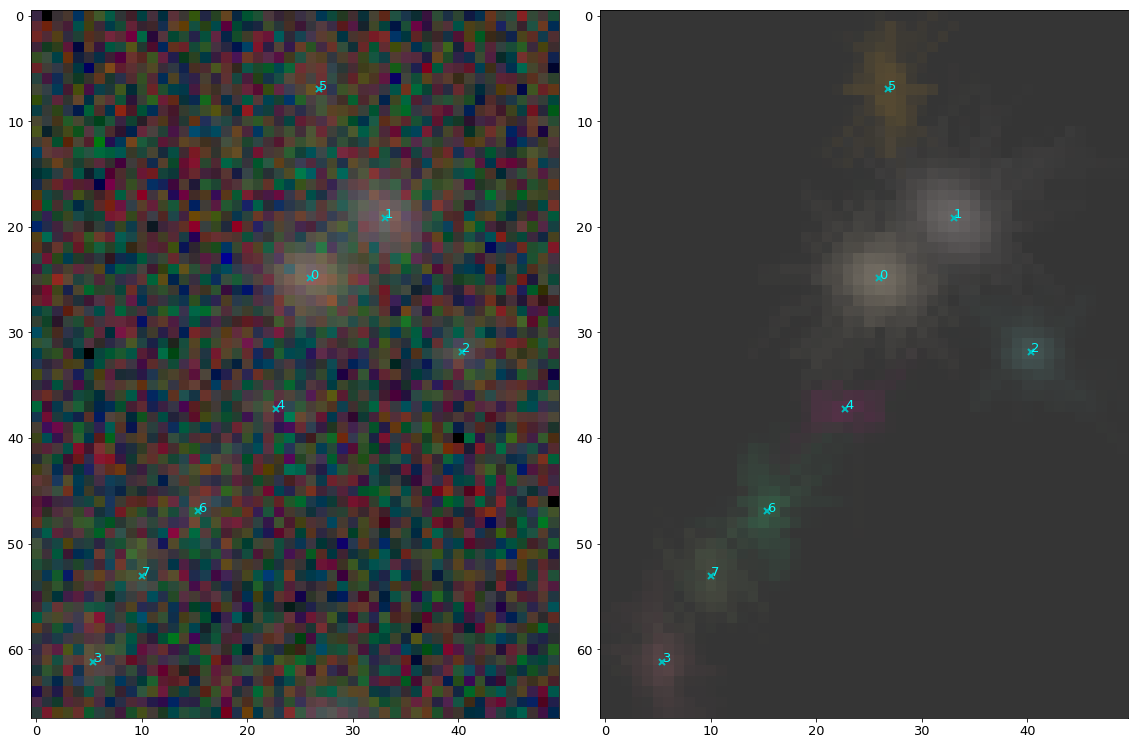

43158172147388084
vmin: -0.13762366771697998, vmax: 0.3363950757702901


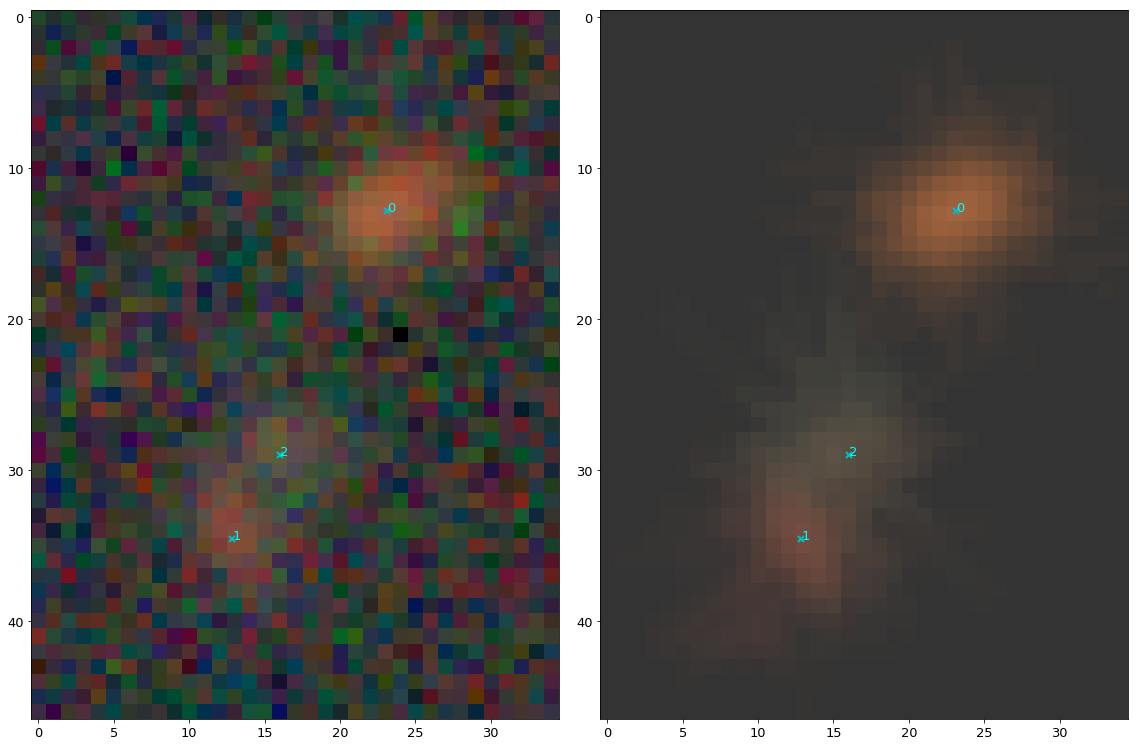

43158172147386142
vmin: -0.30720335245132446, vmax: 0.5197113996228426


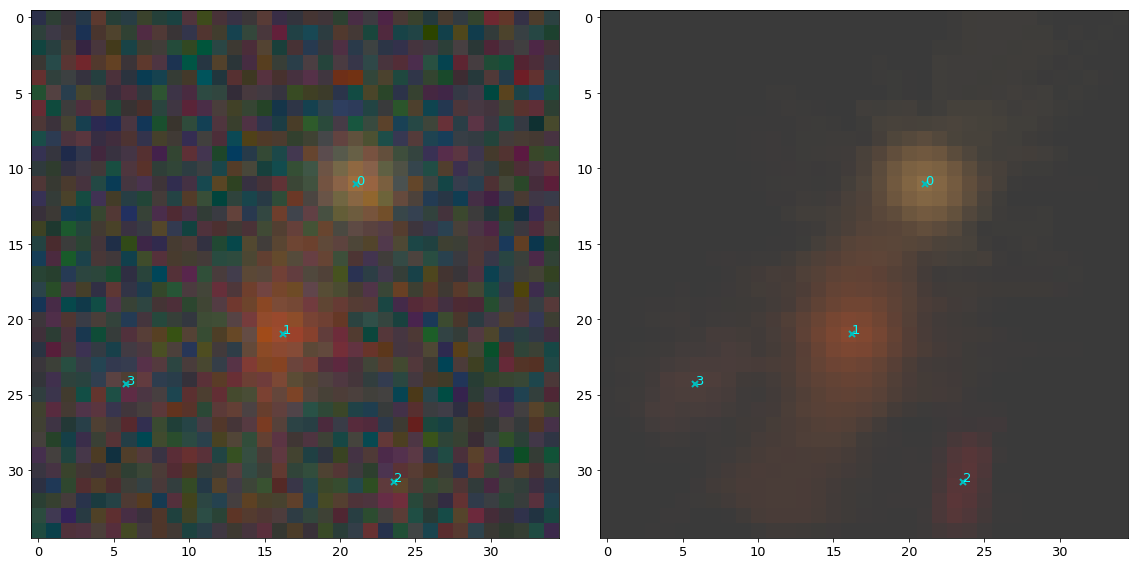

43158172147391709
vmin: -0.04505631700158119, vmax: 0.1694771206788488


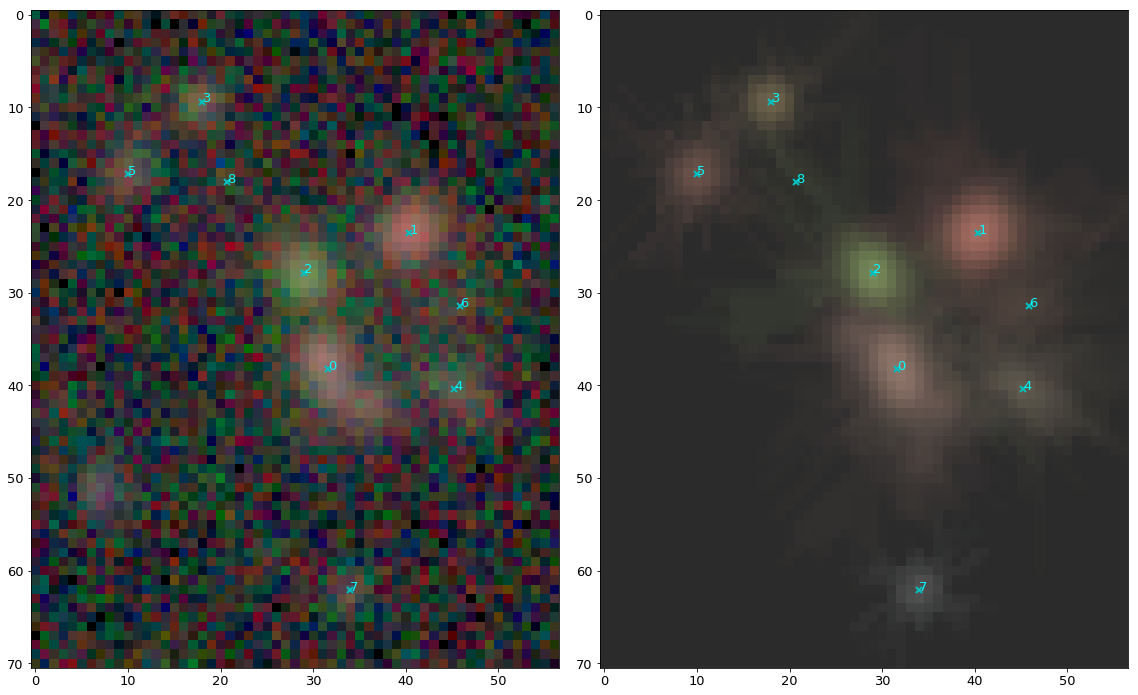

43158172147386516
vmin: -0.0771971121430397, vmax: 0.21380468381722204


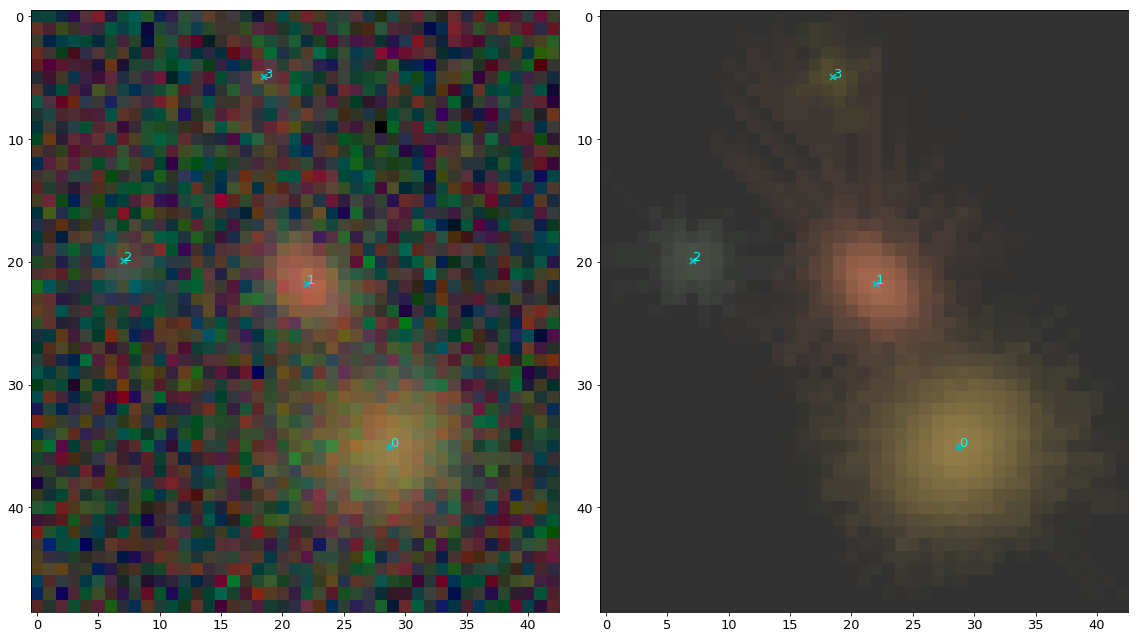

43158172147389094
vmin: -0.07277588546276093, vmax: 0.2326087056124527


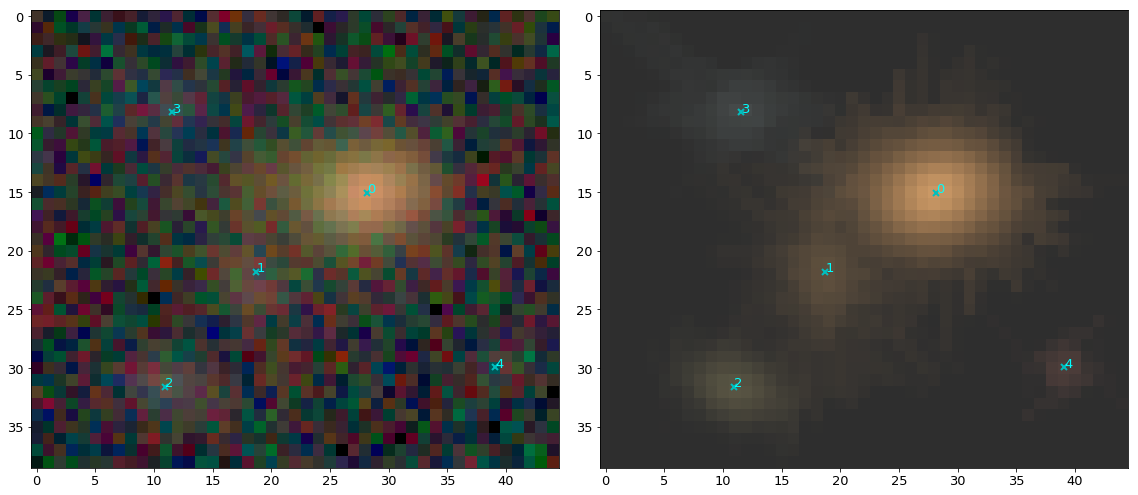

43158172147390805
vmin: -0.10673019289970398, vmax: 0.21001939849997403


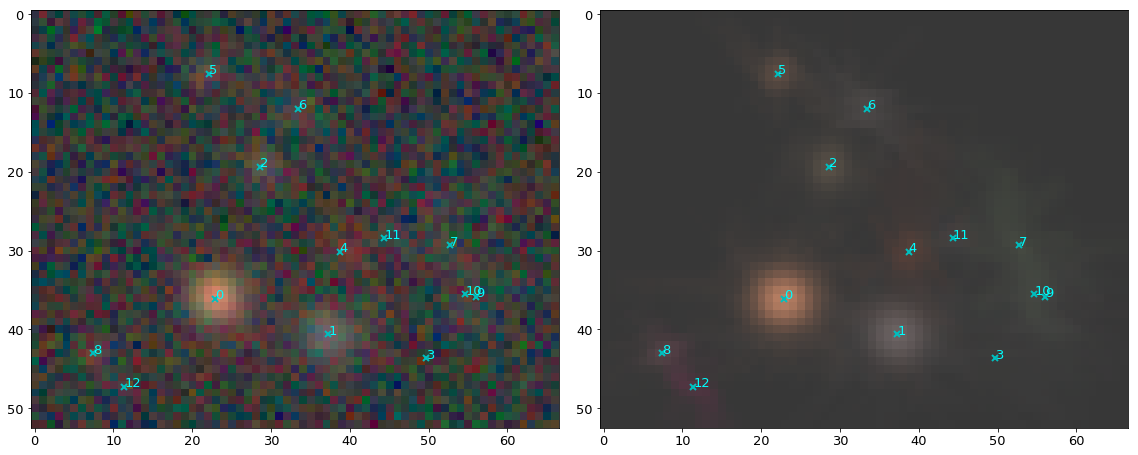

43158172147388127
vmin: -0.09937692433595657, vmax: 0.29426632024317767


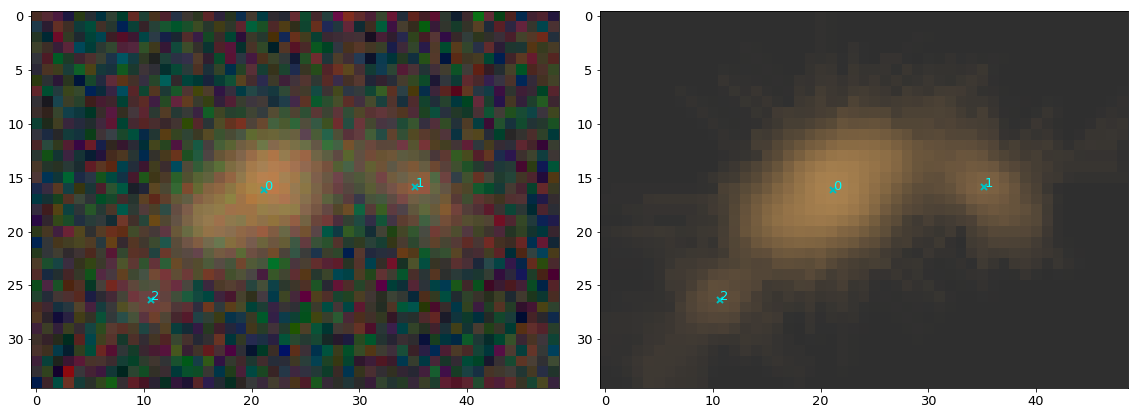

43158172147389123
vmin: -0.08661717921495438, vmax: 0.26300033750159063


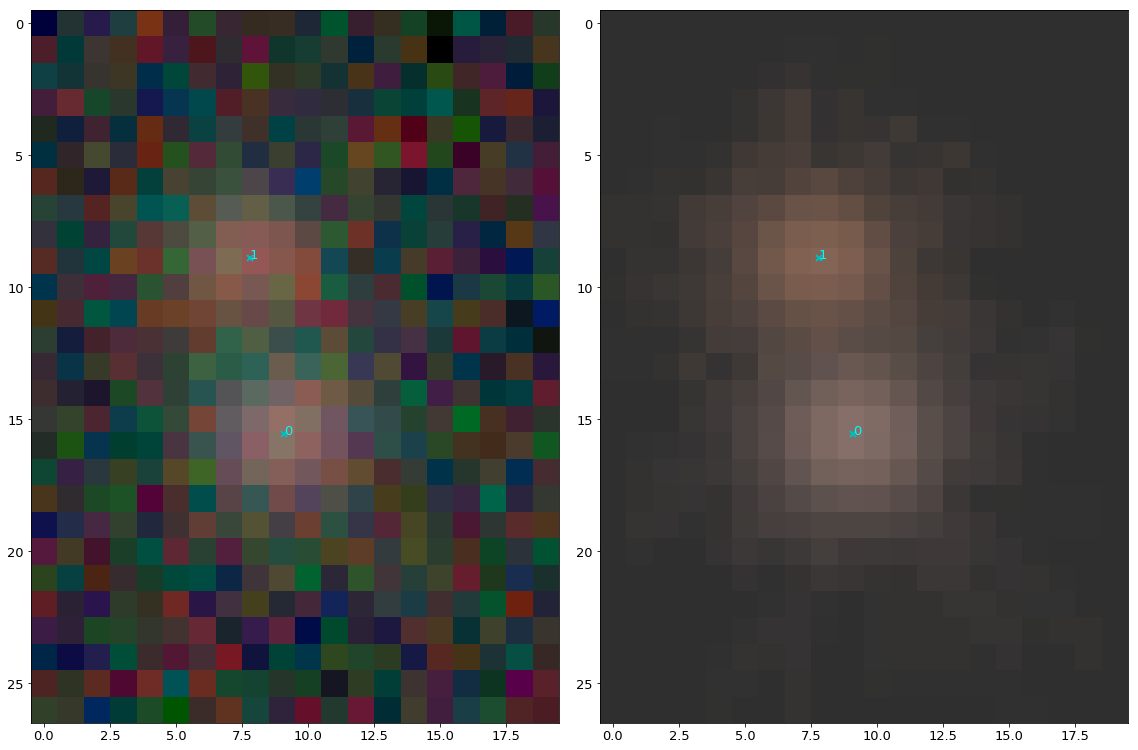

43158172147389649
vmin: -0.08109952509403229, vmax: 0.18551890368342866


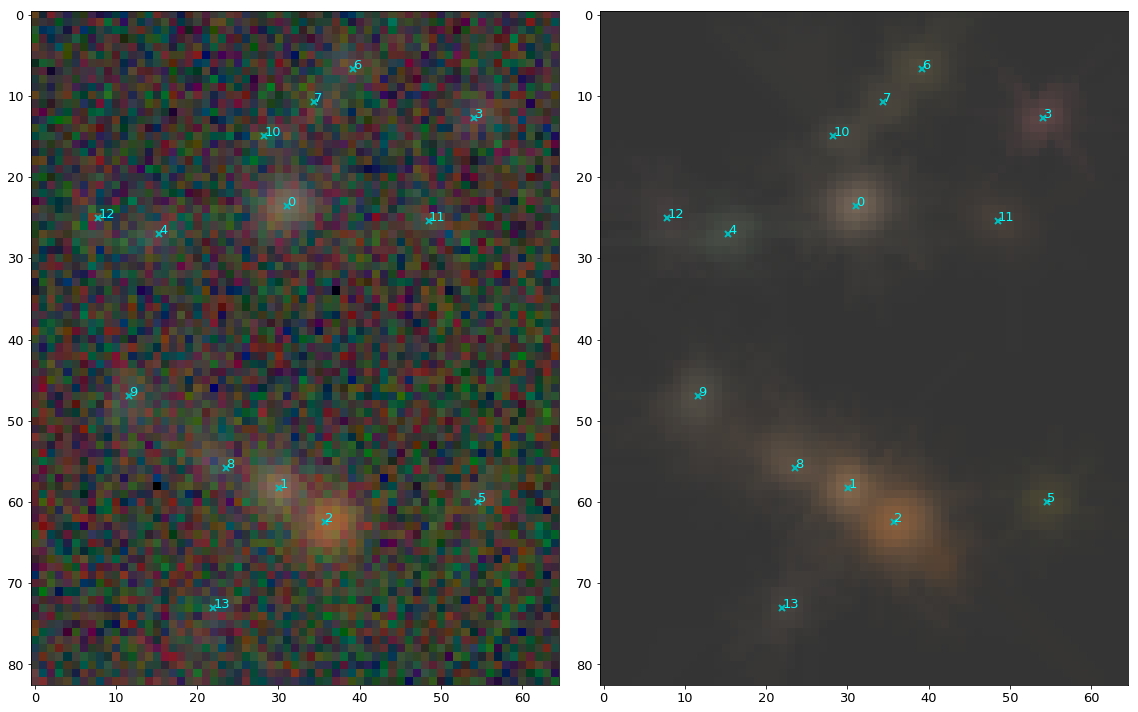

43158172147389253
vmin: -0.1982426941394806, vmax: 0.4619928002357483


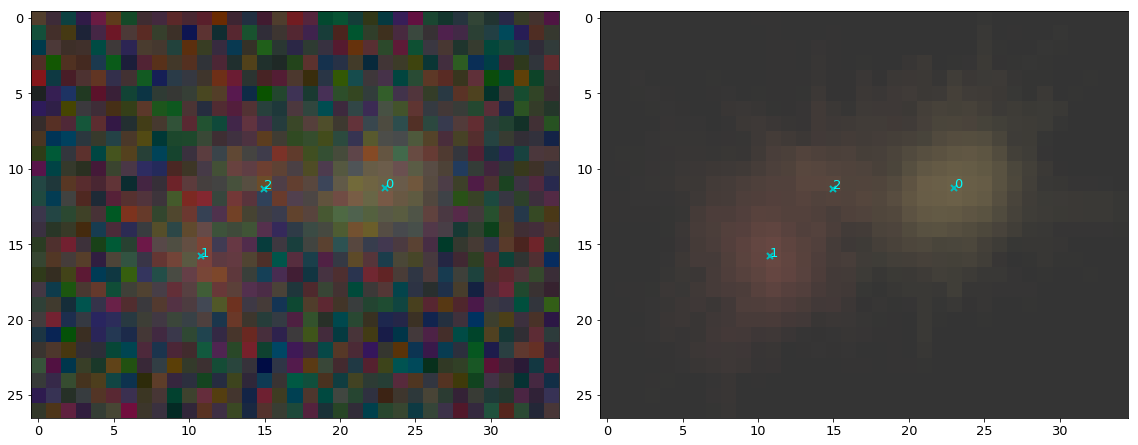

43158172147385094
vmin: -0.2742954194545746, vmax: 0.6754331173979705


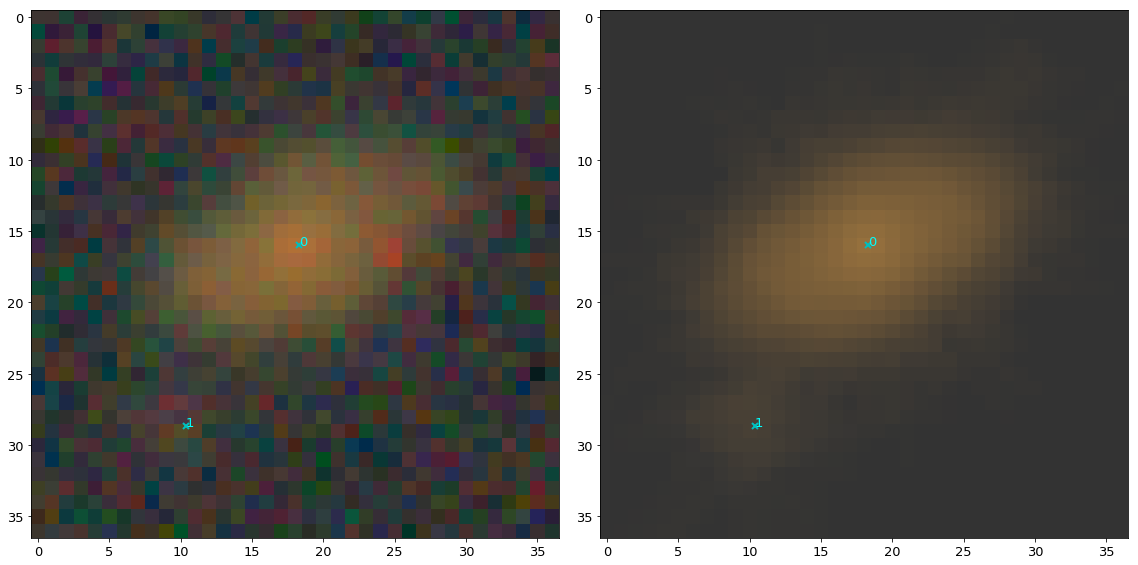

43158172147384648
vmin: -0.23287838697433472, vmax: 0.5215569519030434


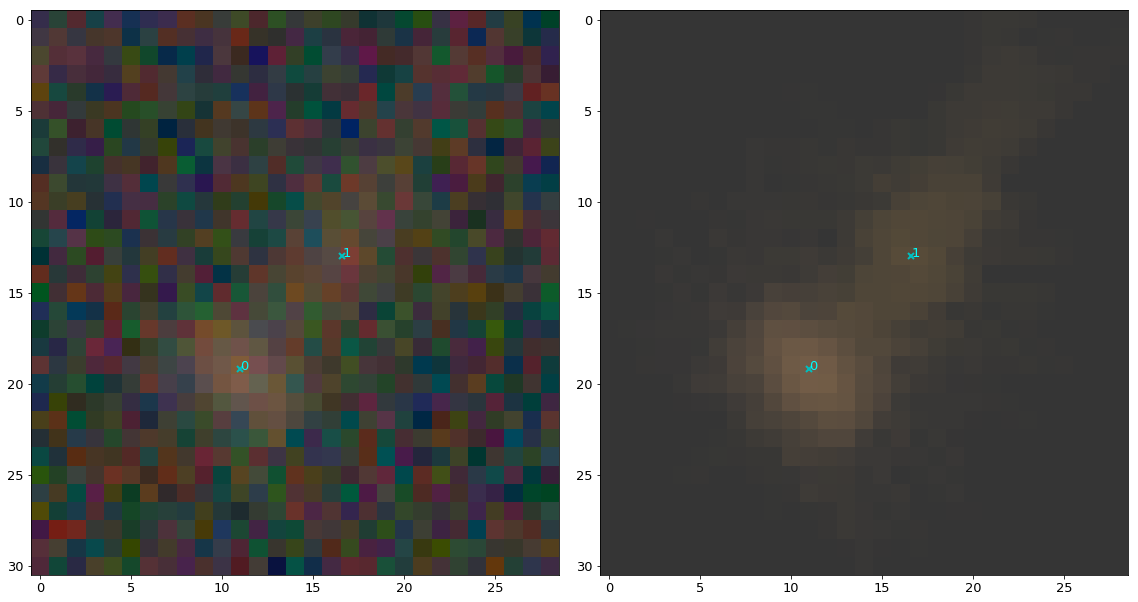

43158172147388630
vmin: -0.08390820771455765, vmax: 0.2380365841454631


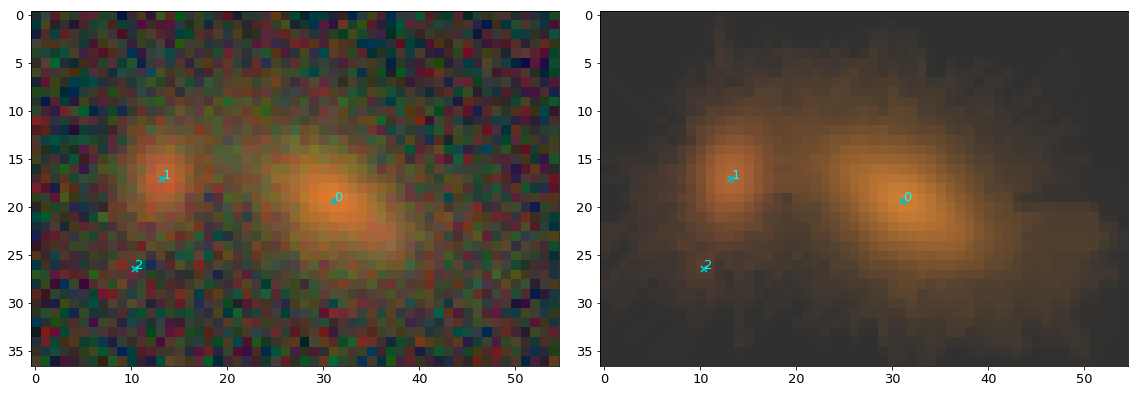

43158172147385878
vmin: -0.2070332020521164, vmax: 0.41912806034088135


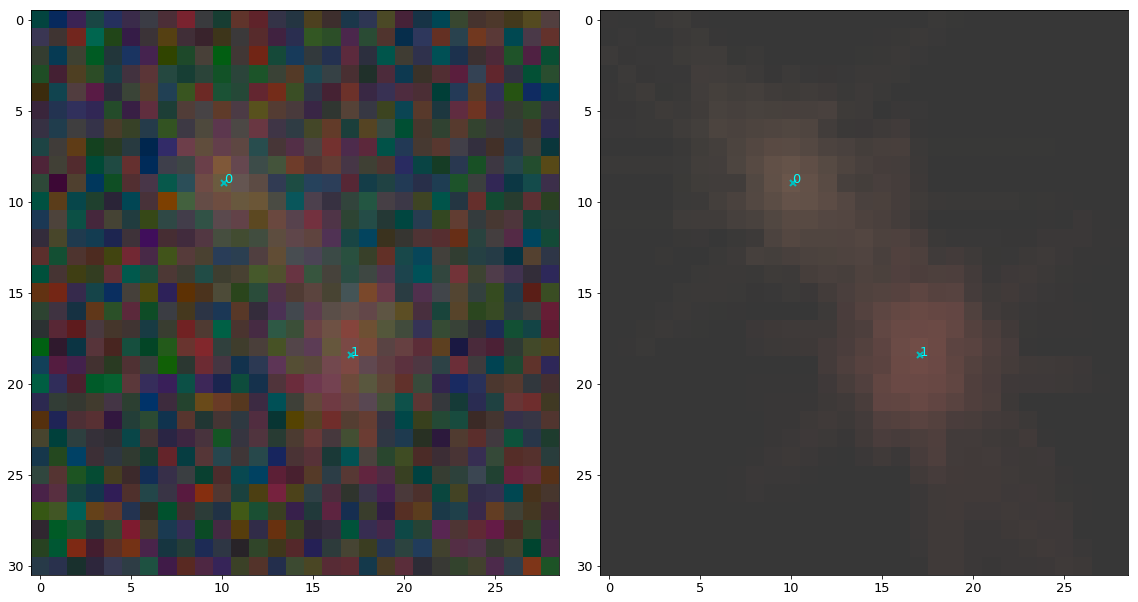

43158172147389782
vmin: -0.08504723012447357, vmax: 0.23429162258328268


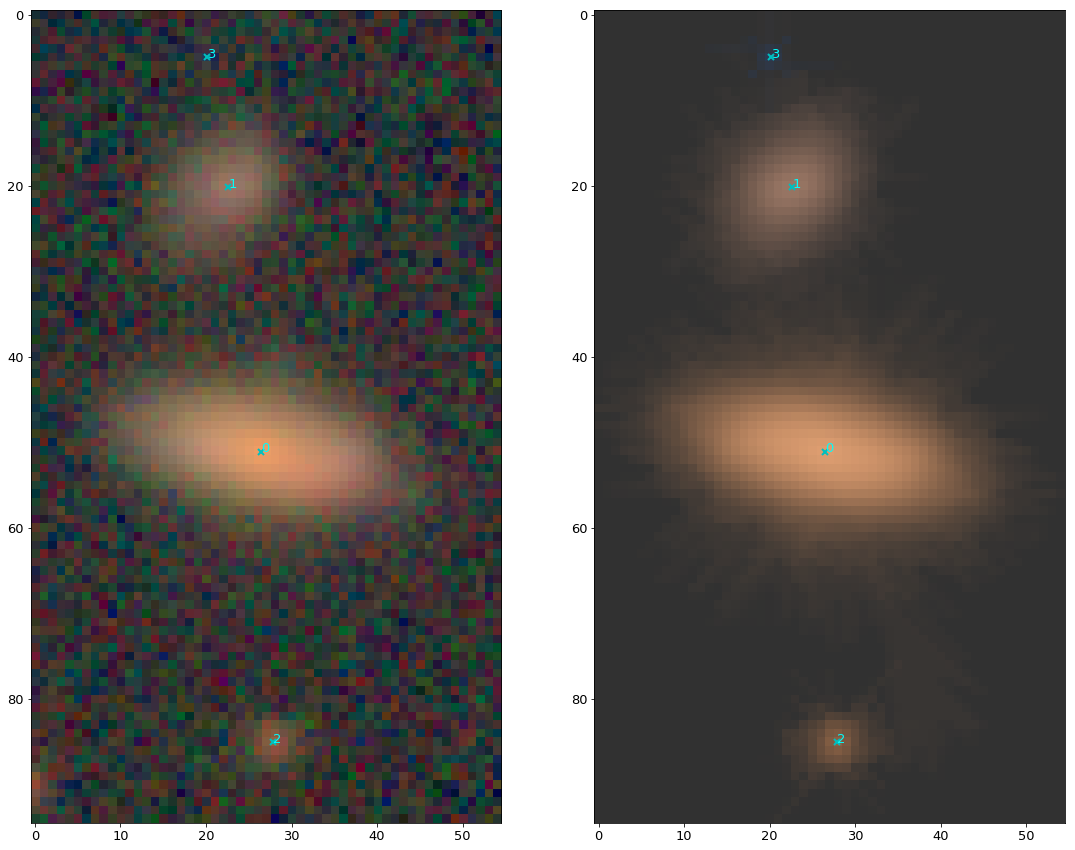

43158172147388448
vmin: -0.21602831780910492, vmax: 0.5883694947183409


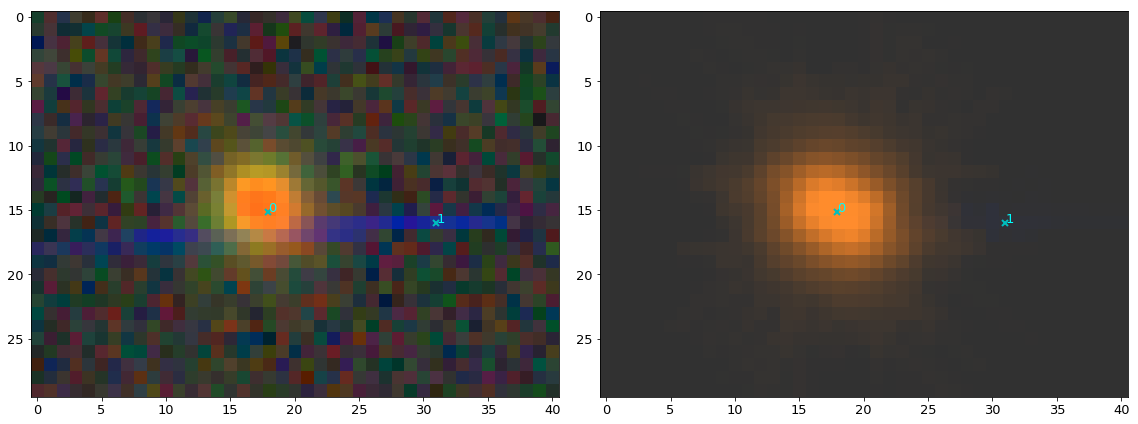

43158172147391480
vmin: -0.3053331971168518, vmax: 0.557496758485023


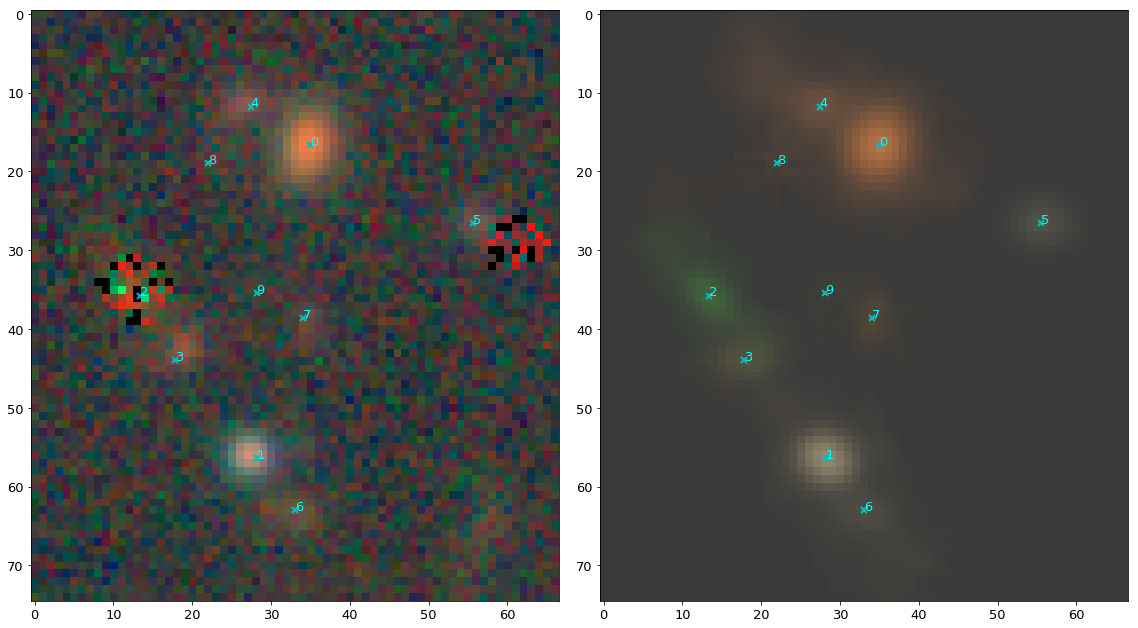

43158172147388270
vmin: -0.25471481680870056, vmax: 0.43391463636419314


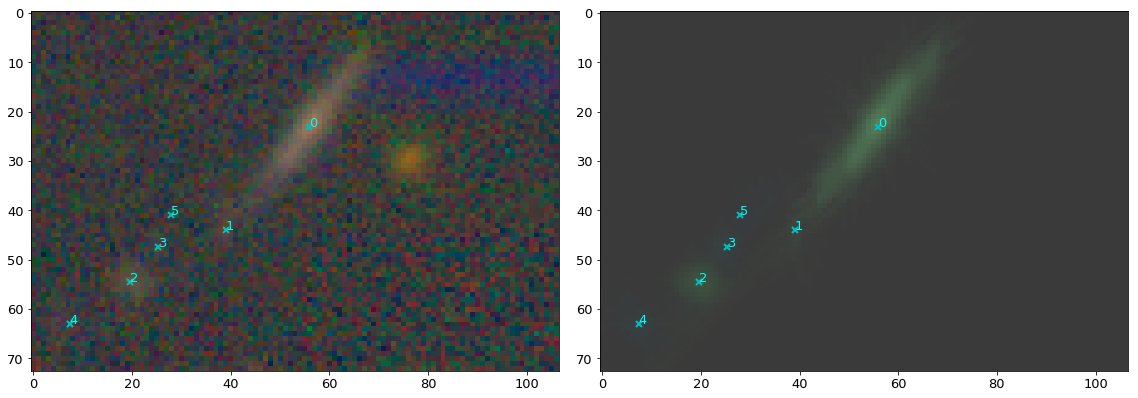

43158172147389166
vmin: -0.529581182238505, vmax: 0.5631967825562216


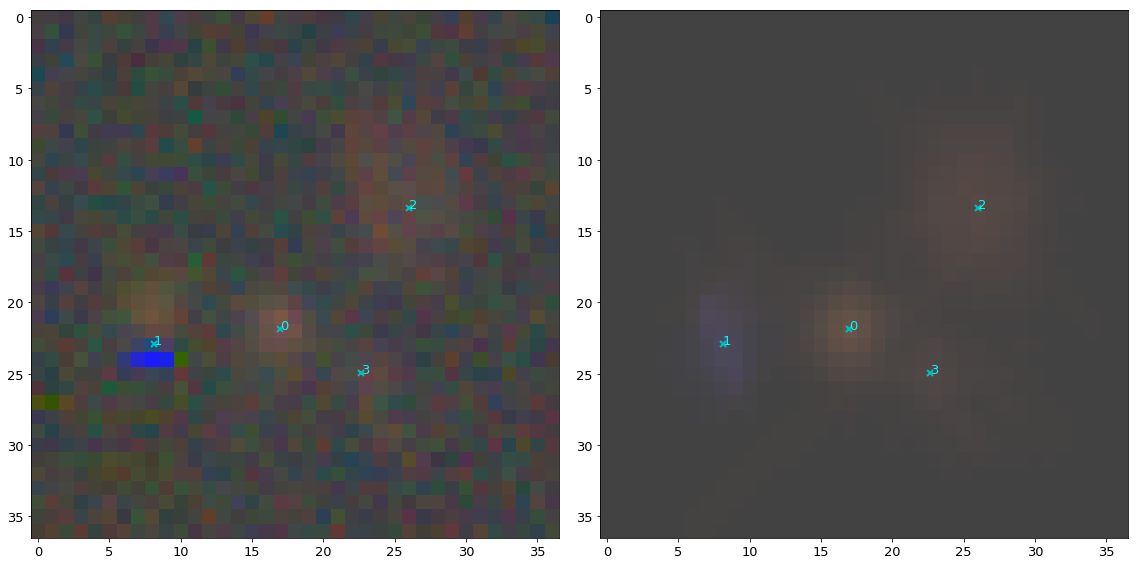

43158172147389744
vmin: -0.08724511414766312, vmax: 0.2516019938294203


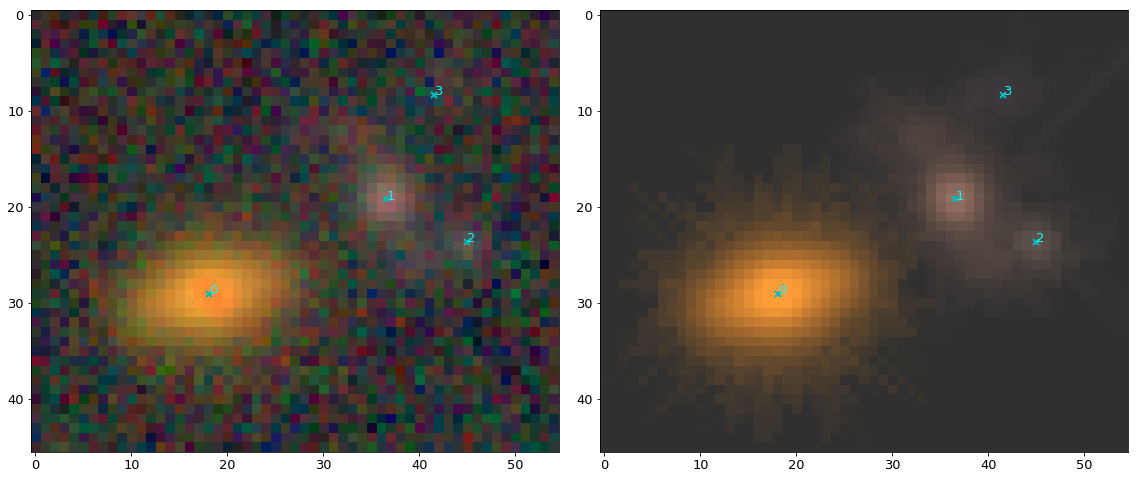

43158172147386129
vmin: -0.21644000709056854, vmax: 0.5811597649355255


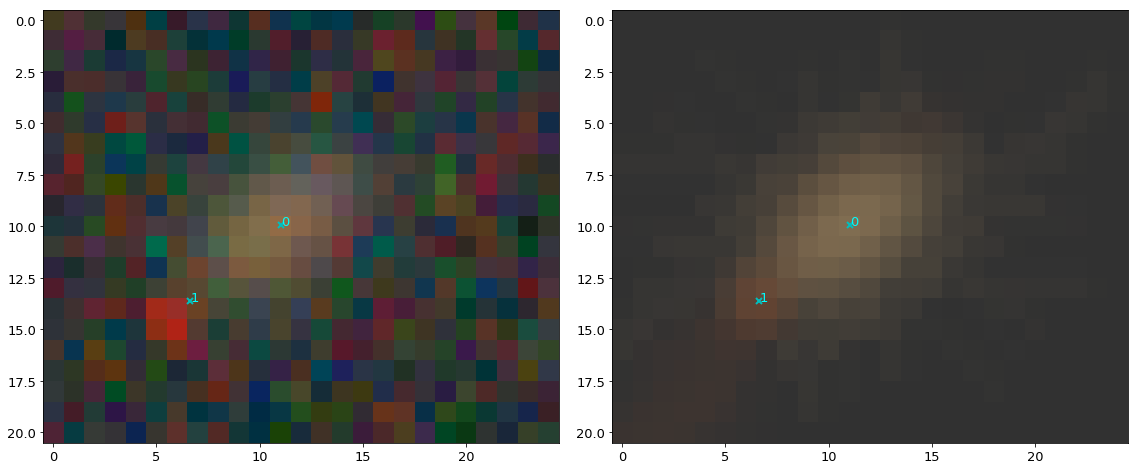

43158172147384792
vmin: -0.24164992570877075, vmax: 0.5552786631464033


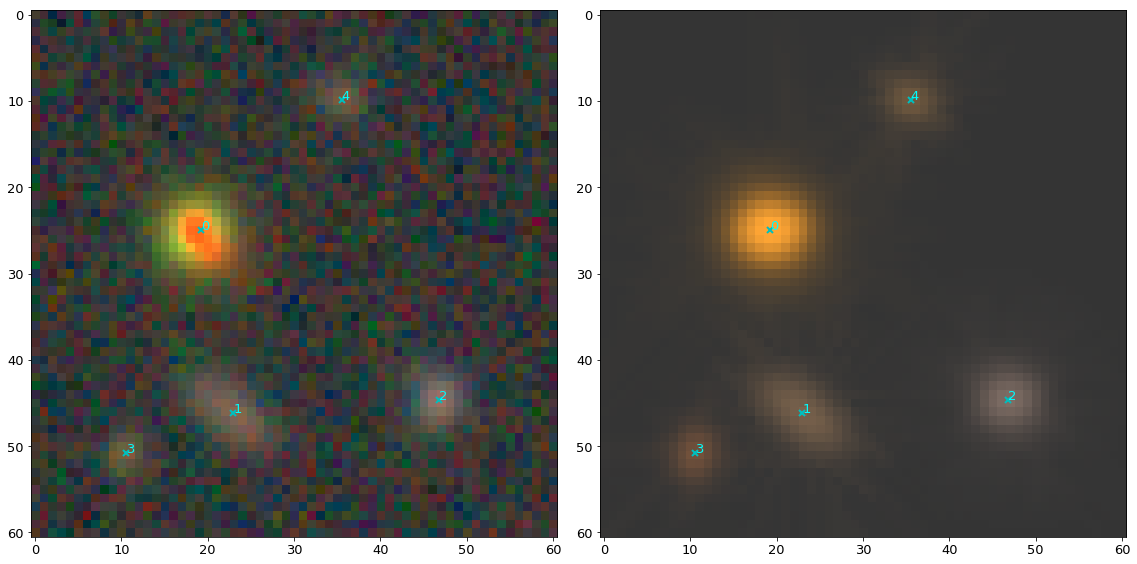

43158172147390151
vmin: -0.29105111956596375, vmax: 0.4632172014553458


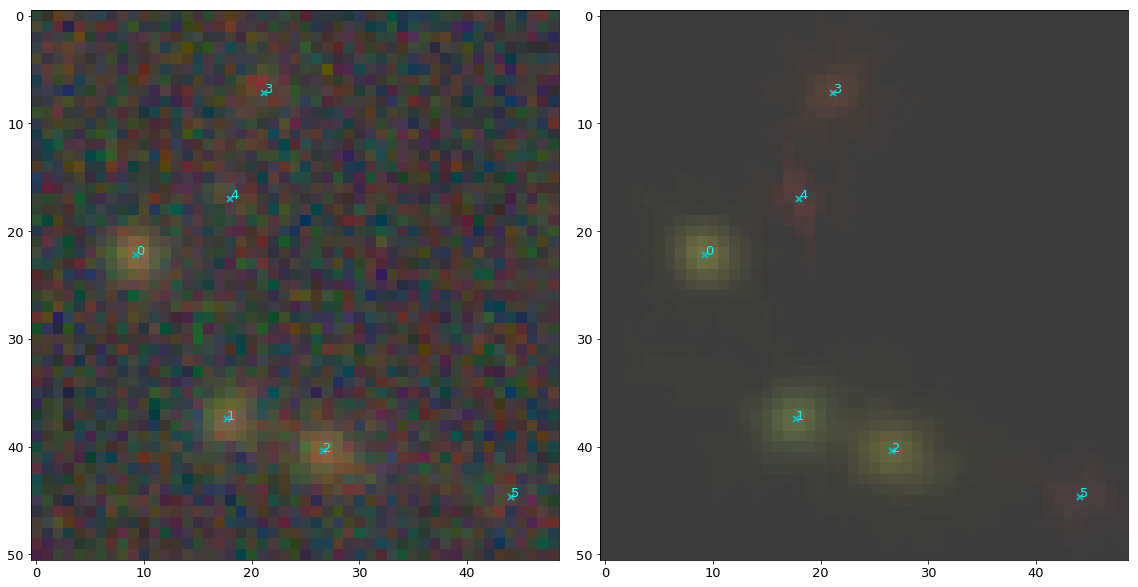

43158172147387018
vmin: -0.1030052900314331, vmax: 0.20262274546881387


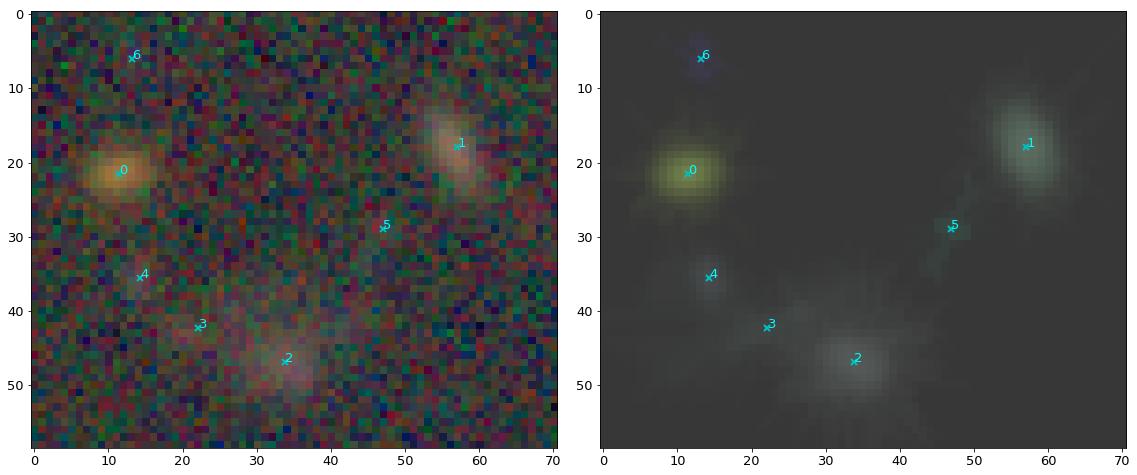

43158172147389473
vmin: -0.24286721646785736, vmax: 0.570328918902411


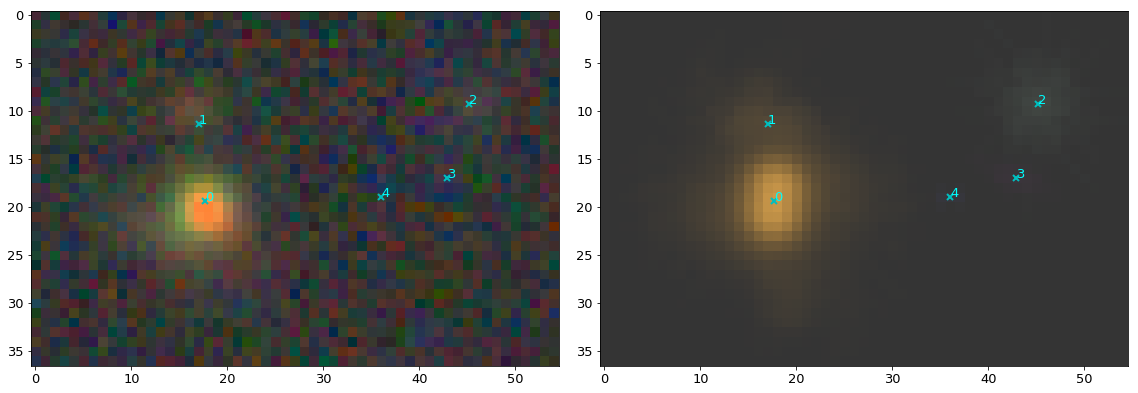

43158172147388607
vmin: -0.08387293666601181, vmax: 0.21175669847517342


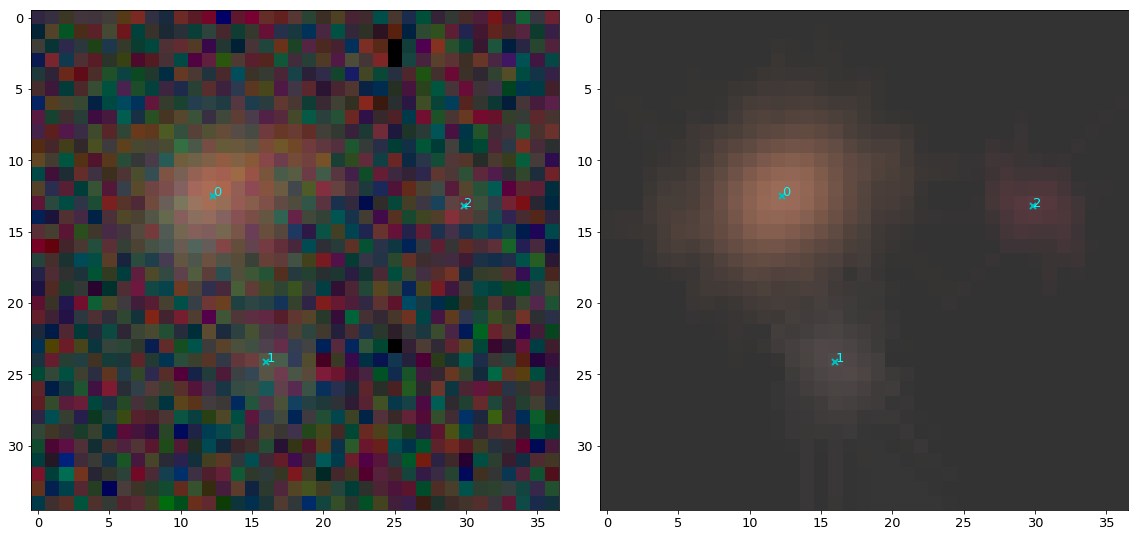

43158172147386108
vmin: -0.2564036250114441, vmax: 0.4160774052143097


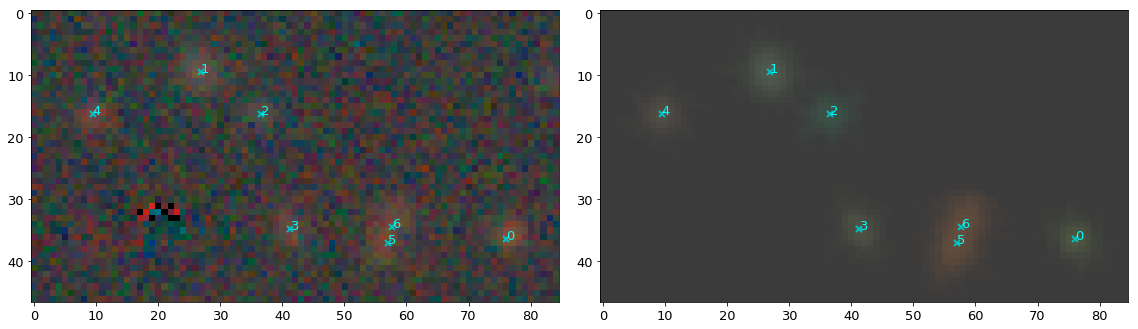

43158172147391164
vmin: -0.08725456893444061, vmax: 0.24022721504345557


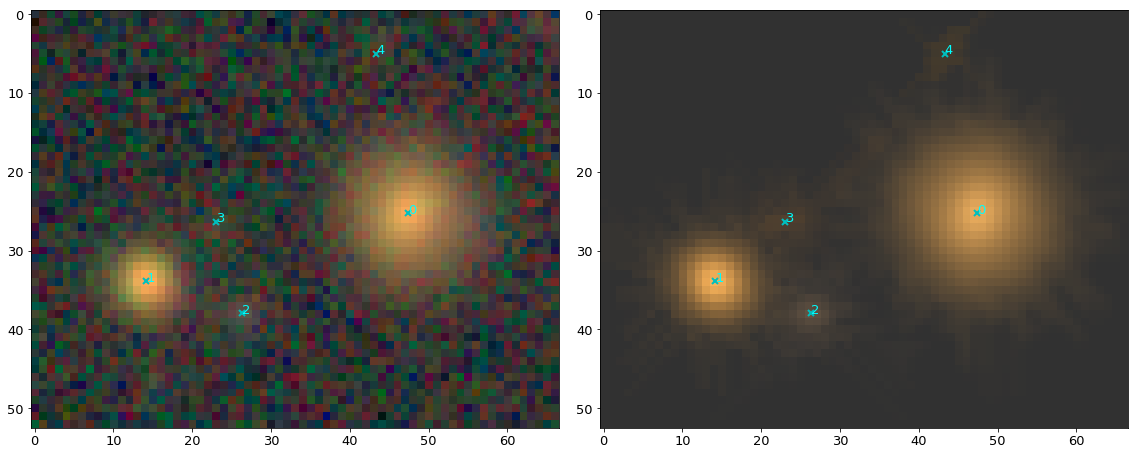

43158172147390010
vmin: -0.08317144960165024, vmax: 0.20117160759403696


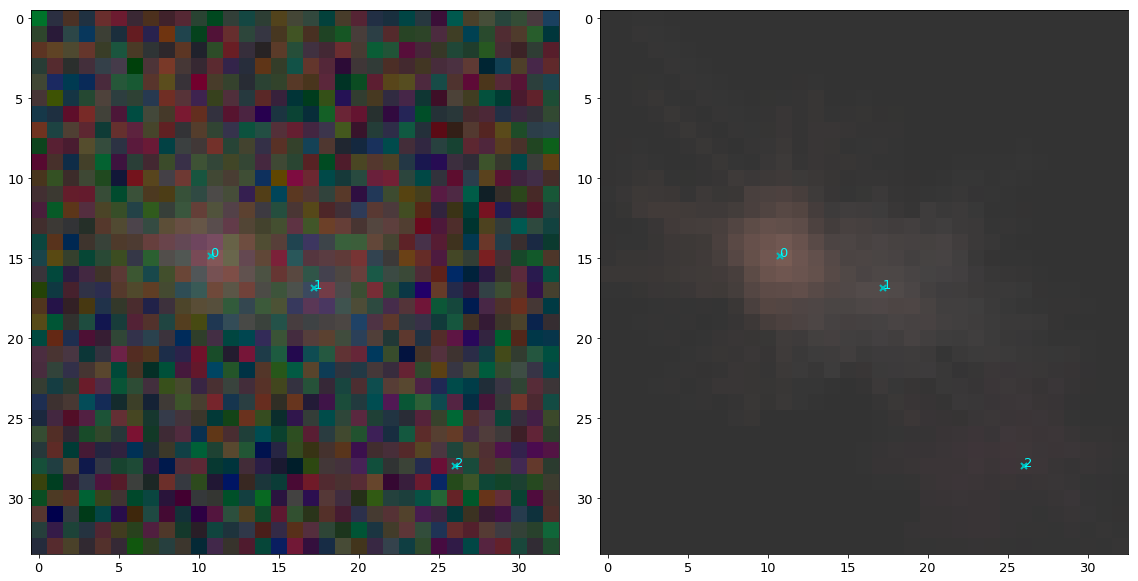

43158172147386634
vmin: -0.16806888580322266, vmax: 0.37042734026908875


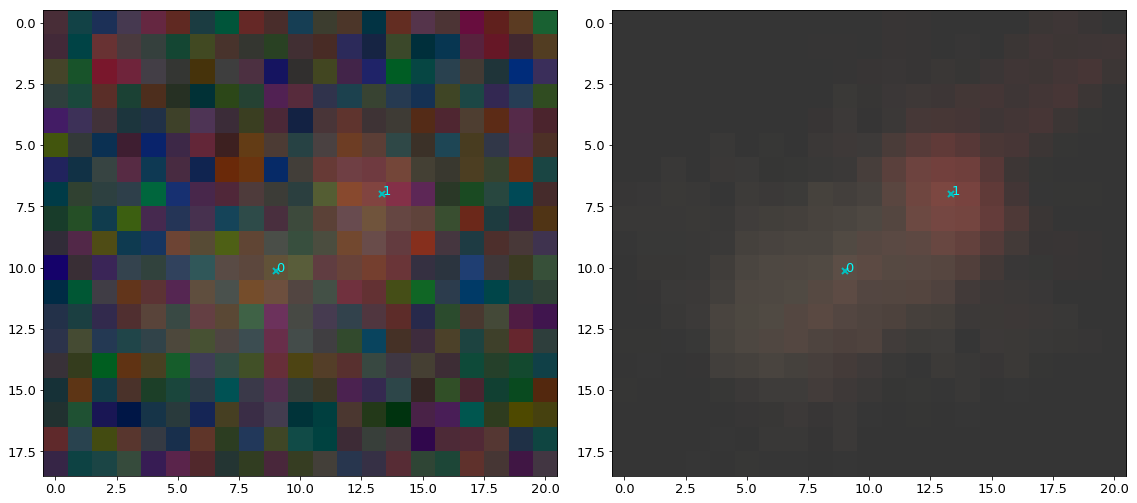

43158172147385915
vmin: -0.289845734834671, vmax: 0.530923046608936


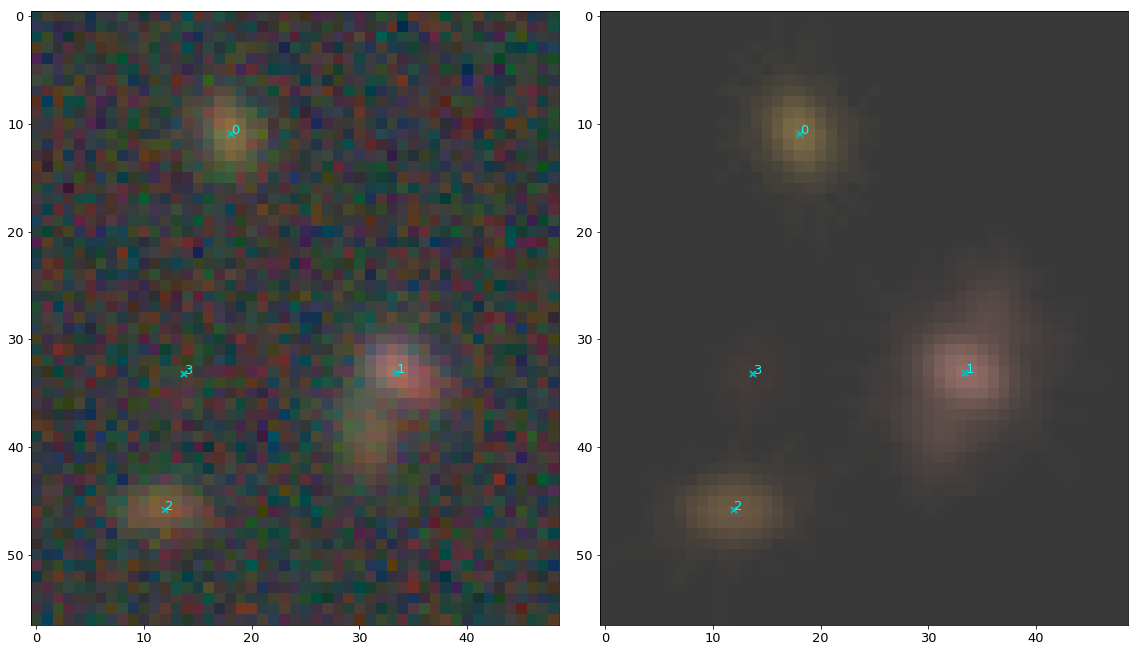

43158172147390145
vmin: -0.06807252764701843, vmax: 0.17196868121495335


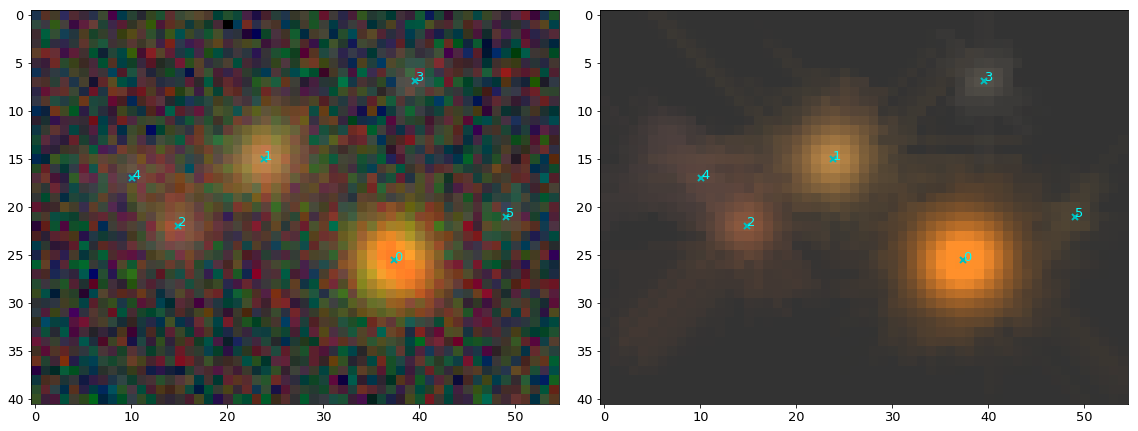

43158172147389892
vmin: -0.05541520193219185, vmax: 0.18658341154929187


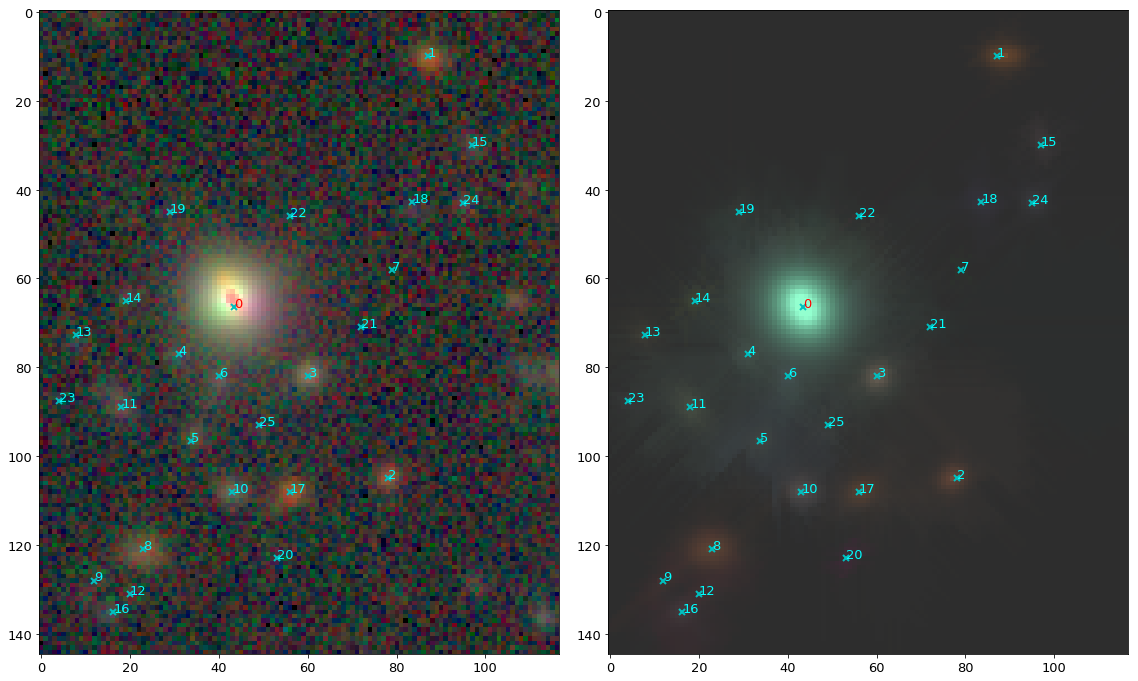

43158172147388439
vmin: -0.3457581102848053, vmax: 0.5252140828471089


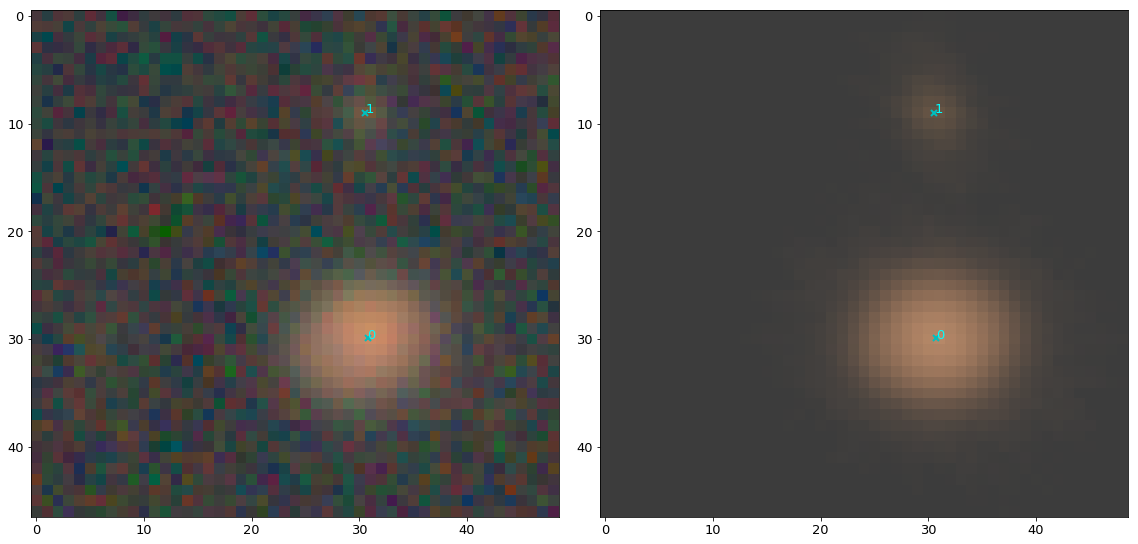

43158172147391429
vmin: -0.07617010921239853, vmax: 0.26583509429415525


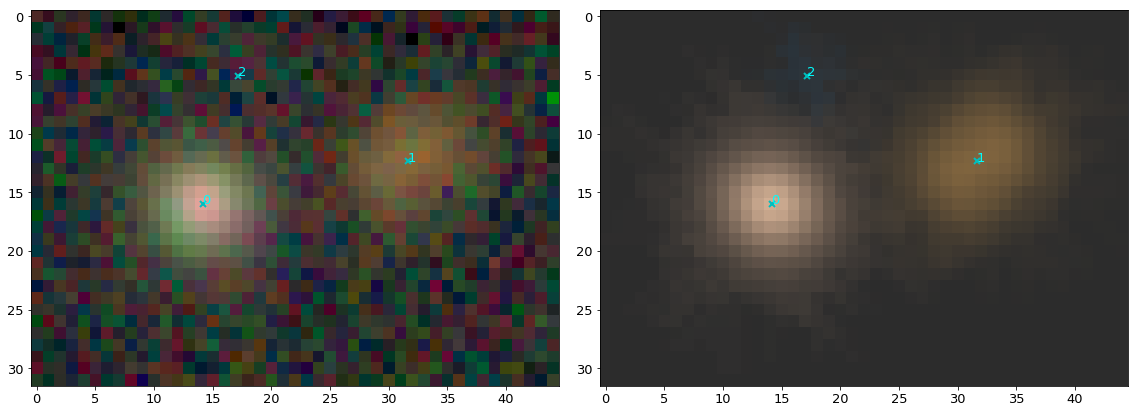

43158172147388272
vmin: -0.08754203468561172, vmax: 0.22166539387944925


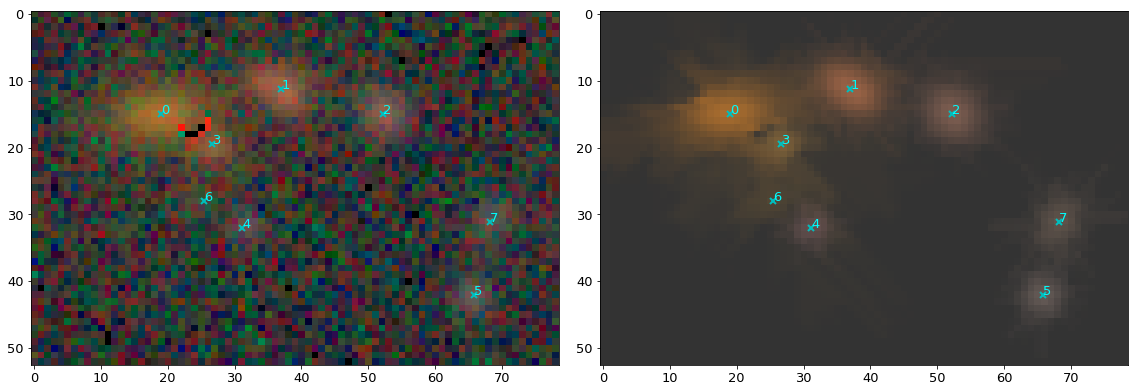

43158172147388603
vmin: -0.08159362524747849, vmax: 0.1950786005260716


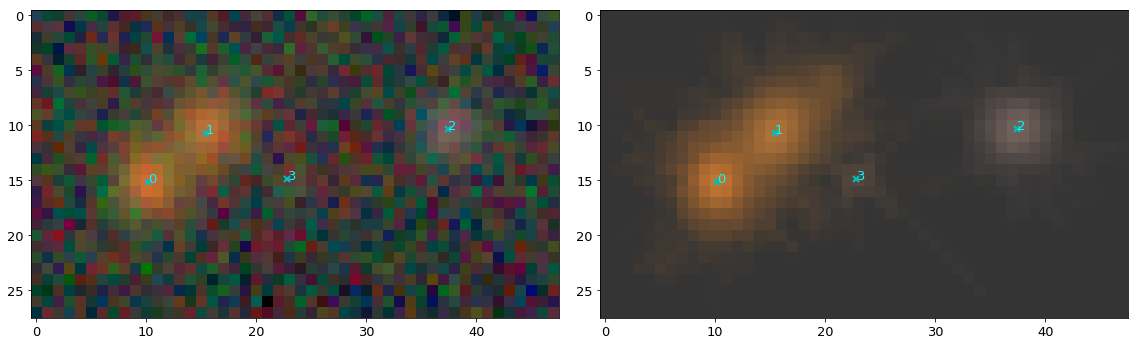

43158172147386766
vmin: -0.09045013785362244, vmax: 0.20557343065457873


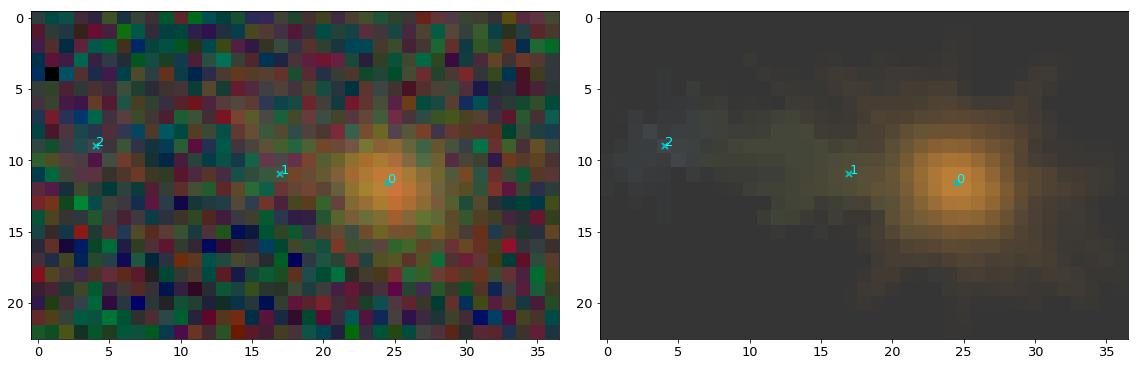

43158172147391055
vmin: -0.1314142942428589, vmax: 0.29708907679236773


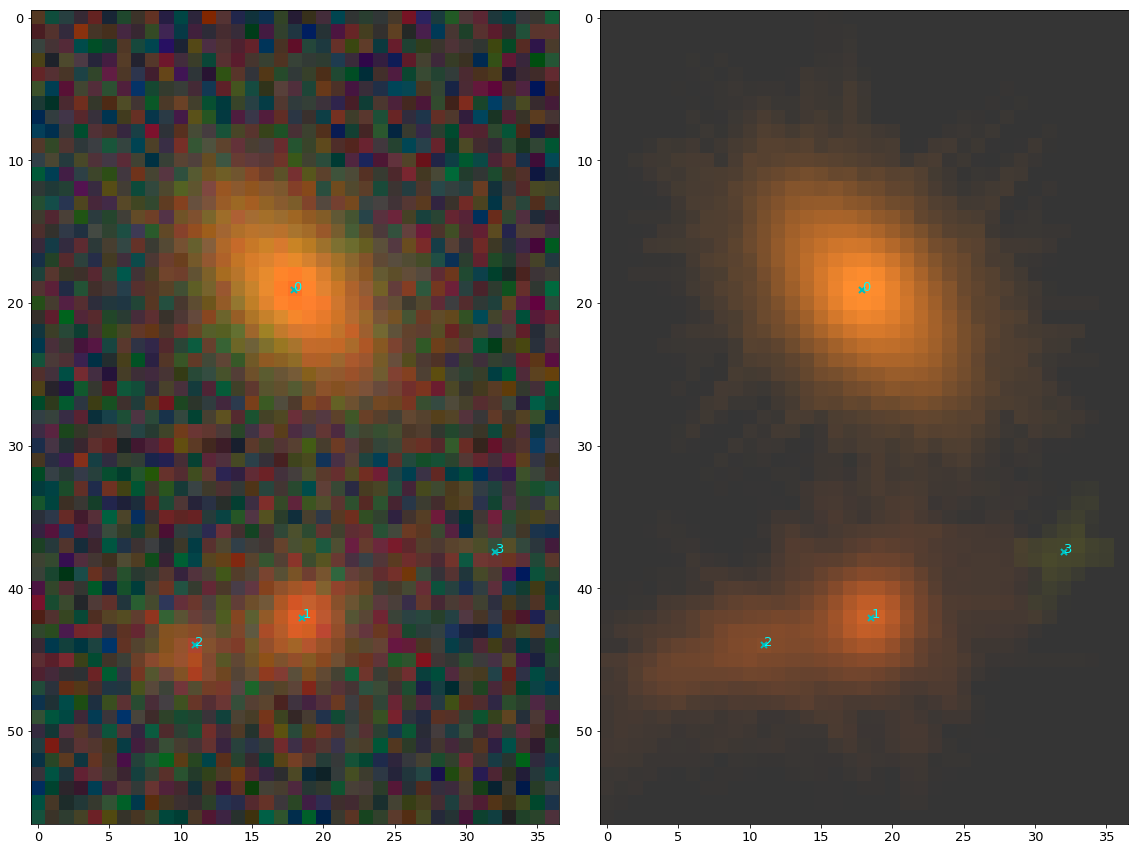

43158172147391193
vmin: -0.2105851173400879, vmax: 0.5470352633593648


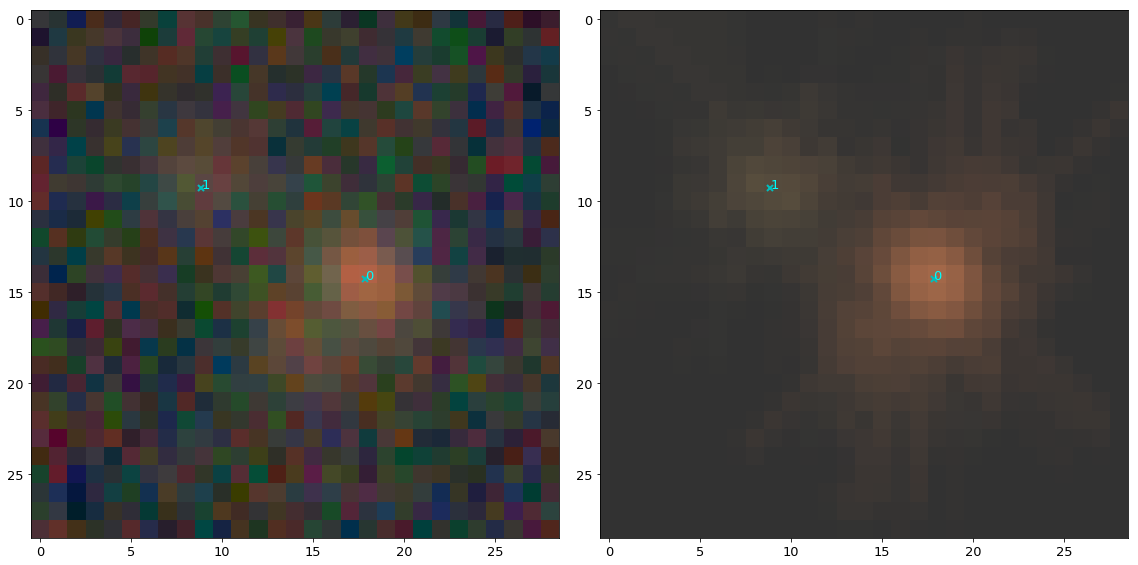

43158172147387753
vmin: -0.11386348307132721, vmax: 0.3686599756163717


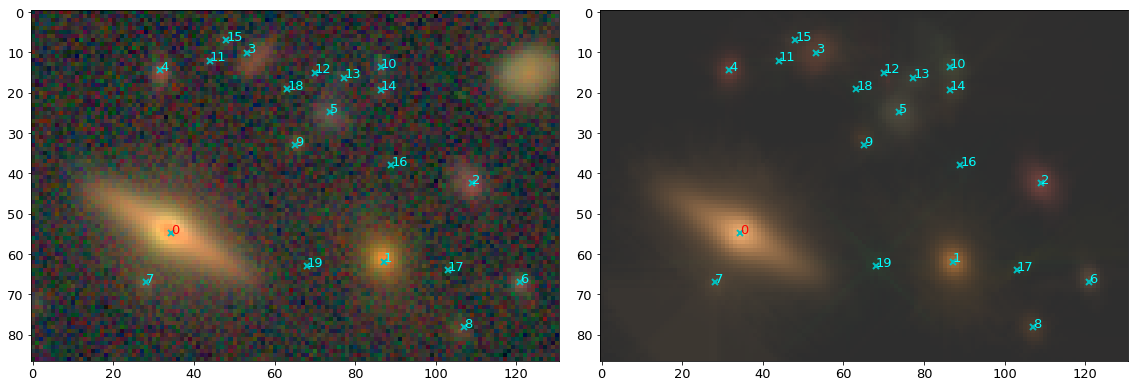

43158172147386845
vmin: -0.07842149585485458, vmax: 0.36521800027986484


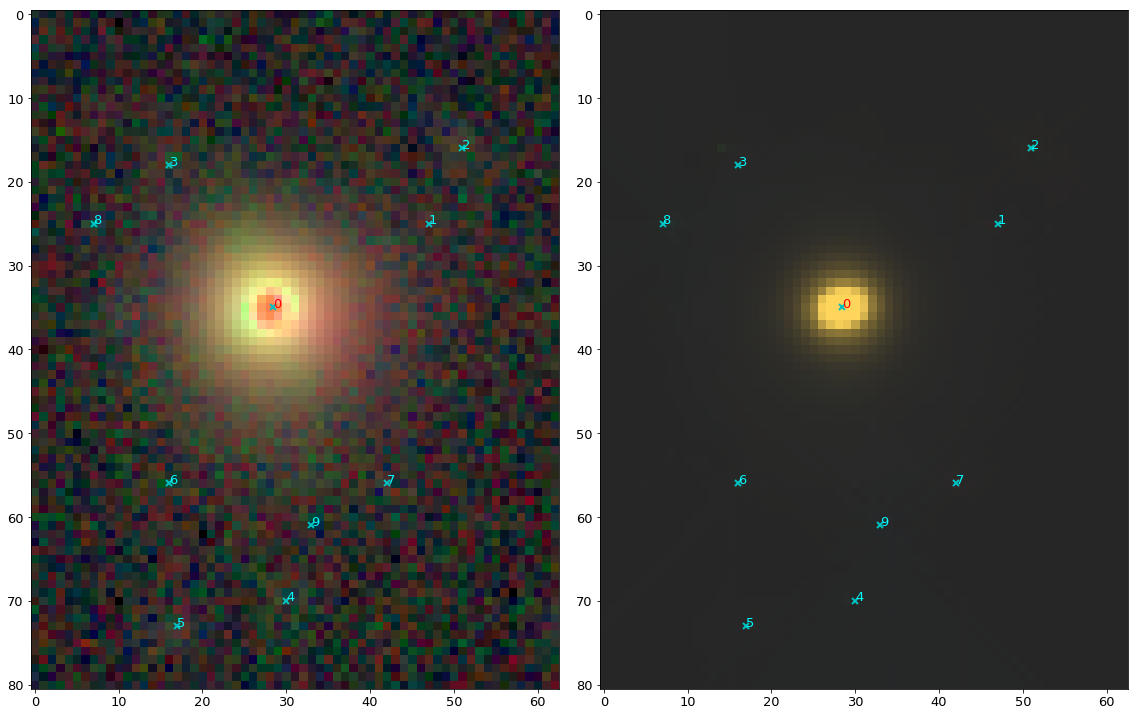

43158172147391269
vmin: -0.29928743839263916, vmax: 0.47790437936782837


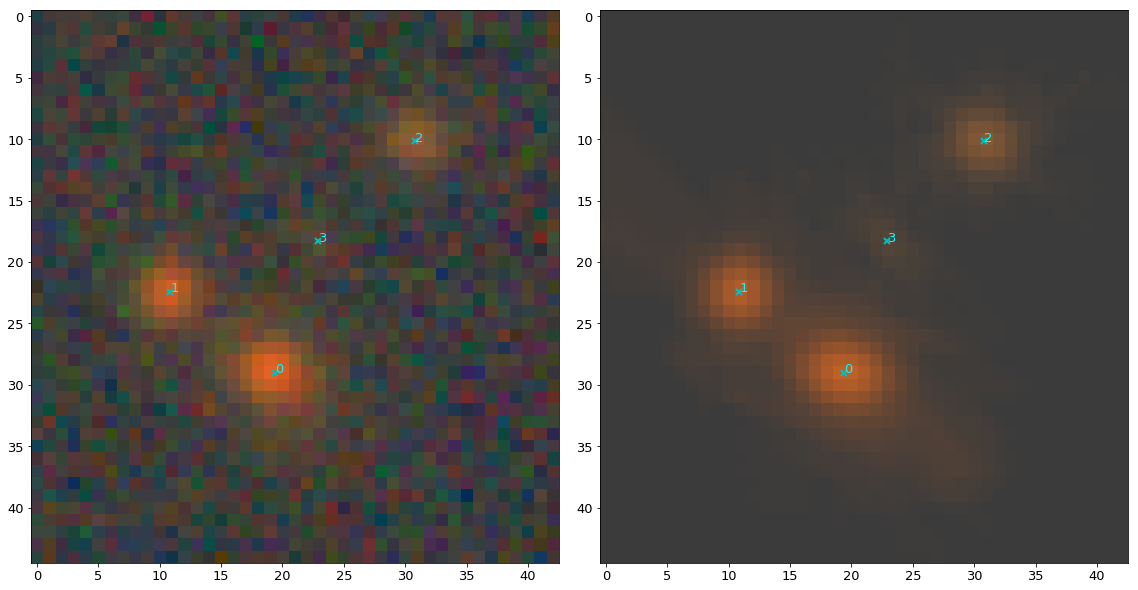

43158172147387483
vmin: -0.09351798892021179, vmax: 0.219804584980011


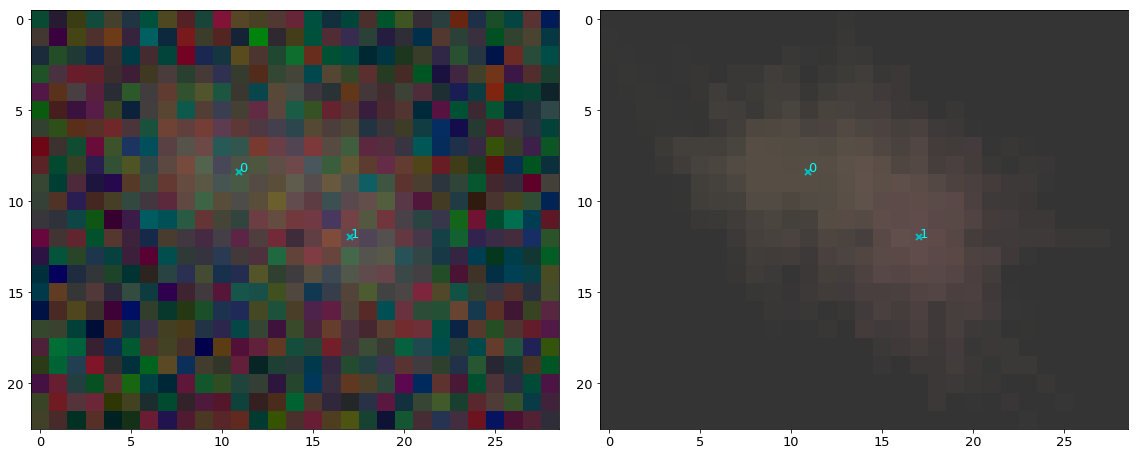

43158172147386738
vmin: -0.20977047085762024, vmax: 0.3275023400783539


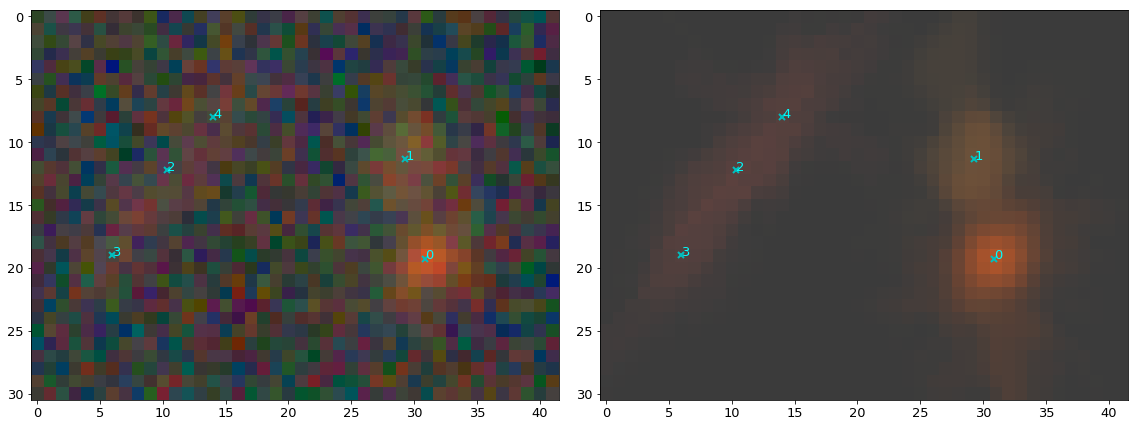

43158172147390842
vmin: -0.1128183901309967, vmax: 0.2894897194134961


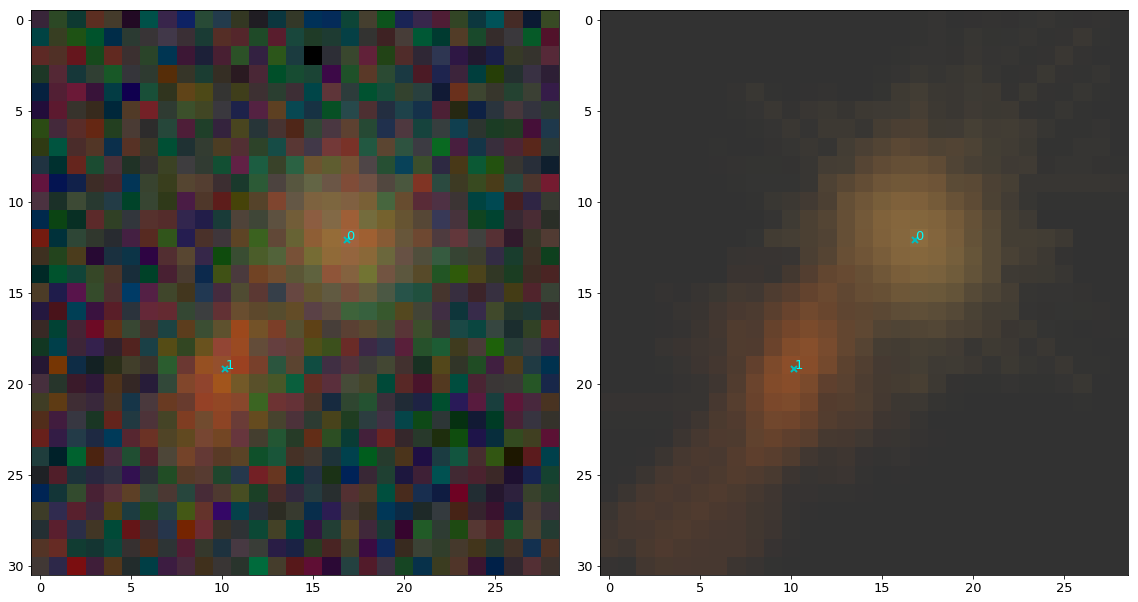

43158172147391799
vmin: -0.0759107768535614, vmax: 0.19762441496993688


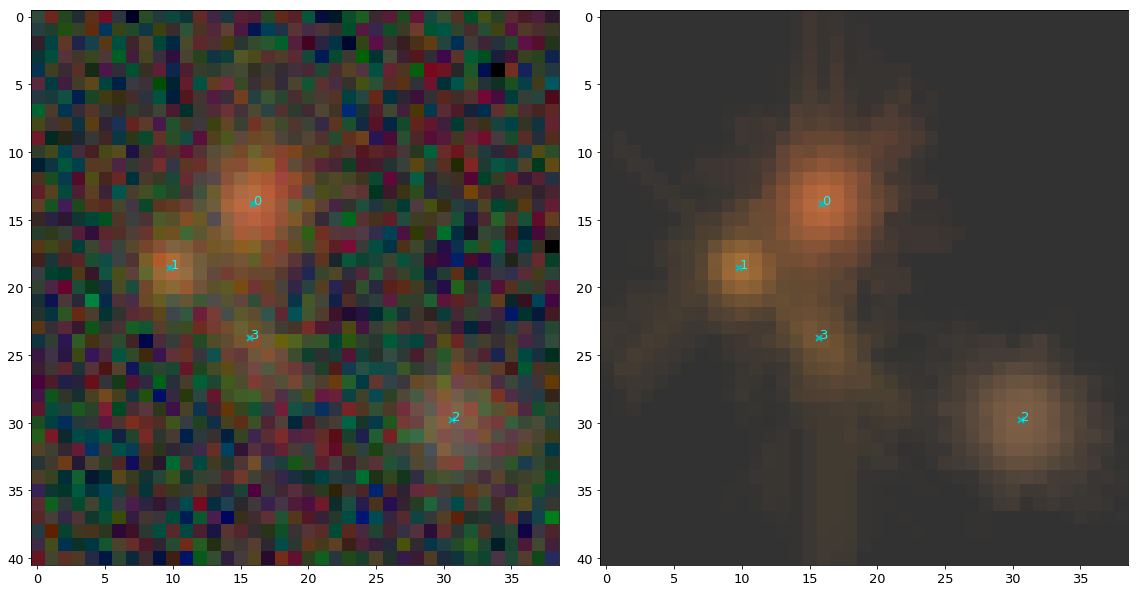

43158172147385481
vmin: -0.21419313549995422, vmax: 0.500639800883943


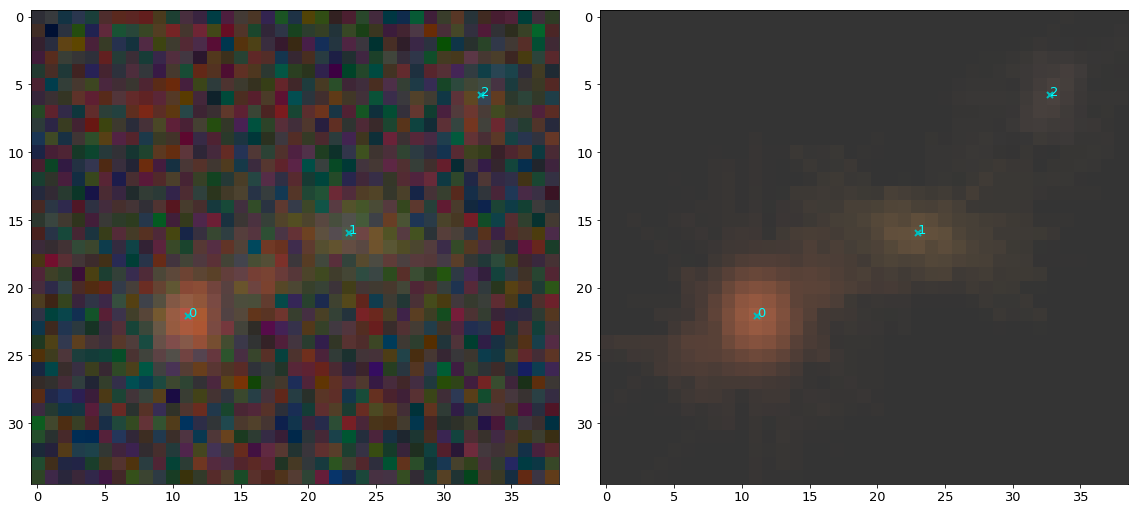

43158172147388611
vmin: -0.09821544587612152, vmax: 0.1935103607594261


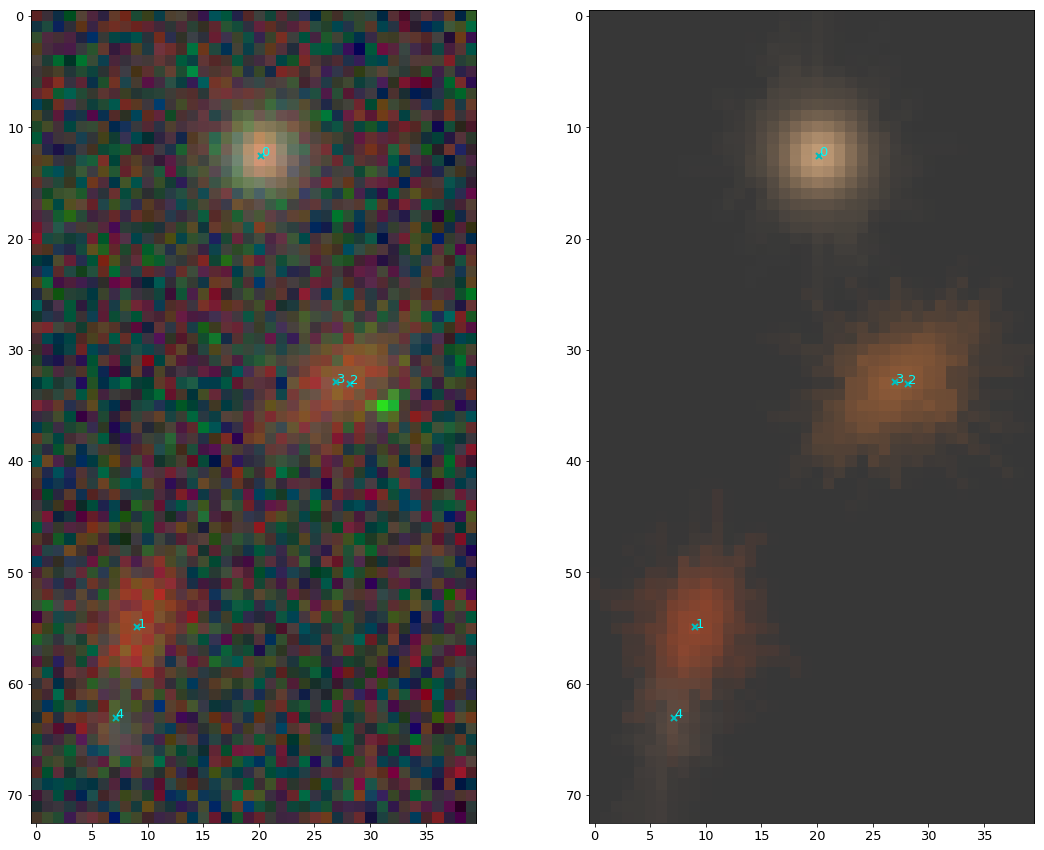

43158172147391235
vmin: -0.2553456425666809, vmax: 0.4556233286857605


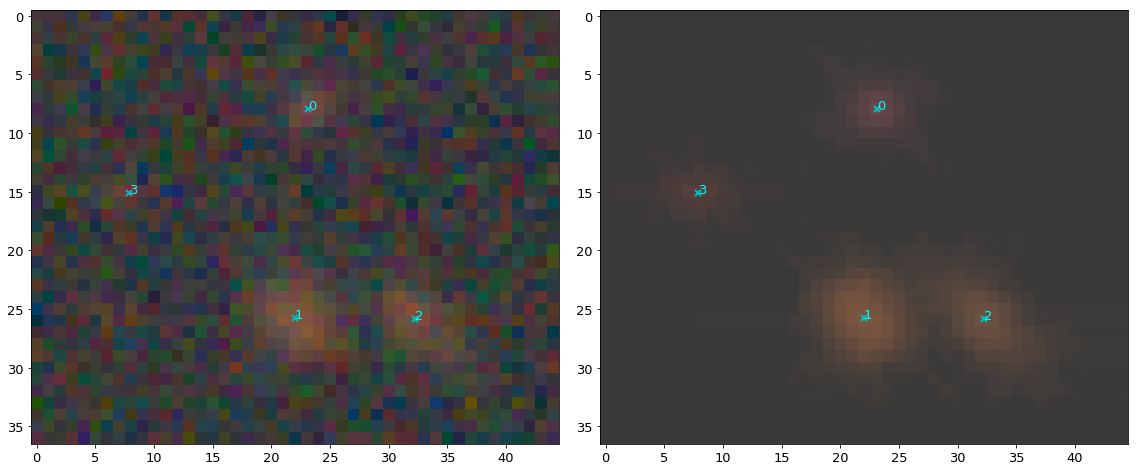

43158172147384981
vmin: -0.24176108837127686, vmax: 0.5294766402872831


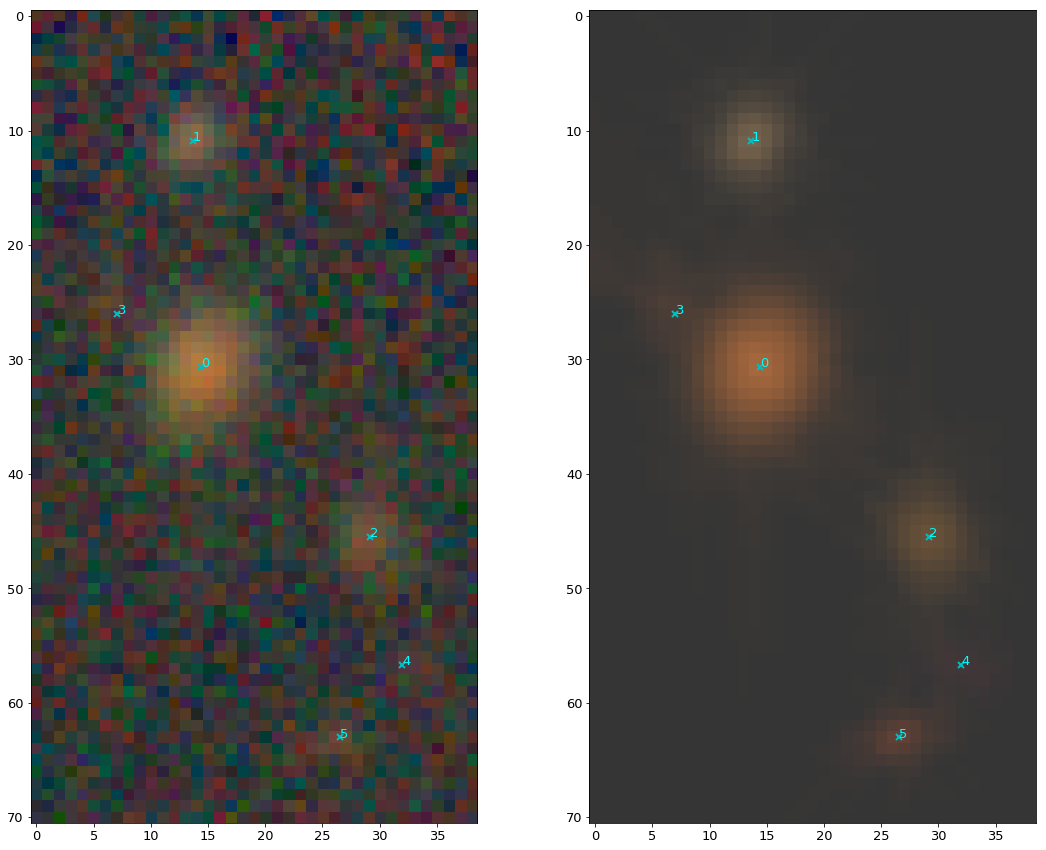

43158172147388313
vmin: -0.14471372961997986, vmax: 0.3470074582512738


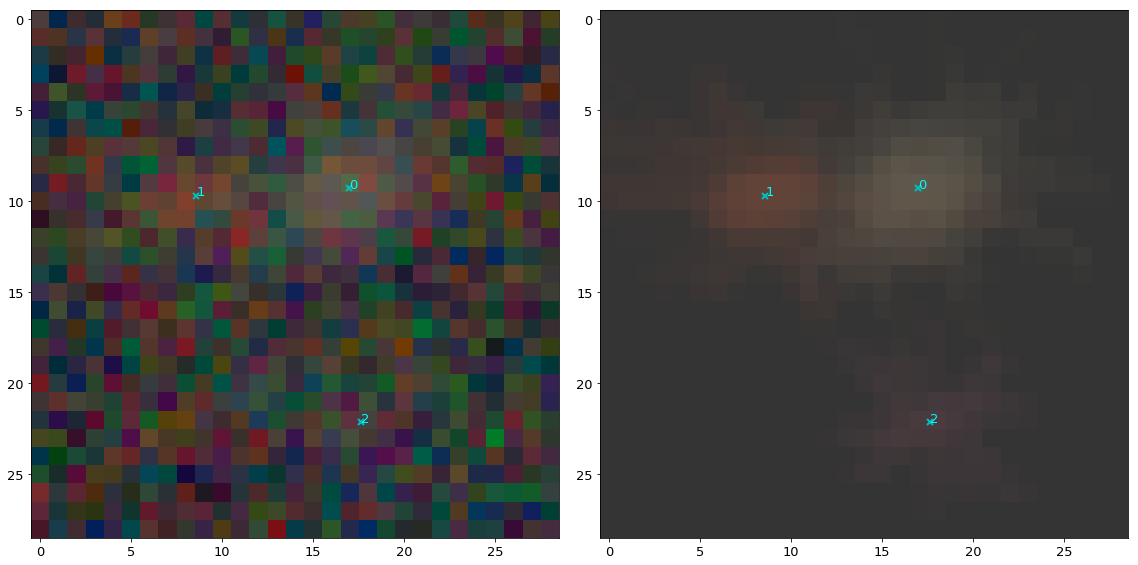

43158172147391427
vmin: -0.20750877261161804, vmax: 0.5366081229169316


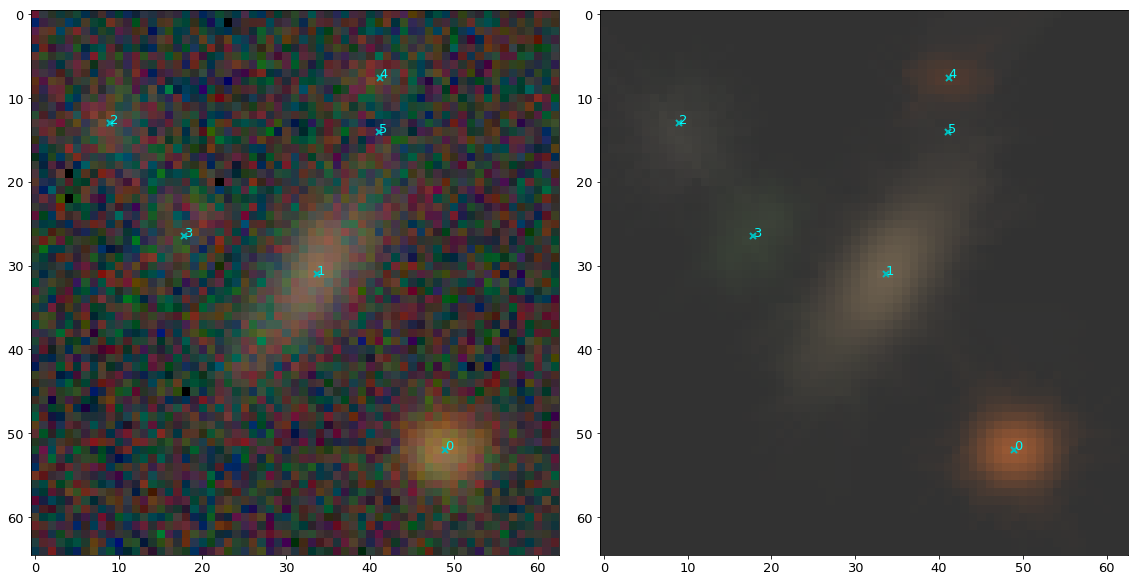

In [33]:
order = np.argsort(overlap)[::-1]
blends = parents[order][overlap[order]>.1]
for parent in blends:
    print(parent)
    comparison.showComparison(calexp, newCats, matchedNew, parent, filters, outliers)